# ECON 148 Final Project 
### Summer 2023



# Gender-Based Analysis of Changes in Mortality Rates Across Different Income Percentiles Over the Years: Is There a Time Trend of Decreasing or Increasing Disparities?


### Group Members: 
Anzhela Baghdasaryan: Modeling, Project Clean-up (25%)

Avitra Phon: Modeling (25%)

Bryan Tan: Background, EDA, Data variable anlaysis and description (25%)

Sahil Gupta-Haji: Interpretation and analysis (25%)


Link to dataset:http://www.equality-of-opportunity.org/data/
From The Association Between Income and Life Expectancy in the United States, 2001-2014
TABLE 15
http://www.equality-of-opportunity.org/data/health/health_ineq_online_table_15.csv

## Project Background & Objective (5 points)


The association between income and life expectancy is a crucial indicator of health inequality and social justice. A paper published in JAMA in 2016 has shown that higher income is associated with longer life expectancy and lower mortality rates in the United States and other countries. However, the trends and patterns of mortality rates by income percentiles over time and across regions are not well understood. Moreover, the causes of death that contribute to the income-mortality gradient may differ by age, sex, race, ethnicity, and geography.
This project is based on the dataset and the journal article by Chetty et al. (2016), which used data from the National Vital Statistics System (NVSS) and the Internal Revenue Service (IRS) to estimate mortality rates by household income percentiles for the U.S. population aged 40 to 76 years from 2001 to 2014. The article reported several findings, such as:
- The gap in life expectancy between the wealthiest and poorest 1% of individuals was 14.6 years (95% CI, 14.4 to 14.8 years) for men and 10.1 years (95% CI, 9.9 to 10.3 years) for women.
- Individuals in the bottom 1% of the income distribution at age 40 years had life expectancies comparable to those of individuals in countries with much lower life expectancies than the United States, such as Sudan and Pakistan.
- For individuals in the bottom 5% of the income distribution, life expectancy differed substantially across local areas. Conversely, differences in life expectancy across areas were smaller for individuals in higher income groups.
- Life expectancy for low-income individuals was positively correlated with access to health care, quality of healthcare, healthy behaviors, social cohesion, environmental factors, and income inequality.

The central objectives for this project are:
- To replicate and validate the main results of the article by Chetty et al. (2016), using descriptive statistics, regression analysis, hypothesis testing, and visualization techniques.
- To explore additional research questions that are not addressed by the article, such as:
        - How do mortality rates by income percentiles vary by sex?
        - How do mortality rates by income percentiles change over time?
        - Is there a time trend of decreasing or increasing disparities in mortality across income levels?
These questions are important to answer because they can provide new insights into the relationship between income and mortality in the United States, and identify potential areas for policy intervention to reduce health inequalities and improve population health. By using quantitative analysis methods, we can rigorously test hypotheses, measure effects, assess uncertainties, and generalize results to wider populations. Quantitative analysis can also help us communicate our findings effectively using graphs, tables, and charts.

The aforementioned paper is titled “The Association Between Income and Life Expectancy in the United States, 2001-2014” and used deidentified US tax records to estimate race- and ethnicity-adjusted life expectancy at 40 years of age by household income percentile, sex, and geographic area.

Some of the assumptions and limitations made in the paper are: 
- The income measure used in the paper is based on pre-tax household earnings and does not include income from capital gains, which may underestimate the income of the very rich.
- The paper assumes that individuals who die or emigrate are missing at random and that their mortality rates are similar to those observed in the data.
- The paper assumes that the relationship between income and mortality is captured by a Gompertz function, which is a common parametric model for human mortality.
- The study's findings on the relationship between income and life expectancy should not be seen as causal effects due to unmeasured confounding variables.

These assumptions may affect the validity and generalizability of the paper’s findings. However, the paper also performed several sensitivity analyses to test the robustness of the results to different specifications and data sources.

## Data Description (5 points)
Our project utilizes a dataset compiled from national records detailing mortality rates and income percentiles in the United States, differentiated by gender. The data spans from the years 2001 to 2014. The associated academic paper, titled "Examining the association between income and life expectancy in the United States in the years 2001-2014", provides comprehensive insights into the data and the correlation between income and life expectancy during these years.

The dataset is structured as panel data with yearly granularity. The key feature of our dataset is the 'Year of Death' (yod), as each observation retains the same characteristics for gender and income percentile within the specific year. This feature allows us to examine how mortality rates have changed year over year, providing a detailed temporal snapshot. The scope of our data encompasses a 13-year period from 2001 to 2014, ensuring a comprehensive view of trends and shifts in mortality rates over this timeframe.

The 'Mortality Rate' (mortrate) is designated as the target variable in our study, the variable we aim to predict or explain. On the other hand, the explanatory variables, or features, include 'Gender' (gnd), 'Household Income Percentile' (pctile), 'Age at Death' (age_at_d), 'Year of Death' (yod), and 'Mean Household Income' (hh_inc). These features will aid us in our investigation of the evolution of mortality rates across different income percentiles over time. Furthermore, they will assist in identifying whether there are discernible trends of decreasing or increasing disparities in mortality across different income levels.


In [136]:
## importing all necessary modules
import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [137]:
# load in data and create workfile
df = pd.read_csv('health_ineq_online_table_15.csv')
df

gnd  pctile  age_at_d   yod  lag  mortrate        hh_inc  deaths  count
0       F       1        40  2001    2  0.004409  3.648230e+02      95  21545
1       F       1        40  2002    2  0.005786  3.836687e+02     124  21431
2       F       1        40  2003    2  0.005046  3.747329e+02     107  21203
3       F       1        40  2004    2  0.004787  3.705288e+02     100  20890
4       F       1        40  2005    2  0.004725  3.561439e+02      93  19684
...    ..     ...       ...   ...  ...       ...           ...     ...    ...
85395   M     100        74  2013   13  0.014334  2.700885e+06     123   8581
85396   M     100        74  2014   13  0.014678  2.157079e+06     131   8925
85397   M     100        75  2013   14  0.015552  2.458902e+06     130   8359
85398   M     100        75  2014   14  0.016079  2.700885e+06     136   8458
85399   M     100        76  2014   15  0.016527  2.458902e+06     136   8229

[85400 rows x 9 columns]

In [138]:
##making a copy of the original data
df_original=df.copy()

In [139]:
df_original

gnd  pctile  age_at_d   yod  lag  mortrate        hh_inc  deaths  count
0       F       1        40  2001    2  0.004409  3.648230e+02      95  21545
1       F       1        40  2002    2  0.005786  3.836687e+02     124  21431
2       F       1        40  2003    2  0.005046  3.747329e+02     107  21203
3       F       1        40  2004    2  0.004787  3.705288e+02     100  20890
4       F       1        40  2005    2  0.004725  3.561439e+02      93  19684
...    ..     ...       ...   ...  ...       ...           ...     ...    ...
85395   M     100        74  2013   13  0.014334  2.700885e+06     123   8581
85396   M     100        74  2014   13  0.014678  2.157079e+06     131   8925
85397   M     100        75  2013   14  0.015552  2.458902e+06     130   8359
85398   M     100        75  2014   14  0.016079  2.700885e+06     136   8458
85399   M     100        76  2014   15  0.016527  2.458902e+06     136   8229

[85400 rows x 9 columns]

In [140]:
# Find the columns in the dataset
df.columns

Index(['gnd', 'pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'hh_inc',
       'deaths', 'count'],
      dtype='object')

In [141]:
# Check for missing values
print(df.info())
print(df.isna().sum())
print("\nThere are no missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85400 entries, 0 to 85399
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gnd       85400 non-null  object 
 1   pctile    85400 non-null  int64  
 2   age_at_d  85400 non-null  int64  
 3   yod       85400 non-null  int64  
 4   lag       85400 non-null  int64  
 5   mortrate  85400 non-null  float64
 6   hh_inc    85400 non-null  float64
 7   deaths    85400 non-null  int64  
 8   count     85400 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 5.9+ MB
None
gnd         0
pctile      0
age_at_d    0
yod         0
lag         0
mortrate    0
hh_inc      0
deaths      0
count       0
dtype: int64

There are no missing values.


In [142]:
# Find the summary statistics for all of the numerical variables in the dataset
df.describe()
# Check the distribution of each variable
# Lag, death is right-skewed, while count is left-skewed. We might need to perform sclaing to it to make it normally distributed

pctile      age_at_d           yod           lag      mortrate  \
count  85400.000000  85400.000000  85400.000000  85400.000000  85400.000000   
mean      50.500000     55.016393   2008.032787      3.065574      0.006074   
std       28.866239      9.246217      3.995788      2.514685      0.006415   
min        1.000000     40.000000   2001.000000      2.000000      0.000000   
25%       25.750000     47.000000   2005.000000      2.000000      0.001755   
50%       50.500000     55.000000   2008.000000      2.000000      0.003769   
75%       75.250000     62.000000   2012.000000      2.000000      0.007979   
max      100.000000     76.000000   2014.000000     15.000000      0.053840   

             hh_inc        deaths         count  
count  8.540000e+04  85400.000000  85400.000000  
mean   9.799557e+04     80.233934  16490.482646  
std    2.168443e+05     61.392211   4109.884429  
min    1.650005e+01      0.000000   5606.000000  
25%    3.049590e+04     34.000000  12605.000000  
50%    5.982370e+04     63.000000  17704.000000  
75%    1.030678e+05    110.000000  19887.000000  
max    1.405658e+07    532.000000  21762.000000

1. Our project utilizes a dataset compiled from national records detailing mortality rates and income percentiles in the United States, differentiated by gender. The data spans from the years 2001 to 2014. The associated academic paper, titled "Examining the association between income and life expectancy in the United States in the years 2001-2014", provides comprehensive insights into the data and the correlation between income and life expectancy during these years.
2. The dataset is structured as panel data with yearly granularity. The key feature of our dataset is the 'Year of Death' (yod), as each observation retains the same characteristics for gender and income percentile within the specific year. This feature allows us to examine how mortality rates have changed year over year, providing a detailed temporal snapshot. The scope of our data encompasses a 13-year period from 2001 to 2014, ensuring a comprehensive view of trends and shifts in mortality rates over this timeframe.
3. The 'Mortality Rate' (mortrate) is designated as the target variable in our study, the variable we aim to predict or explain. On the other hand, the explanatory variables, or features, include 'Gender' (gnd), 'Household Income Percentile' (pctile), 'Age at Death' (age_at_d), 'Year of Death' (yod), and 'Mean Household Income' (hh_inc). These features will aid us in our investigation of the evolution of mortality rates across different income percentiles over time. Furthermore, they will assist in identifying whether there are discernible trends of decreasing or increasing disparities in mortality across different income levels.

## Exploratory Data Analysis (30 points)

In this section, you will use data science methods to prepare data for estimations/predictions in modeling section. Keep in mind that EDA is where you uncover the patterns of associations in your data. Use EDA to understand the relationships among the variables, and PCA and feature engineering to have hands-on information about the most important features in advance. You are all set for modeling! 

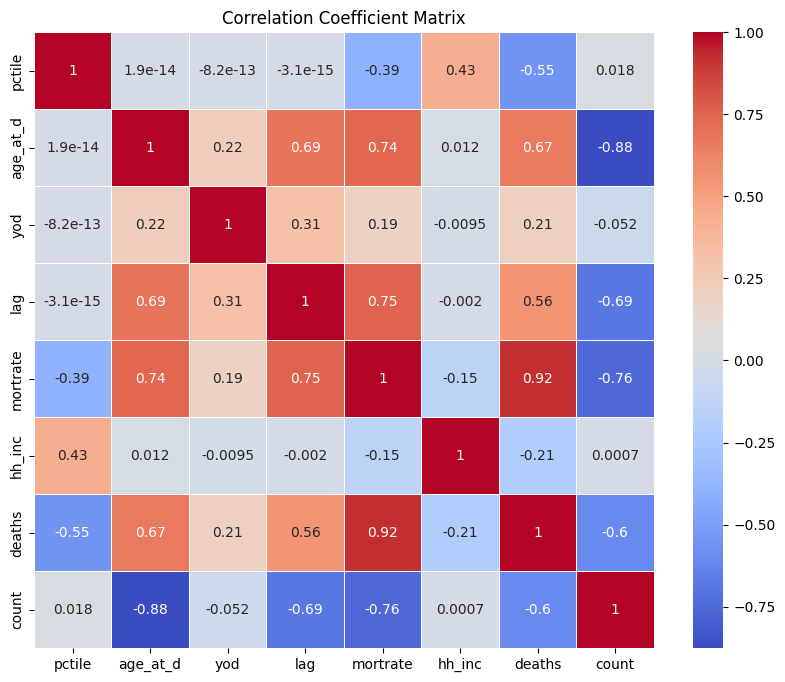

In [143]:
# Define the numerical variables
numerical_vars = ['pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'hh_inc',
       'deaths', 'count']
df_num=df[numerical_vars]
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

Correlation Explanations

1. Income Lag and Age at Death: There is a high positive correlation between income lag and age at death. This is because “incomes are measured two years prior to [death] for mortality rates at ages 40-63, and at age 61 for mortality rates at ages 64-76” for this particular study. Older individuals retire at different ages or may be in palliative care, and controlling this variable to their income at age 61 can more accurately reflect their socioeconomic status.
2. Mortality Rate and Age at Death: A strong correlation exists between mortality rate and age at death. This is not unexpected as the risk of mortality naturally increases with age due to health deterioration and the onset of age-related diseases. As such, the higher the age at death, the higher the mortality rate.
3. Mortality Rate and Death Count: We also observe a strong positive correlation between mortality rate and the count of deaths. This could be because demographics with higher mortality rates would naturally see a higher number of deaths. Moreover, there is a mathematical relationship as mortality rate is obtained from dividing ‘deaths’ by ‘count’.
4. Age at Death and Count of People: There is a high but negative correlation between the age of death and the count of people. This suggests that there are more young people in the dataset, which is understandable. As age increases (age at death), the number of individuals (count of people) in that age group decreases. This is a reflection of the population pyramid structure where younger age groups are generally larger than older age groups. Alternatively, it could also be indicative of the higher mortality rates among older populations, reducing their representation in the dataset.

5. Percentile of Household income and mortality rate: A negative relationship between the percentile of household income and mortality rate is expected as higher income percentiles tend to have access to better healthcare, education, and living conditions. Individuals with higher incomes may have greater resources to afford quality healthcare services, engage in healthier behaviors, and live in environments that promote well-being. These factors can contribute to lower mortality rates among individuals in higher income percentiles compared to those in lower income percentiles.

##Based on the matrix, we can retain all variables as their coefficients are below 0.8, indicating low correlation and hence there might not be collinearity problems. We disregard the strong correlation between deaths and mortality because mortality serves as our y variable. 

In [144]:
# Check skewness in numerical variables 
skewness = df_num.skew()
print(skewness)
# From the results we need to scale hh_inc, death, and count

pctile       0.000000
age_at_d     0.153481
yod         -0.159782
lag          2.579521
mortrate     2.153741
hh_inc      11.482150
deaths       1.303453
count       -0.635744
dtype: float64


In [145]:
# Checking subcategories for numerical variables to find number of unique categories for each variable
for column in df:
    num_categories = df[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in gnd: 2
Number of categories in pctile: 100
Number of categories in age_at_d: 37
Number of categories in yod: 14
Number of categories in lag: 14
Number of categories in mortrate: 79077
Number of categories in hh_inc: 67200
Number of categories in deaths: 384
Number of categories in count: 13598


From above, gnd which is the gender variable has 2 subcategories, hence it is a categorical variable. 

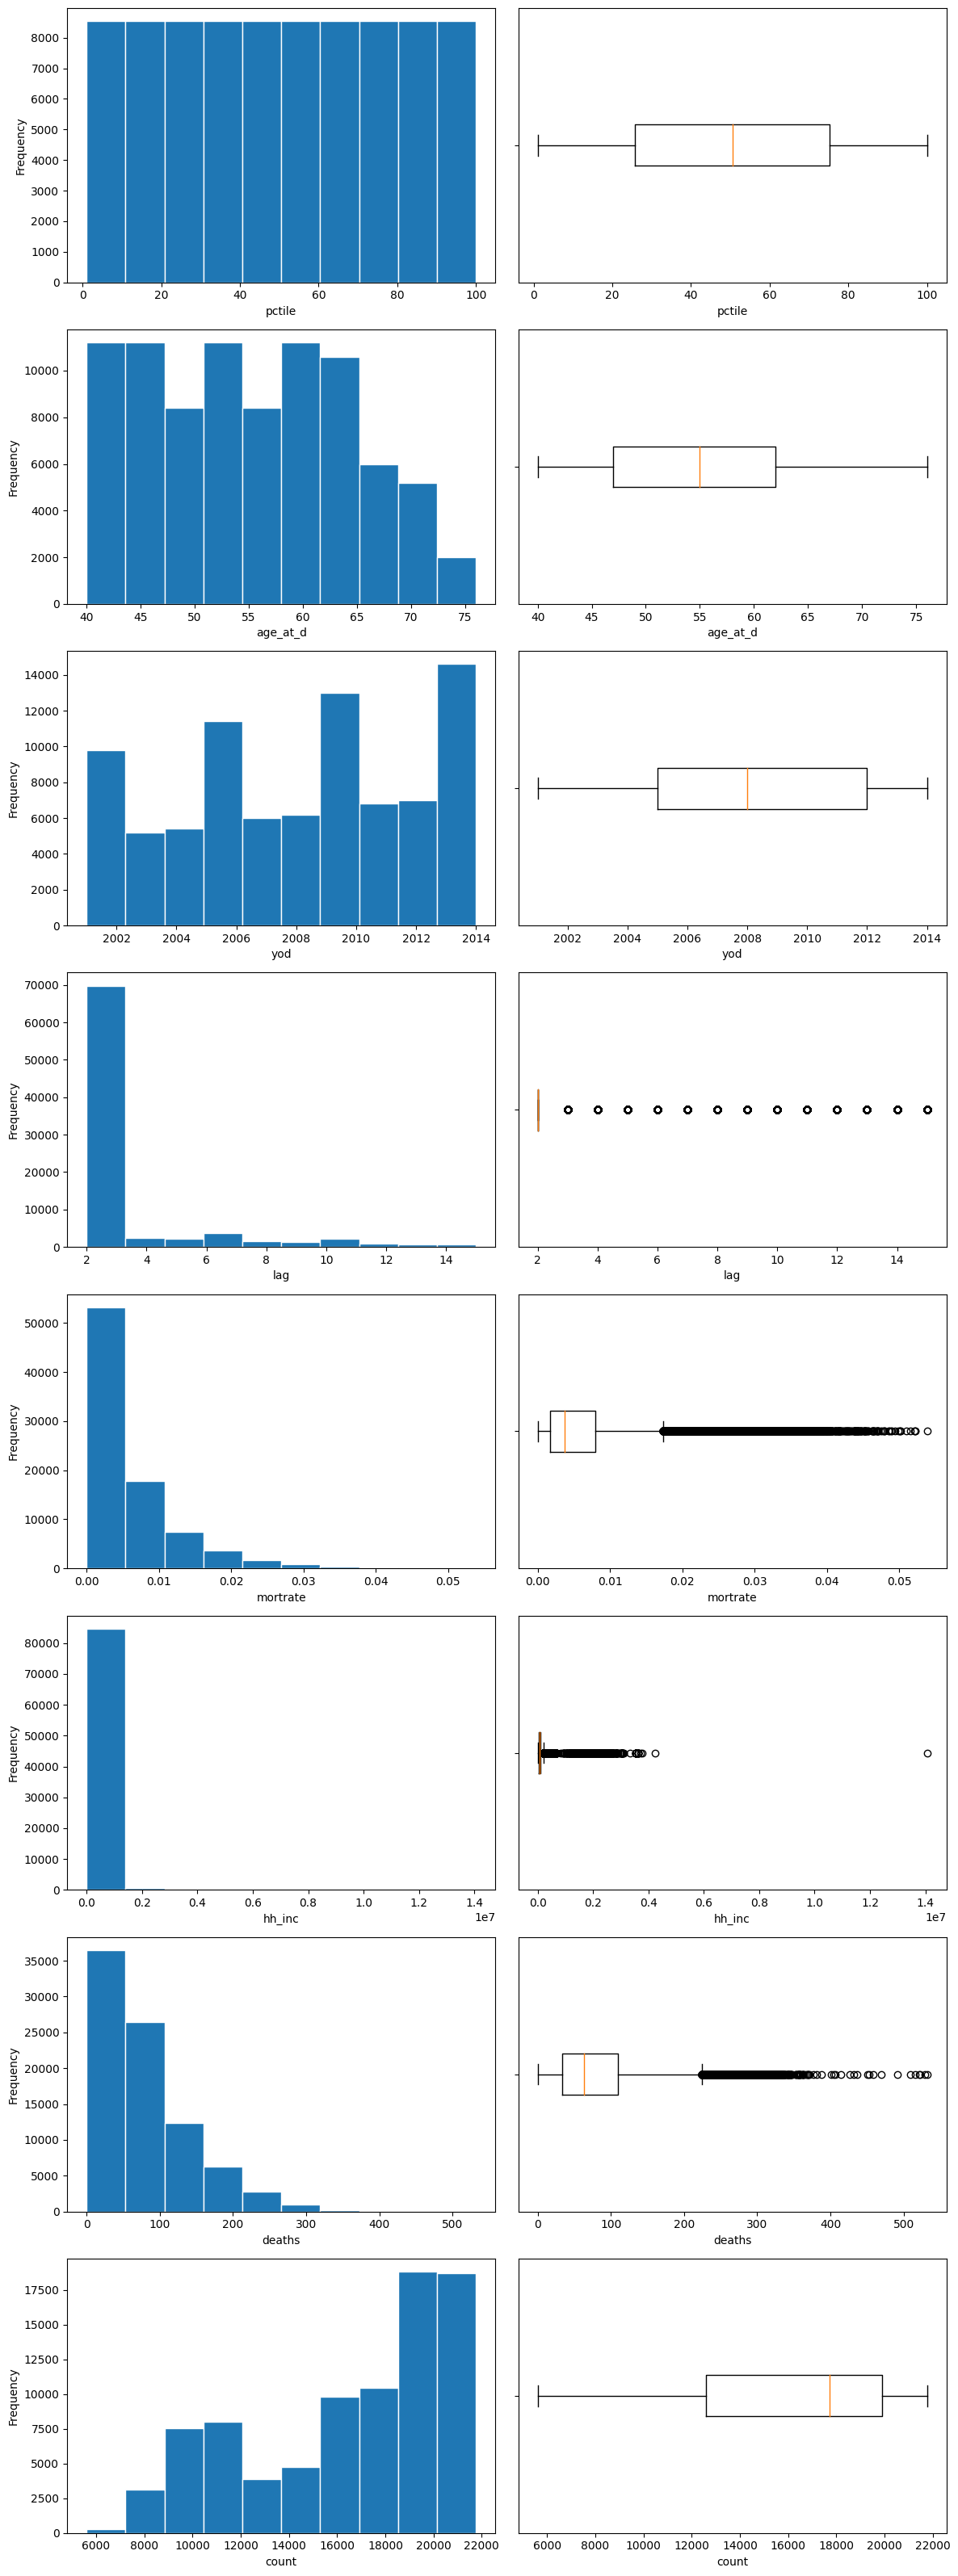

In [146]:
# Define the numerical variables
numerical_vars = ['pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'hh_inc', 'deaths', 'count']

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram
    axs[i, 0].hist(df[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


       hh_inc    deaths     count
0         0.0  0.330827  0.997814
1         0.0  0.439850  0.989506
2         0.0  0.375940  0.972890
3         0.0  0.349624  0.950080
4         0.0  0.323308  0.862192
...       ...       ...       ...
85395     1.0  0.436090  0.053053
85396     1.0  0.466165  0.078123
85397     1.0  0.462406  0.036875
85398     1.0  0.484962  0.044090
85399     1.0  0.484962  0.027401

[85400 rows x 3 columns]


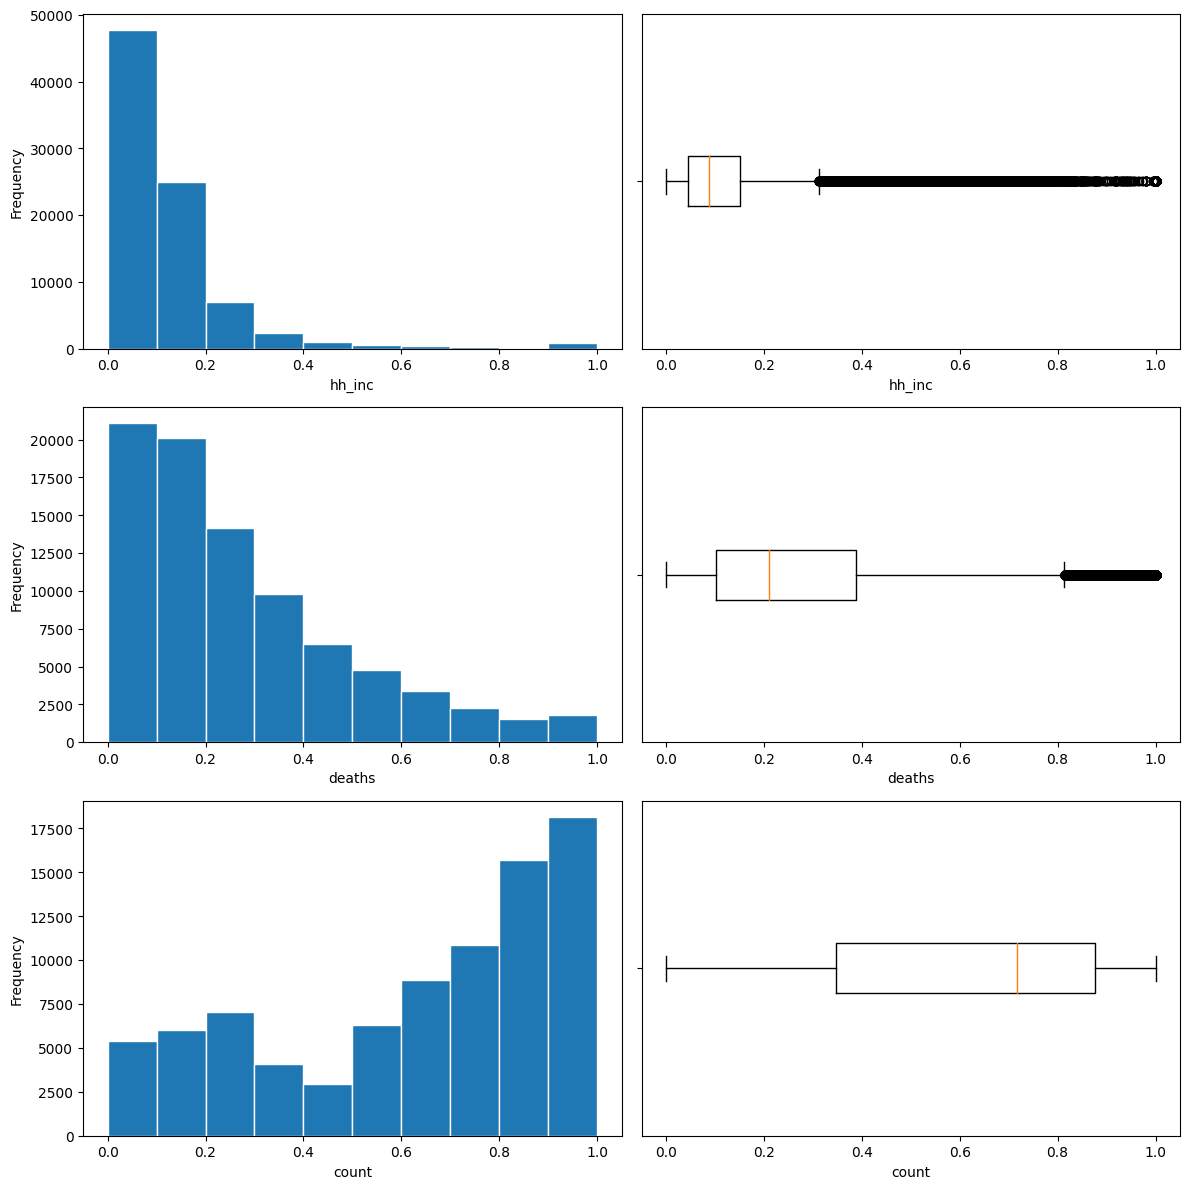

In [147]:
## Scaling ['hh_inc', 'deaths', 'count'] to get better distribution
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Define the numerical variables
numerical_vars_toscale = ['hh_inc', 'deaths', 'count']

# Apply Winsorization to reduce outliers
winsorized_df = df.copy()
for var in numerical_vars_toscale:
    q_low = df[var].quantile(0.01)
    q_high = df[var].quantile(0.99)
    winsorized_df[var] = df[var].clip(q_low, q_high)

# Apply scaling to the winsorized DataFrame
scaler = MinMaxScaler()  # or StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(winsorized_df[numerical_vars_toscale]), columns=numerical_vars_toscale)

# Display the scaled DataFrame
print(scaled_df)

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars_toscale), 2, figsize=(12, 4 * len(numerical_vars_toscale)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars_toscale):
    # Plot histogram
    axs[i, 0].hist(scaled_df[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(scaled_df[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

After scaling, we do see better distributions. There are lesser outliers. 

In [148]:
# Combine the scaled variables to the dataframe
df = df.drop(columns=['hh_inc','deaths','count'])
df_combined = pd.concat([df, scaled_df], axis=1)
df_combined

gnd  pctile  age_at_d   yod  lag  mortrate  hh_inc    deaths     count
0       F       1        40  2001    2  0.004409     0.0  0.330827  0.997814
1       F       1        40  2002    2  0.005786     0.0  0.439850  0.989506
2       F       1        40  2003    2  0.005046     0.0  0.375940  0.972890
3       F       1        40  2004    2  0.004787     0.0  0.349624  0.950080
4       F       1        40  2005    2  0.004725     0.0  0.323308  0.862192
...    ..     ...       ...   ...  ...       ...     ...       ...       ...
85395   M     100        74  2013   13  0.014334     1.0  0.436090  0.053053
85396   M     100        74  2014   13  0.014678     1.0  0.466165  0.078123
85397   M     100        75  2013   14  0.015552     1.0  0.462406  0.036875
85398   M     100        75  2014   14  0.016079     1.0  0.484962  0.044090
85399   M     100        76  2014   15  0.016527     1.0  0.484962  0.027401

[85400 rows x 9 columns]

In [149]:
# Find categorical variables
categorical = [var for var in df.columns if df_combined[var].dtype=='O']
print('There is {} categorical variable\n'.format(len(categorical)))
print('The categorical variable is :', categorical)

There is 1 categorical variable

The categorical variable is : ['gnd']


Gender or "gnd" is the only categorical variable in the dataset and can be converted to binary variable form.

In [150]:
# Create categorical variables df
categorical_columns = df_combined.select_dtypes(include=['object']).columns
df_cat = df.loc[:, categorical_columns]
df_cat

gnd
0       F
1       F
2       F
3       F
4       F
...    ..
85395   M
85396   M
85397   M
85398   M
85399   M

[85400 rows x 1 columns]

In [151]:
# Check subcategories 
for column in df_cat:
    num_categories = df_cat[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in gnd: 2


In [152]:
# Check the distribution among male and female
df_combined['gnd'].value_counts()

gnd
F    42700
M    42700
Name: count, dtype: int64

The gender distribution within the dataset is balanced, with an equal number of males and females. This is ideal for our analysis, as we aim to evaluate the differential impacts on different genders. Therefore, there is no need for bootstrapping to ensure comparable sample sizes, as the existing distribution already provides a suitable basis for comparison. An equal number of males and females in the dataset is important because females live notably longer than males on average.

In [153]:
# Encoding for categorical variables
# Perform one-hot encoding for nominal variables
df_encoded = pd.get_dummies(df_cat, columns=['gnd'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85400 entries, 0 to 85399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gnd_F   85400 non-null  bool 
 1   gnd_M   85400 non-null  bool 
dtypes: bool(2)
memory usage: 166.9 KB


In [154]:
# Combine everything into one df
df_final = pd.concat([df_encoded, df_combined], axis=1)
df_final

gnd_F  gnd_M gnd  pctile  age_at_d   yod  lag  mortrate  hh_inc  \
0       True  False   F       1        40  2001    2  0.004409     0.0   
1       True  False   F       1        40  2002    2  0.005786     0.0   
2       True  False   F       1        40  2003    2  0.005046     0.0   
3       True  False   F       1        40  2004    2  0.004787     0.0   
4       True  False   F       1        40  2005    2  0.004725     0.0   
...      ...    ...  ..     ...       ...   ...  ...       ...     ...   
85395  False   True   M     100        74  2013   13  0.014334     1.0   
85396  False   True   M     100        74  2014   13  0.014678     1.0   
85397  False   True   M     100        75  2013   14  0.015552     1.0   
85398  False   True   M     100        75  2014   14  0.016079     1.0   
85399  False   True   M     100        76  2014   15  0.016527     1.0   

         deaths     count  
0      0.330827  0.997814  
1      0.439850  0.989506  
2      0.375940  0.972890  
3      0.349624  0.950080  
4      0.323308  0.862192  
...         ...       ...  
85395  0.436090  0.053053  
85396  0.466165  0.078123  
85397  0.462406  0.036875  
85398  0.484962  0.044090  
85399  0.484962  0.027401  

[85400 rows x 11 columns]

In [155]:
df_final_gnd_dropped = df_final.copy()
df_final_gnd_dropped.drop('gnd', axis=1, inplace=True)
df_final_gnd_dropped = df_final_gnd_dropped.astype('float64')
df_final_gnd_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85400 entries, 0 to 85399
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gnd_F     85400 non-null  float64
 1   gnd_M     85400 non-null  float64
 2   pctile    85400 non-null  float64
 3   age_at_d  85400 non-null  float64
 4   yod       85400 non-null  float64
 5   lag       85400 non-null  float64
 6   mortrate  85400 non-null  float64
 7   hh_inc    85400 non-null  float64
 8   deaths    85400 non-null  float64
 9   count     85400 non-null  float64
dtypes: float64(10)
memory usage: 6.5 MB


In [156]:
# Check the final df to see it has all the columns we need
df_final_gnd_dropped.columns

Index(['gnd_F', 'gnd_M', 'pctile', 'age_at_d', 'yod', 'lag', 'mortrate',
       'hh_inc', 'deaths', 'count'],
      dtype='object')

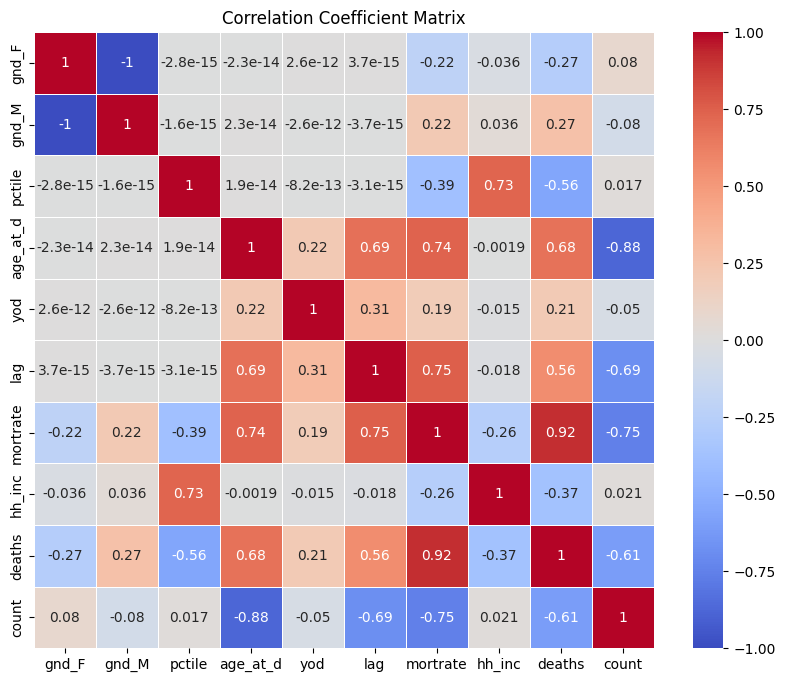

In [157]:
#Define the numerical variables
numerical_vars = ['gnd_F', 'gnd_M', 'pctile', 'age_at_d', 'yod', 'lag', 'mortrate',
       'hh_inc', 'deaths', 'count']
df_num2=df_final_gnd_dropped[numerical_vars]
correlation_matrix = df_num2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

- There are no noticeable differences between the two correlation matrices — scaled and unscaled. However, we chose to scale 'hhinc', 'death' and 'count' because these variables had large orders of magnitude and sent strong signals while performing PCA even though they were not the main focus of our study.

In [158]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_final_gnd_dropped)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Principal Components:
[[ 1.52325882e-07 -1.52325882e-07  9.99983872e-01 -8.89738195e-06
  -1.14944767e-06 -1.99695309e-06 -8.56441771e-05  3.62991983e-03
  -4.36383705e-03  1.72722162e-04]
 [-9.30209287e-06  9.30209287e-06  8.54436960e-05  9.74391756e-01
   1.13838325e-01  1.91254593e-01  5.10644375e-04 -5.09824320e-05
   1.63346433e-02 -2.74978285e-02]
 [-7.94337742e-06  7.94337742e-06 -7.39225775e-06  1.35544249e-01
  -9.84961051e-01 -1.06184540e-01 -1.07602344e-05  5.83746041e-04
  -1.73760160e-03 -1.41762930e-02]
 [-2.55892146e-04  2.55892146e-04  6.37863480e-05 -1.77183793e-01
  -1.29225081e-01  9.75315276e-01  1.14190322e-03 -1.57034305e-03
   1.23426902e-02 -2.25974848e-02]
 [-7.03947291e-01  7.03947291e-01  3.61277256e-04 -1.98437979e-03
   3.57717239e-04 -2.57366700e-03  1.99725505e-03  7.52712343e-03
   8.76122415e-02 -3.41913882e-02]
 [ 1.13889504e-02 -1.13889504e-02 -3.81361898e-04 -2.15655809e-02
   1.38065320e-02 -2.24169280e-02  1.69783765e-03 -8.01454249e-02
  -1.927182

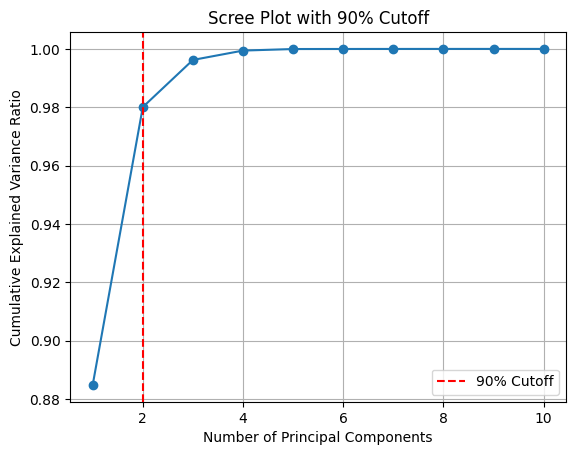

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_final_gnd_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 90% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='90% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 90% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


The scree plot illustrates that the first two principal components account for a substantial portion of the dataset's variance, explaining 98% of it. However, achieving a complete explanation of 100% requires considering around 5 to 6 principal components. In our analysis, we opted for a 90% cutoff to strike a balance between preserving crucial information and minimizing complexity. By doing so, we acknowledge the significance of PC1 and PC2, which appear to be the most influential components in the dataset.

Variable Contributions for PCs:
            gnd_F         gnd_M    pctile  age_at_d       yod       lag  \
PC1  1.523259e-07 -1.523259e-07  0.999984 -0.000009 -0.000001 -0.000002   
PC2 -9.302093e-06  9.302093e-06  0.000085  0.974392  0.113838  0.191255   
PC3 -7.943377e-06  7.943377e-06 -0.000007  0.135544 -0.984961 -0.106185   
PC4 -2.558921e-04  2.558921e-04  0.000064 -0.177184 -0.129225  0.975315   
PC5 -7.039473e-01  7.039473e-01  0.000361 -0.001984  0.000358 -0.002574   

     mortrate    hh_inc    deaths     count  
PC1 -0.000086  0.003630 -0.004364  0.000173  
PC2  0.000511 -0.000051  0.016335 -0.027498  
PC3 -0.000011  0.000584 -0.001738 -0.014176  
PC4  0.001142 -0.001570  0.012343 -0.022597  
PC5  0.001997  0.007527  0.087612 -0.034191  


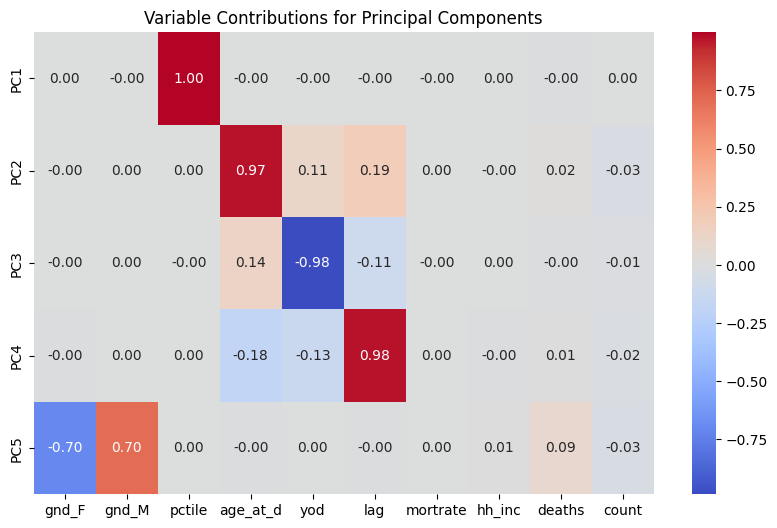

In [160]:
# Instantiate PCA with the number of components equal to the number of columns in the scaled numerical data
pca = PCA(n_components=5)

# Apply PCA to the scaled numerical data
pca.fit(df_final_gnd_dropped)

# Get the contribution of each original variable to the principal components
variable_contributions = pca.components_

# Create a DataFrame to hold the variable contributions
contributions_df = pd.DataFrame(variable_contributions, columns=df_final_gnd_dropped.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Print the variable contributions for PCs
print("Variable Contributions for PCs:")
print(contributions_df)

# Create a heatmap to visualize the variable contributions
plt.figure(figsize=(10, 6))
sns.heatmap(contributions_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Variable Contributions for Principal Components")
plt.show()


The Variable Contribution for Principal Component diagram reveals that 'pctile' accounts for the entirety of PC1, with 'age_at_death' being the primary contributor to PC2. PC4 is predominantly influenced by the 'lag' variable, while PC3 is largely explained by the 'yod' feature. It is crucial to recognize the significance of these components as they hold the greatest importance in capturing the underlying patterns in the dataset. Consequently, we anticipate that these four features will also demonstrate high feature importance, further emphasizing their relevance in the analysis.

In [161]:
#Check skewness in numerical variables after scaling --> it is defintely better
skewness = df_final_gnd_dropped.skew()
print(skewness)

gnd_F       0.000000
gnd_M       0.000000
pctile      0.000000
age_at_d    0.153481
yod        -0.159782
lag         2.579521
mortrate    2.153741
hh_inc      3.531591
deaths      1.183826
count      -0.626787
dtype: float64


## Next, we will investigate the associations between the variables "pctile," "lag," "yod," and "age_at_d" with respect to "mortrate." Additionally, we will explore the relationships between these variables to identify any potential confounding factors that require consideration. This analysis will provide insights into the interplay among the variables and help determine if there are any influential variables affecting our main variable of interest, "mortrate."

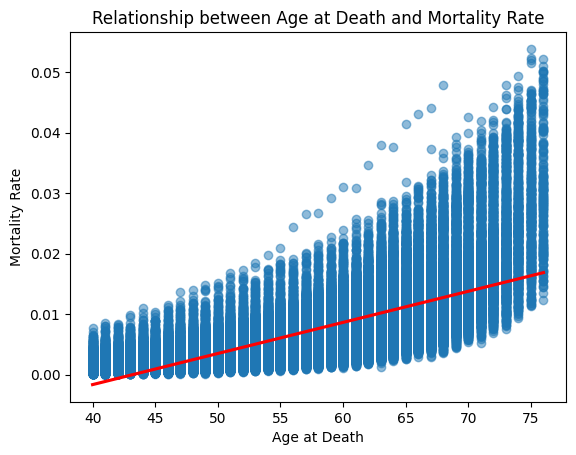

'\nThe observed positive relationship between the age of death \nand mortality rate is logical and aligns with our expectations. \nAs individuals age (within the range of 40 to 75), \nit is reasonable to anticipate a higher mortality rate. \nThis correlation suggests that as people grow older, the \nlikelihood of death increases, which is consistent with our \nunderstanding of mortality patterns.'

In [128]:
# Plotting the relationship between age_at_d and mortrate
sns.regplot(data=df_final_gnd_dropped, x='age_at_d', y='mortrate', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Age at Death')
plt.ylabel('Mortality Rate')
plt.title('Relationship between Age at Death and Mortality Rate')
plt.show()
"""
The observed positive relationship between the age of death 
and mortality rate is logical and aligns with our expectations. 
As individuals age (within the range of 40 to 75), 
it is reasonable to anticipate a higher mortality rate. 
This correlation suggests that as people grow older, the 
likelihood of death increases, which is consistent with our 
understanding of mortality patterns."""

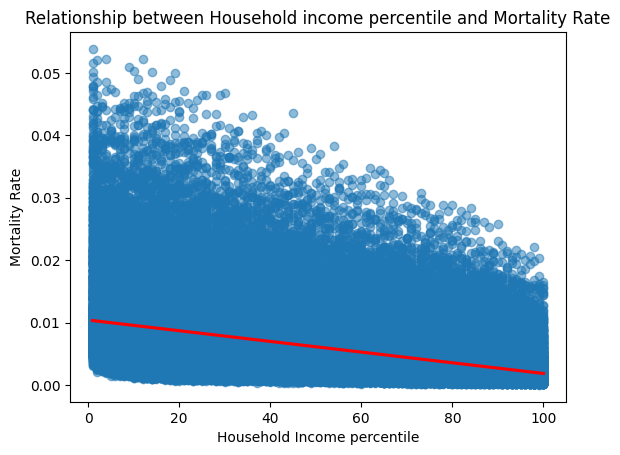

'Individuals with higher income often have better \naccess to healthcare, healthier lifestyles, and improved \nliving conditions, which contribute to lower mortality rates.\n'

In [129]:
# Plotting the relationship between pctile and mortrate
sns.regplot(data=df_final_gnd_dropped, x='pctile', y='mortrate', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Household Income percentile')
plt.ylabel('Mortality Rate')
plt.title('Relationship between Household income percentile and Mortality Rate')
plt.show()
"""Individuals with higher income often have better 
access to healthcare, healthier lifestyles, and improved 
living conditions, which contribute to lower mortality rates.
"""

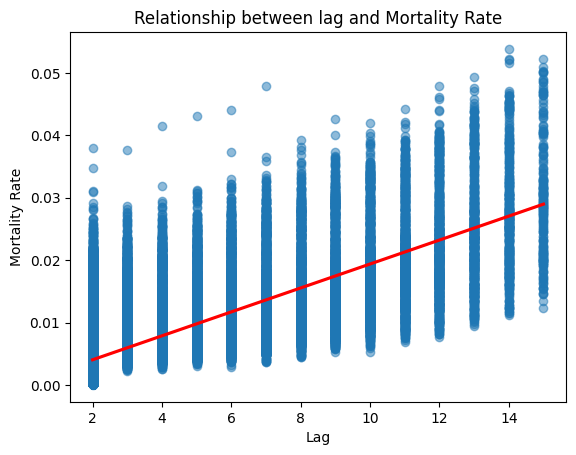

In [29]:
# Plotting the relationship between lag and mortrate
sns.regplot(data=df_final_gnd_dropped, x='lag', y='mortrate', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Lag')
plt.ylabel('Mortality Rate')
plt.title('Relationship between lag and Mortality Rate')
plt.show()

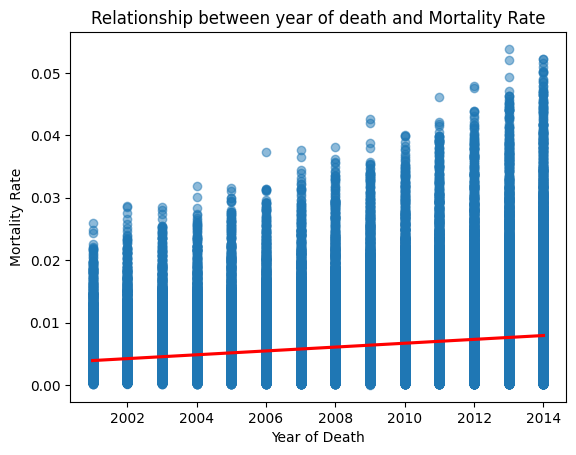

In [30]:
# Plotting the relationship between pctile and mortrate
sns.regplot(data=df_final_gnd_dropped, x='yod', y='mortrate', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Year of Death')
plt.ylabel('Mortality Rate')
plt.title('Relationship between year of death and Mortality Rate')
plt.show()


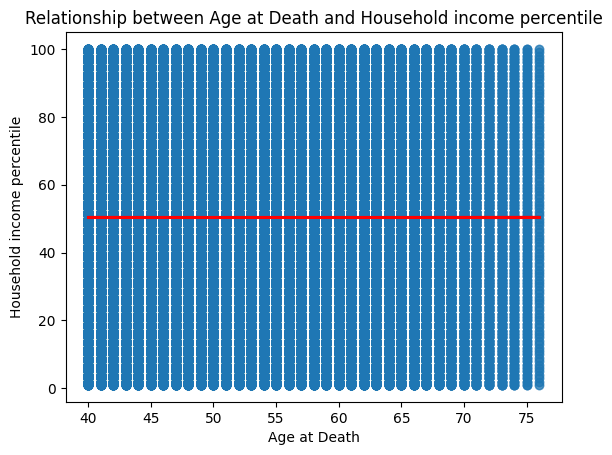

In [31]:
# Plotting the relationship between age at death and percentile of household income
sns.regplot(data=df_final_gnd_dropped, x='age_at_d', y='pctile', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Age at Death')
plt.ylabel('Household income percentile')
plt.title('Relationship between Age at Death and Household income percentile')
plt.show()
#no confounder variable

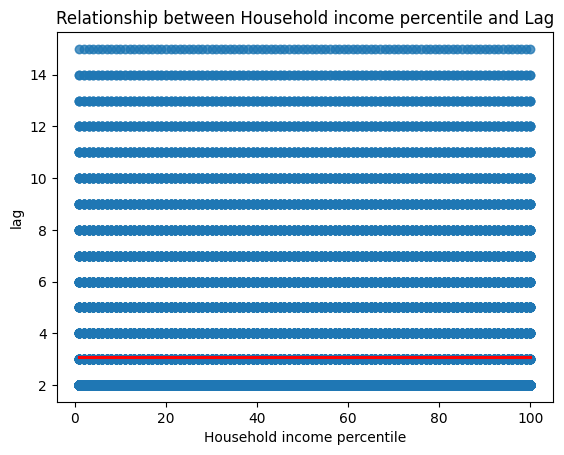

In [32]:
# Plotting the relationship between hh_inc and lag
sns.regplot(data=df_final_gnd_dropped, x='pctile', y='lag', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Household income percentile')
plt.ylabel('lag')
plt.title('Relationship between Household income percentile and Lag')
plt.show()
##not a confounder

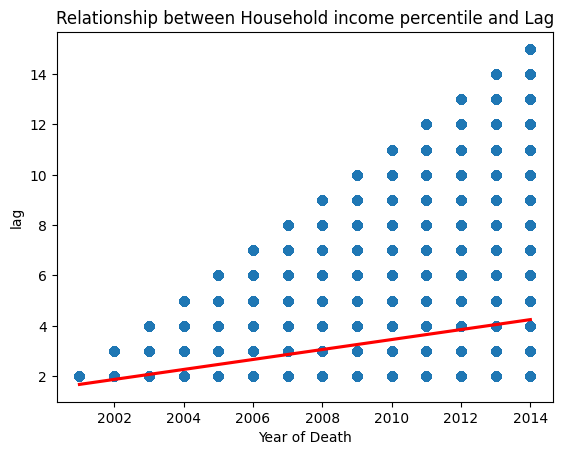

In [33]:
# Plotting the relationship between yod and lag
sns.regplot(data=df_final_gnd_dropped, x='yod', y='lag', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Year of Death')
plt.ylabel('lag')
plt.title('Relationship between Household income percentile and Lag')
plt.show()


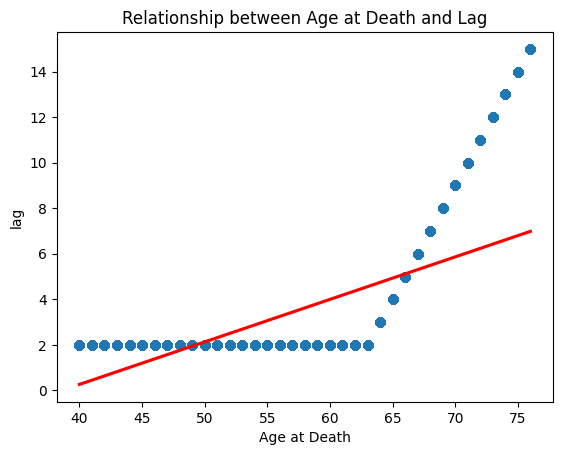

'explain'

In [34]:
# Plotting the relationship between yod and lag
sns.regplot(data=df_final_gnd_dropped, x='age_at_d', y='lag', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Age at Death')
plt.ylabel('lag')
plt.title('Relationship between Age at Death and Lag')
plt.show()
"""explain"""

In the Equality of Opportunity Project, incomes were measured two years prior to death for mortality at ages 40-63, and at age 61 for mortality at ages 64-76. It is possible that the researchers resorted to this method as older individuals retire at different ages or may be in palliative care, and controlling this variable to their income at age 61 can more accurately reflect their socioeconomic status. Likewise, standardizing the income lag to 2 years for younger individuals ensures consistency in the dataset, and eases the process of data collection. As the standardization of income lag is part of the research methodology used in this study, it is understandable when lag has significant correlations with certain variables, albeit in a non-causal manner.

Nevertheless, this research method may not be constructive in creating our regression models, as it is bound to change certain variables into confounders, thereby causing spurious associations to emerge among the different variables. 

For example, there is a positive correlation between ‘year of death (yod)’ and ‘income lag (lag)’. However, both variables are not causally related. This is because all ‘household income’ data points were measured after 1999. To be able to study the mortality rate at higher ages (e.g. 76) while keeping the year at which income is measured to age 61, the lag would naturally be high for those ages (e.g. 76-61=15). With that in mind, researchers can only include the deaths of older individuals occurring in later years (e.g. 1999+15=2014 for deaths of 76-year-olds). This explains the non-causal correlation between ‘yod’ and ‘lag’.

Similar explanations apply to other spurious correlations that surfaced in our regression analysis, due to the presence of ‘lag’. As ‘lag’ is simply a research method that was included in the data frame, our team has thus decided to drop it so that we can better understand the relationship between income and mortality rate.


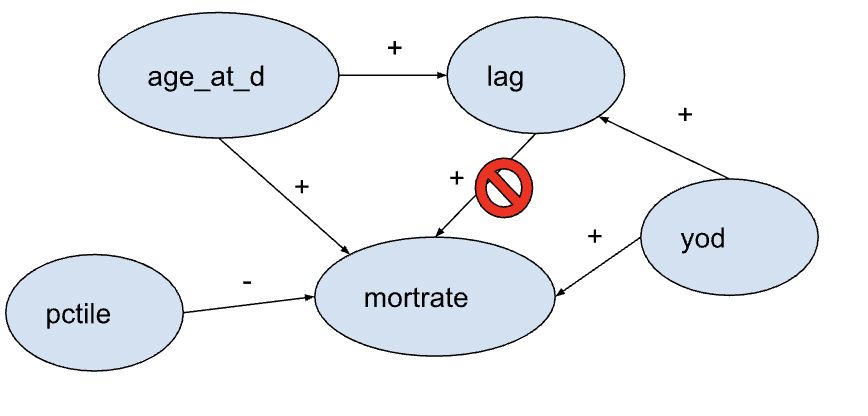

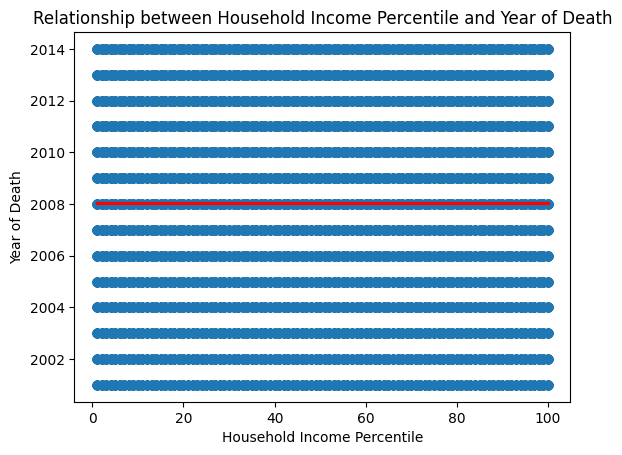

In [35]:
# Plotting the relationship between yod and lag
sns.regplot(data=df_final_gnd_dropped, x='pctile', y='yod', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Household Income Percentile')
plt.ylabel('Year of Death')
plt.title('Relationship between Household Income Percentile and Year of Death')
plt.show()
##no confounder relationship

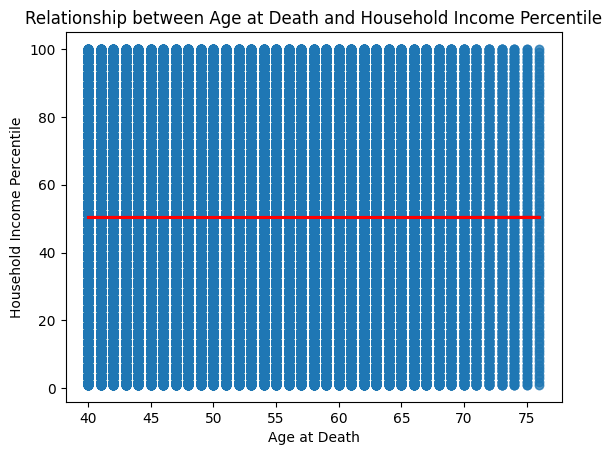

'no confounder relationship'

In [36]:
# Plotting the relationship between yod and lag
sns.regplot(data=df_final_gnd_dropped, x='age_at_d', y='pctile', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Age at Death')
plt.ylabel('Household Income Percentile')
plt.title('Relationship between Age at Death and Household Income Percentile')
plt.show()
"""no confounder relationship"""

In [162]:
##droping lag from the df
df_final_gnd_dropped.drop('lag', axis=1, inplace=True)
df_final_gnd_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85400 entries, 0 to 85399
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gnd_F     85400 non-null  float64
 1   gnd_M     85400 non-null  float64
 2   pctile    85400 non-null  float64
 3   age_at_d  85400 non-null  float64
 4   yod       85400 non-null  float64
 5   mortrate  85400 non-null  float64
 6   hh_inc    85400 non-null  float64
 7   deaths    85400 non-null  float64
 8   count     85400 non-null  float64
dtypes: float64(9)
memory usage: 5.9 MB


## We will now make an OLS model with all the variables to check the p and r-squared values (scenario 1)

In [163]:
m_all= ols('mortrate ~ gnd_F+gnd_M+pctile+age_at_d+yod+hh_inc+deaths+count',df_final_gnd_dropped).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:               mortrate   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.297e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:20:39   Log-Likelihood:             4.1479e+05
No. Observations:               85400   AIC:                        -8.296e+05
Df Residuals:                   85392   BIC:                        -8.295e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0709      0.002    -30.562      0.0

#### From the OSL model, the r-square value is high and 0 p-value which is good. However from the model, 'age_at_d' has a negative realtionship with 'mortrate' which does not make sense since mortality naturally increases with age due to health deterioration and the onset of age-related diseases. As such, the higher the age at death, the higher the mortality rate.

#### However, we cannot drop age_at_d as it is an importance variable in our study and hence will try to drop deaths and count to check for improvements.

R-squared: The R-squared value of 0.914 suggests that approximately 91.4% of the variation in mortality rates can be explained by our independent variables, which is a reasonably high percentage, indicating a good fit of the model.

Adjusted R-squared: The Adjusted R-squared value is also 0.914. The Adjusted R-squared value takes into account the number of predictors in the model and adjusts the R-squared value accordingly. In this case, both values being approximately equal indicates that our model isn’t being penalized for having too many or too few predictors.

F-statistic: The F-statistic is very large and the associated p-value (Prob (F-statistic)) is 0.00, indicating that the overall model is statistically significant.

Coefficient Interpretation: Each variable’s coefficient represents the change in the 'mortrate' variable for each unit increase in the respective predictor variable, assuming all other variables are held constant.

The 'pctile' coefficient of 3.294e-05 suggests that for each unit increase in 'pctile', the 'mortrate' increases by 3.294e-05 units, holding all else constant.

'age_at_d' has a coefficient of -0.0002, indicating that for each unit increase in 'age_at_d', the 'mortrate' decreases by 0.0002 units, holding all else constant.

Going further, we will:
1. Consider using techniques such as cross-validation to ensure the model is not overfitting the data.
2. Consider introducing interaction terms to capture any interdependencies between the predictor variables.


In [164]:
#separating dataframe between male and females
# Create a dataframe without the 'gnd_F' column
df_without_gnd_F = df_final_gnd_dropped.drop('gnd_F', axis=1)

# Create a dataframe without the 'gnd_M' column
df_without_gnd_M = df_final_gnd_dropped.drop('gnd_M', axis=1)

## Scenario 2: Using only female dataframe
#### In this model we are trying to check there will be a difference/improvement if we separate the dataframe for male and female.

In [165]:
m_female= ols('mortrate ~ gnd_F+pctile+age_at_d+yod+hh_inc+deaths+count',df_without_gnd_M).fit()
print(m_female.summary())

                            OLS Regression Results                            
Dep. Variable:               mortrate   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.297e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:20:42   Log-Likelihood:             4.1479e+05
No. Observations:               85400   AIC:                        -8.296e+05
Df Residuals:                   85392   BIC:                        -8.295e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1067      0.003    -30.687      0.0

## Scenario 3: using only male dataframe

In [166]:
m_male= ols('mortrate ~ gnd_M+pctile+age_at_d+yod+hh_inc+deaths+count',df_without_gnd_F).fit()
print(m_male.summary())

                            OLS Regression Results                            
Dep. Variable:               mortrate   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.297e+05
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:20:43   Log-Likelihood:             4.1479e+05
No. Observations:               85400   AIC:                        -8.296e+05
Df Residuals:                   85392   BIC:                        -8.295e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1059      0.003    -30.437      0.0

##### Key Points
Gender Impact: When separating the dataframe into male and female subsets and considering both together, the distribution, R-squared value, and p-values remain unchanged. However, in the subset "df_without_gnd_F," the coefficient for the "gnd_M" (gender male) variable is negative but very small, indicating that gender may not have a significant impact on the mortality rate.

As the analysis is now based on the male/female data alone, the female gender variable (gnd_F) is excluded and vice verse. In this context, the interpretation of gnd_M/gnd_F becomes quite different. Now, the coefficient represents the constant term for males. In this case, the coefficient of gnd_M is -0.0008. As this is the only gender in the dataset now, the interpretation of this coefficient might not hold much relevance, as there's no variability in gender within this dataset.

The intercept has changed from -0.0709 to -0.1059. The intercept in a regression model is the predicted value of the dependent variable (mortrate) when all independent variables are 0. The change in intercept can be due to the removal of female data from the model.
Other model metrics (R-squared, Adjusted R-squared, F-statistic, Prob(F-statistic)) remain unchanged. These suggest that the overall goodness of fit, explanatory power, and statistical significance of the model remain the same after excluding the female/male data.

Standard Error: In all three scenarios, the standard error is small, suggesting that the estimates are relatively precise and stable.

Baseline Models: You plan to use these specifications as baseline models for future predictions. This implies that you have performed some regression analysis and obtained models that you consider as starting points for further prediction tasks.

R-squared and Overfitting: Although a high R-squared value is generally desirable, you mention that an almost perfect R-squared value (close to 1.0) may raise concerns about overfitting the data. However, upon closer investigation, you found that all the variables in your dataset have a strong impact on the "mortrate" (mortality rate), and since there are only ten variables in total, it is expected to achieve a high R-squared value when you carry out the prediction model. 

## Scenario 4: Removing hh_inc, death, count

In [167]:
m_all= ols('mortrate ~ gnd_F+gnd_M+pctile+age_at_d+yod',df_final_gnd_dropped).fit()
print(m_all.summary())
## does it make it better?

                            OLS Regression Results                            
Dep. Variable:               mortrate   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 6.293e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:20:44   Log-Likelihood:             3.6865e+05
No. Observations:               85400   AIC:                        -7.373e+05
Df Residuals:                   85395   BIC:                        -7.372e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0841      0.004    -22.228      0.0

#### Reflection
By dropping "death", "count" and "hh_inc", the signs of the coefficient for age_of_death is now positive which makes more sense. 

Independent Variable (hh_inc): By excluding this variable, we assume that household income does not have a significant impact on mortality rate or that its effect is accounted for by the remaining variables in the model.

Intercept: The intercept value changed from -0.0709 to -0.0721. This is the predicted value for the mortality rate when all other variables are zero. The change indicates that removing household income from the model slightly alters the base level of mortality rate.

Coefficient for pctile: The coefficient for pctile increased from 3.294e-05 to 2.971e-05. It indicates that for each unit increase in the income percentile, the expected change in mortality rate increases slightly more in the revised model than in the original one. It might be capturing some of the effect of household income that was removed.

Model Metrics: The R-squared and Adjusted R-squared remain unchanged at 0.914, indicating that the model still explains about 91.4% of the variability in mortality rate, even after the exclusion of the household income variable.

F-statistic and Prob(F-statistic): These also remain unchanged. The model is still statistically significant.

A possible explanation for the encoded categorical variable for male and female showing a negative relationship with the mortality rate in the ordinary least squares (OLS) model could be due to the choice of reference category. In categorical variable encoding, one category is typically chosen as the reference category, against which the other categories are compared. If the reference category is male and the coefficient for the encoded variable "gnd_M" (gender male) is negative, it implies that, relative to males, the category of females has a lower mortality rate.

It's important to note that the choice of reference category is arbitrary and can affect the interpretation of the coefficients. If the reference category were female instead, the coefficient for the encoded variable "gnd_F" (gender female) would be negative, indicating a lower mortality rate for males relative to females.

Therefore, the negative relationship between the encoded categorical variable and the mortality rate does not necessarily imply that being male has a direct negative impact on mortality. It simply indicates a difference in mortality rates between the chosen reference category (e.g., male) and the other category (e.g., female).Hence we can ignore the coefficient. 

#### This is a good benchmark to see the important variables and the steps we need to take next. Since the r-square and p-value is good we can start making prediction models.

## Modeling (30 points)


In [168]:
df_final_gnd_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85400 entries, 0 to 85399
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gnd_F     85400 non-null  float64
 1   gnd_M     85400 non-null  float64
 2   pctile    85400 non-null  float64
 3   age_at_d  85400 non-null  float64
 4   yod       85400 non-null  float64
 5   mortrate  85400 non-null  float64
 6   hh_inc    85400 non-null  float64
 7   deaths    85400 non-null  float64
 8   count     85400 non-null  float64
dtypes: float64(9)
memory usage: 5.9 MB


In [169]:
#prediction model 1: In this model, we will use all the features to get the initial results.
# load the data
data = df_final_gnd_dropped

# split the data into features and target variable
X = data.drop(['mortrate'], axis=1)
y = data['mortrate']

# split the data into training and testing sets, (error of both sets should be almost similar to ensure valid predictions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1) ##hyperpyrameter to penalise the linear regression and make the result different from linear regression (we will chnage later to check if it is better)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.915, MSE: 0.000
Lasso Regression R-squared: -0.000, MSE: 0.000
Ridge Regression R-squared: 0.915, MSE: 0.000
ElasticNet R-squared: 0.077, MSE: 0.000
Decision Trees Regression R-squared: 0.997, MSE: 0.000
Random Forest Regression R-squared: 0.999, MSE: 0.000
XGBoost Regression R-squared: 0.998, MSE: 0.000
SVM Regression R-squared: -10.683, MSE: 0.000


Linear Regression: The Linear Regression model achieved an R-squared of 0.915 and an MSE of 0.000. This indicates that the model is able to explain 91.5% of the variability in the target variable, and the prediction error is quite small.

Lasso Regression: Lasso Regression achieved an R-squared of -0.000 and an MSE of 0.000. The negative R-squared indicates that the model performs worse than a horizontal line. This may be due to the alpha hyperparameter set at a high value of 0.1, forcing many coefficients to zero and resulting in a poor fit.

Ridge Regression: The Ridge Regression model achieved the same results as the Linear Regression model, suggesting that multicollinearity is not an issue in this dataset, as Ridge is a method used to address multicollinearity.

ElasticNet: ElasticNet achieved an R-squared of 0.077 and an MSE of 0.000, performing significantly worse than the Linear and Ridge models. This may be due to the alpha value being set too high, resulting in an over-penalized model.

Decision Tree Regression: The Decision Tree model achieved an R-squared of 0.997 and an MSE of 0.000, indicating that it performed extremely well on the dataset. This model explains 99.7% of the variability in the target variable. However, we will be cautious of potential overfitting.

Random Forest Regression: The Random Forest model achieved an R-squared of 0.999 and an MSE of 0.000. Random Forest models are less prone to overfitting due to their ensemble nature, we will consider using it going forward.

XGBoost Regression: The XGBoost model performed similarly to the Random Forest, achieving an R-squared of 0.998 and an MSE of 0.000.

SVM Regression: The SVM model performed poorly on this dataset with a negative R-squared and an MSE of 0.000. SVMs often do not perform well with large datasets, and they require careful tuning and normalization of the data.

Going forward, here are potential steps we wil consider:
1. Feature Importance: With tree-based models like Decision Tree, Random Forest, and XGBoost, we can extract feature importance. This will give us insight into which features are most influential in predicting the target variable.
2. Hyperparameter Tuning: Experiment with the hyperparameters for each model to see if performance improves.

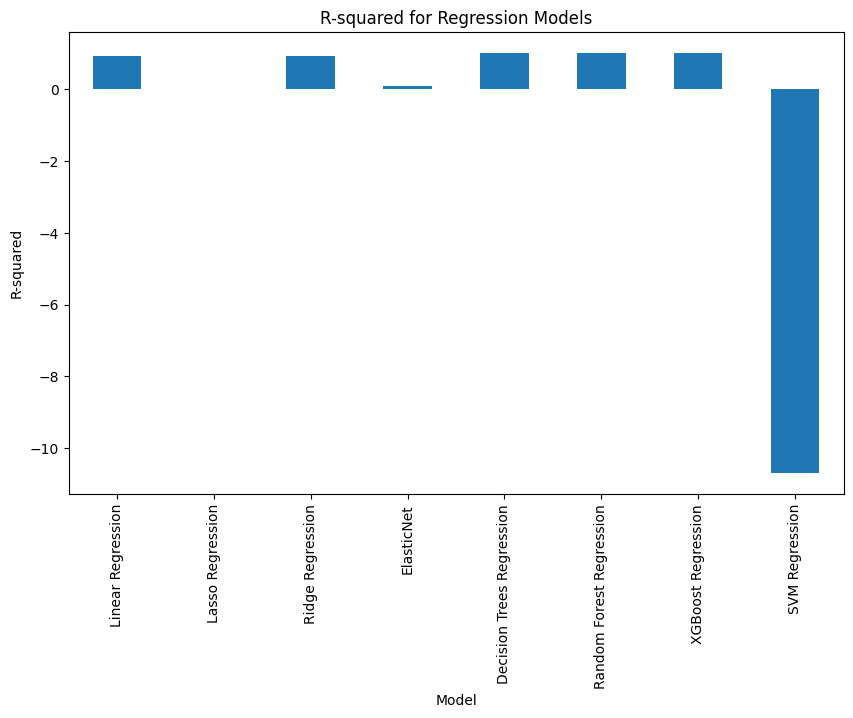

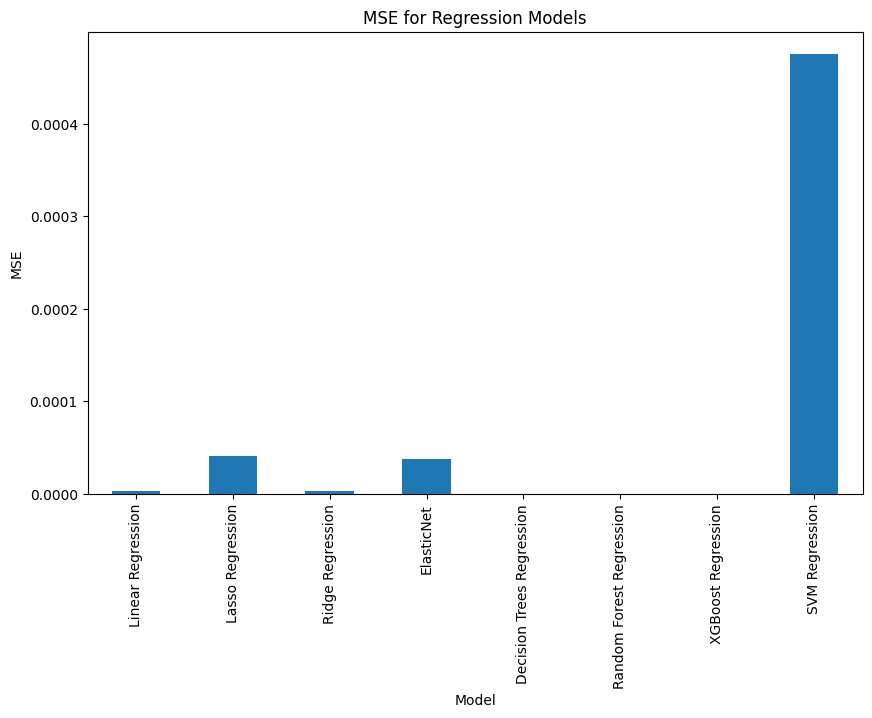

In [170]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()

Based on the provided results, the performance of the SVM Regression model appears to be unsatisfactory. This is indicated by the negative R-squared values and the highest mean squared error (MSE) value. A negative R-squared value suggests that the model is unable to effectively capture the patterns and relationships in the data, resulting in poor predictive accuracy.

On the other hand, the other chosen models including Linear Regression, Ridge Regression, Decision Tree Regression, Random Forest Regression, and XGBoost Regression seem to perform better. These models are able to capture the relationships between the independent variables (x covariates) and the target variable to some extent.

However, it is worth noting that the Random Forest Regression and XGBoost Regression models exhibit a significantly high R-squared value, nearing 1.0. This suggests that these models may be overfitted, meaning they have learned the noise and specific patterns in the training data, potentially resulting in poor generalization to new, unseen data.

Another concern is the extremely small MSE values observed for almost all of these models, approaching zero. This indicates that the models are achieving near-perfect accuracy, which is unlikely in practice. Such small MSE values may indicate the presence of irremovable errors or other issues with the model evaluation.

Hence we will have to do feature engineering to reassess the quality of all the features, and/or experiment with different hyperparameter settings to get the optimal combinations.

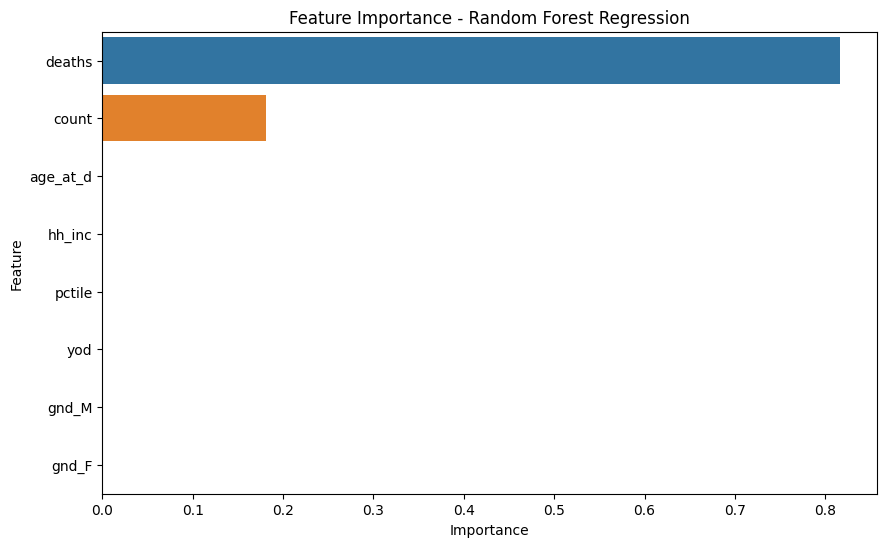

In [171]:
#Feature importance for random forest because random forest is the best model for the first prediction.
# Calculate feature importance for RandomForestRegressor
rf_feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## As death and count are features that gives the y variable (mortality rate= death/count), we will now try a model without them to examine other variables.

In [172]:
#prediction model 2: In this model, we will drop death and count.
# load the data
data = df_final_gnd_dropped

# split the data into features and target variable
X = data.drop(['mortrate', 'deaths', 'count'], axis=1)
y = data['mortrate']

# split the data into training and testing sets, (error of both sets should be almost similar to ensure valid predictions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1) ##hyperpyrameter to penalise the linear regression and make the result different from linear regression (we will chnage later to check if it is better)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.748, MSE: 0.000
Lasso Regression R-squared: -0.000, MSE: 0.000
Ridge Regression R-squared: 0.748, MSE: 0.000
ElasticNet R-squared: 0.077, MSE: 0.000
Decision Trees Regression R-squared: 0.972, MSE: 0.000
Random Forest Regression R-squared: 0.983, MSE: 0.000
XGBoost Regression R-squared: 0.985, MSE: 0.000
SVM Regression R-squared: -10.683, MSE: 0.000


Linear Regression: The Linear Regression model's R-squared score decreased to 0.748 from 0.915, indicating that by removing 'deaths' and 'count', the model's ability to explain the variability in the target variable decreased.

Lasso Regression: Similar to the previous case, Lasso Regression achieved an R-squared of -0.000, indicating the model's poor performance.

Ridge Regression: The Ridge Regression model's R-squared score also decreased to 0.748 from 0.915. This decrease is similar to the Linear Regression model, implying 'deaths' and 'count' variables contributed significantly to the models' performance.

ElasticNet: ElasticNet achieved an R-squared of 0.077, same as the previous case, suggesting that the removal of 'deaths' and 'count' did not improve this model.

Decision Tree Regression: The Decision Tree model's R-squared score decreased to 0.972 from 0.997. While this model still performs well, the decrease indicates that 'deaths' and 'count' did contribute to its performance.

Random Forest Regression: The Random Forest model's R-squared score decreased slightly to 0.983 from 0.999, indicating a minor loss of predictive power.

XGBoost Regression: The XGBoost model's performance decreased slightly, with the R-squared score going from 0.998 to 0.985.

SVM Regression: The SVM model still performed poorly on this dataset with a negative R-squared. This implies that 'deaths' and 'count' removal did not improve its performance.

Removing 'deaths' and 'count' resulted in a decrease in performance for almost all models. However, it still was the correct move, examining the feature importance and logically interpreting their existence. Decision Tree, Random Forest, and XGBoost still deliver good performance.

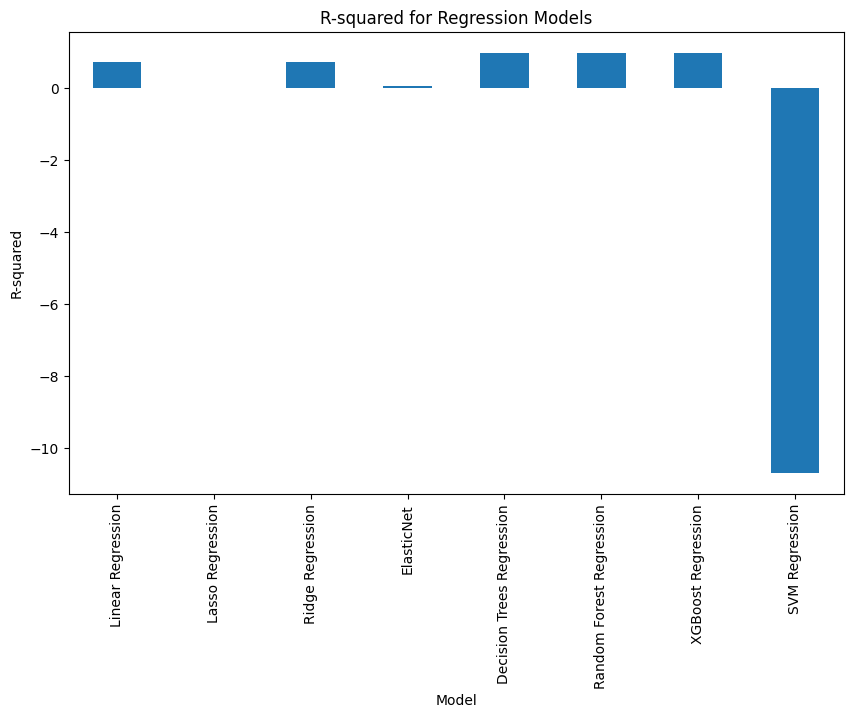

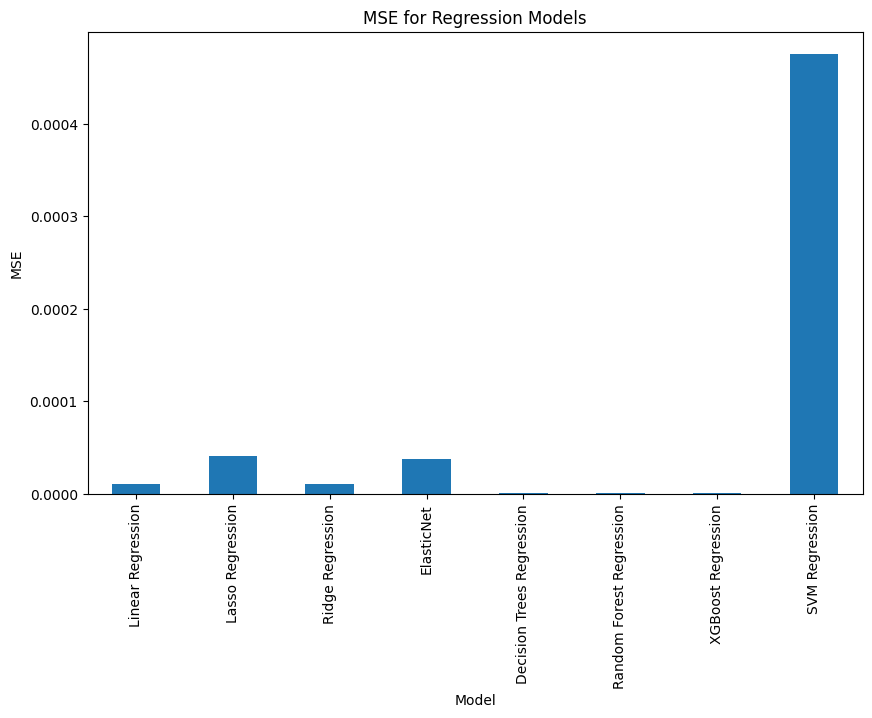

In [173]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()

#### Since we dropped two highly related variables to mortrate, it is expected that we would see a drop in r-squared value for some of the models (eg. Linear Regression and Ridge). However the MSE remiains very low. Hence we will now use Random Forest with one of the top r-squared values and lowest MSE to check the feature importance. 

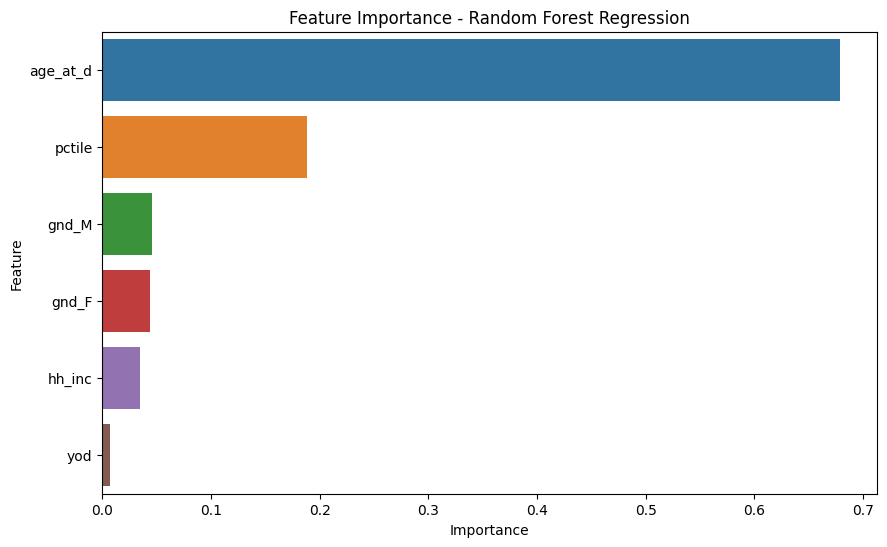

In [174]:
#Feature importance for random forest because random forest is the best model for the first prediction.
# Calculate feature importance for RandomForestRegressor
rf_feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Now we do see other important variables (such as age_at_d, "pctile", "gnd_M" and "gnd_F") that much better explains/effect 'mortrate'. Furthermore it is great to see that these feature importance aligns with the PCA analysis we did at the top. 

In [175]:
# PREDICTION MODEL 3: In this model, we will keep only the variables with high feature importance using the information from the last models. 

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_final_gnd_dropped

# split the data into features and target variable
X = data.drop(['yod','mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))

Linear Regression R-squared: 0.747, MSE: 0.000
Lasso Regression R-squared: -0.000, MSE: 0.000
Ridge Regression R-squared: 0.747, MSE: 0.000
ElasticNet R-squared: 0.077, MSE: 0.000
Decision Trees Regression R-squared: 0.978, MSE: 0.000
Random Forest Regression R-squared: 0.979, MSE: 0.000
XGBoost Regression R-squared: 0.981, MSE: 0.000
SVM Regression R-squared: -10.683, MSE: 0.000


Among the models used, XGBoost Regression has the highest R-squared, followed closely by Random Forest and Decision Trees. These three models are performing well as per the R-squared metric. The SVM Regression, however, is performing poorly, as evidenced by the negative R-squared.

In Lasso, Ridge, and ElasticNet, a fixed alpha of 0.1 is used. We will follow by performing hyperparameter tuning GridSearchCV to find the best value of alpha.

After new alpha, Lasso if performing similarly to LG and Ridge.

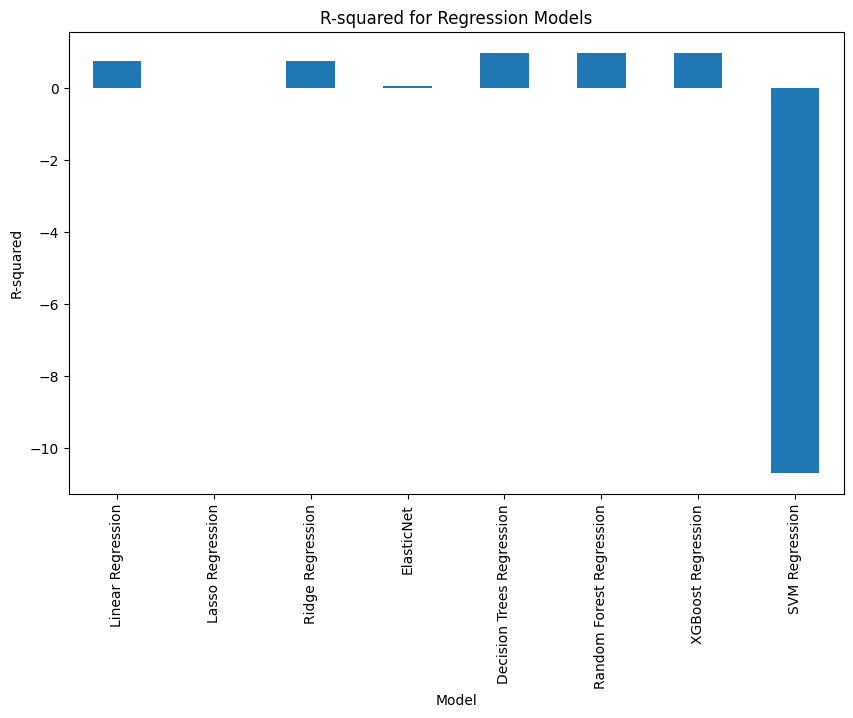

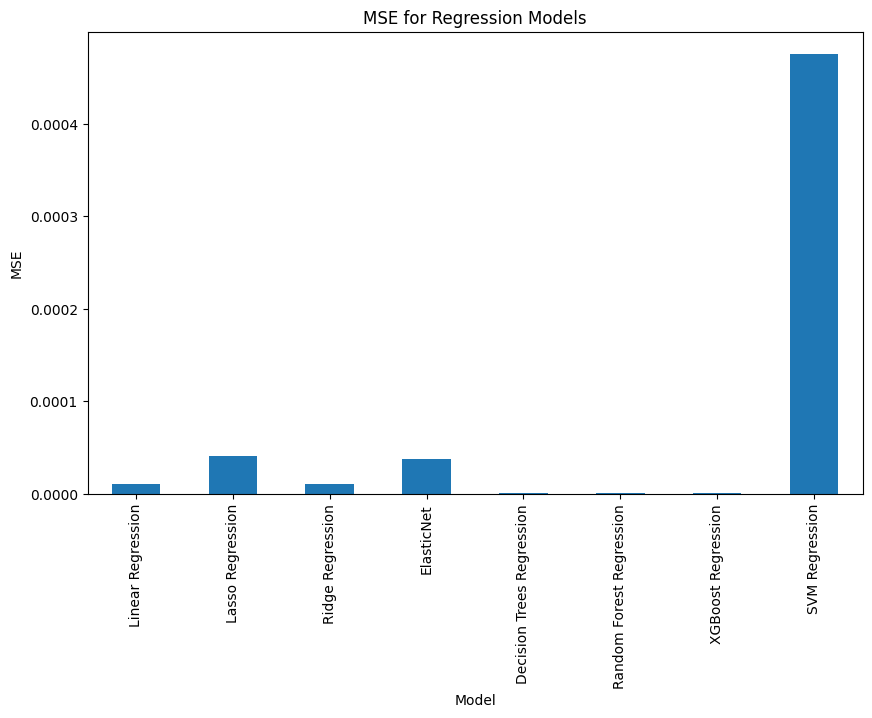

In [176]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()

## Finding the best alpha values for Lasso and Ridge regression

In [177]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-10, 1, 400)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
best_alpha = lasso_cv.alpha_
print(f'Best alpha: {best_alpha}')

Best alpha: 9.49387717927582e-08


In [179]:
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse:.2f}')
print(f'Test R2 Score: {r2:.2f}')

Test MSE: 0.00
Test R2 Score: 0.75


In [180]:
from sklearn.linear_model import RidgeCV

# Define an array of alpha values
alphas = np.logspace(-10, 1, 400)

# Fit RidgeCV model
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha_ridge = ridge_cv.alpha_
print(f'Best alpha: {best_alpha_ridge}')

Best alpha: 10.0


In [181]:
# We tried to change the parameter for ridge and Lasso, but there were slight difference but not significant enough

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_final_gnd_dropped

# split the data into features and target variable
X = data.drop(['yod','mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=9.49387717927582e-08)
ridge = Ridge(alpha=10)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))

Linear Regression R-squared: 0.747, MSE: 0.000
Lasso Regression R-squared: 0.747, MSE: 0.000
Ridge Regression R-squared: 0.747, MSE: 0.000
ElasticNet R-squared: 0.077, MSE: 0.000
Decision Trees Regression R-squared: 0.978, MSE: 0.000
Random Forest Regression R-squared: 0.979, MSE: 0.000
XGBoost Regression R-squared: 0.981, MSE: 0.000
SVM Regression R-squared: -10.683, MSE: 0.000


Linear Regression
R-squared: 0.7466447034276673
Mean Squared Error: 1.0310718407439052e-05
Root Mean Squared Error: 0.0032110307390990594

Lasso
R-squared: -1.2645176041825579e-06
Mean Squared Error: 4.0696727421999194e-05
Root Mean Squared Error: 0.0063793986724454835

Ridge
R-squared: 0.7466447588266782
Mean Squared Error: 1.0310716152883458e-05
Root Mean Squared Error: 0.003211030388034884

ElasticNet
R-squared: -1.2645176041825579e-06
Mean Squared Error: 4.0696727421999194e-05
Root Mean Squared Error: 0.0063793986724454835

Decision Tree
R-squared: 0.9783192643042242
Mean Squared Error: 8.823338751926749e-07
Root Mean Squared Error: 0.000939326287928042

Random Forest
R-squared: 0.9789304076167037
Mean Squared Error: 8.574623738393744e-07
Root Mean Squared Error: 0.0009259926424326353

XGBoost
R-squared: 0.9807861156426291
Mean Squared Error: 7.819412256312955e-07
Root Mean Squared Error: 0.0008842744062966515

Support Vector Regression
R-squared: -10.683368277287288
Mean Squared E

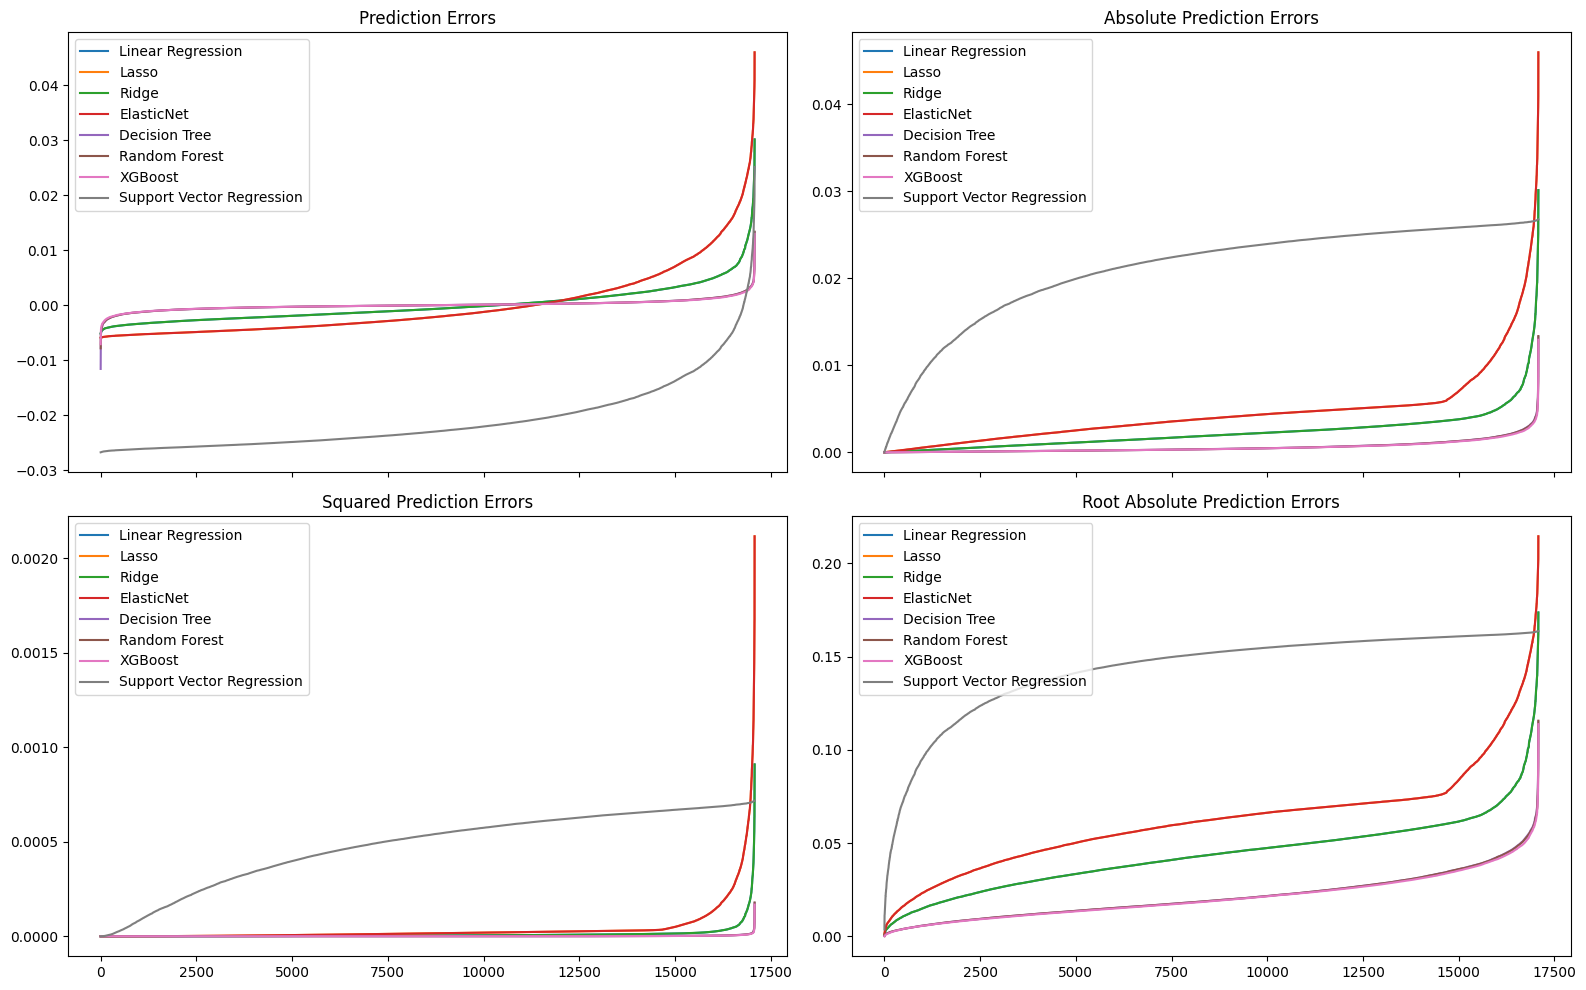

In [182]:
# Visualize the results as prediction errors and loss values for model 3. 
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_final_gnd_dropped

# split the data into features and target variable
X = data.drop(['yod','mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the R-squared, mean squared error, and root mean squared error
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}\n")

    # Visualize the prediction errors and loss values as curves
    axes[0, 0].plot(sorted(errors), label=name)
    axes[0, 0].set_title("Prediction Errors")
    axes[0, 0].legend()

    axes[0, 1].plot(sorted(np.abs(errors)), label=name)
    axes[0, 1].set_title("Absolute Prediction Errors")
    axes[0, 1].legend()

    axes[1, 0].plot(sorted(errors ** 2), label=name)
    axes[1, 0].set_title("Squared Prediction Errors")
    axes[1, 0].legend()

    axes[1, 1].plot(sorted(np.sqrt(np.abs(errors))), label=name)
    axes[1, 1].set_title("Root Absolute Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


#### While there are small decreases in the r-square value, it is insignificant and it is still very high. Hence keeping these 4 variables is a good choice to explain all the variance. 

#### The top models are Decision Tree, Random Forest, and XGBoost regression.

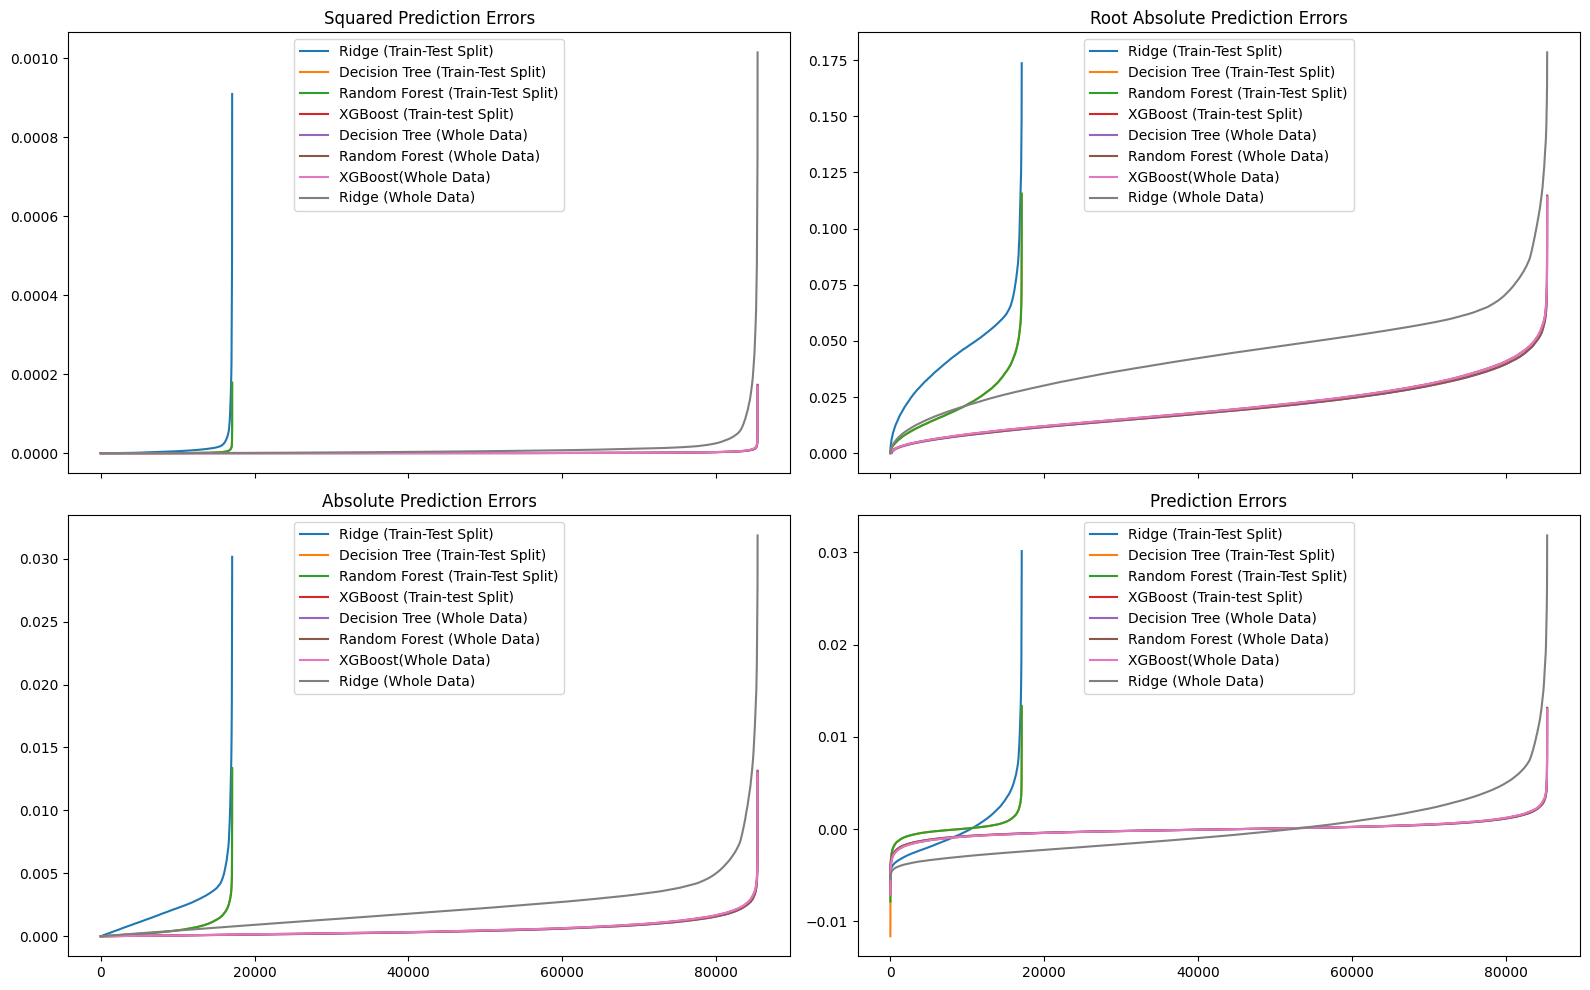

In [183]:
#checking between test and training set
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_final_gnd_dropped

# Split the data into features and target variable
X = data.drop(['yod','mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ## compare with test set result and whole dataset to see if they fit well for unseen data--> if is working well--> it is prob not overfitted)

# Define the models
models = {
    "Ridge (Train-Test Split)": Ridge(),
    "Decision Tree (Train-Test Split)": DecisionTreeRegressor(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "XGBoost (Train-test Split)": xgb.XGBRegressor(random_state=42),
    "Decision Tree (Whole Data)": DecisionTreeRegressor(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42),
    "XGBoost(Whole Data)": xgb.XGBRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the prediction errors
        errors = y_test - y_pred
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the prediction errors
        errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

#### It seems like all the models perform similar to each other (in both training and whole dataset) and there is not much different between the r-squared value and error between the training and whole data. Hence it means that we can use either 3 of the models to use to predict. 

In [52]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_final_gnd_dropped

# Split the data into features and target variable
X = data.drop(['yod','mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge (Train-Test Split)": Ridge(),
    "Decision Tree (Train-Test Spilt)": DecisionTreeRegressor(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "XGBoost (Train-test Split)": xgb.XGBRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "Decision Tree (Whole Data)": DecisionTreeRegressor(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42),
    "XGBoost(Whole Data)": xgb.XGBRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15} {:<20} {:<25}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15} {:<20} {:<25}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Ridge (Train-Test Split)       0.7466447588266782 1.0310716152883458e-05 0.003211030388034884     
Random Forest (Train-Test Split) 0.9789304076167037 8.574623738393744e-07 0.0009259926424326353    

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Decision Tree (Train-Test Spilt) 0.9843391665825283 6.444832801820418e-07 0.0008027971600485654    
XGBoost (Train-test Split)     0.9822474521015834 7.305626716133847e-07 0.0008547295897612207    
Ridge (Whole Data)             0.7456233311295216 1.046824939549694e-05 0.003235467415304463     
Decision Tree (Whole Data)     0.9843391665825283 6.444832801820418e-07 0.0008027971600485654    
Random Forest (Whole Data)     0.9842659245761863 6.474973757436279e-07 0.0008046722163363339    
XGBoost(Whole Data)            0.9822474521015834 7.30562671613384

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

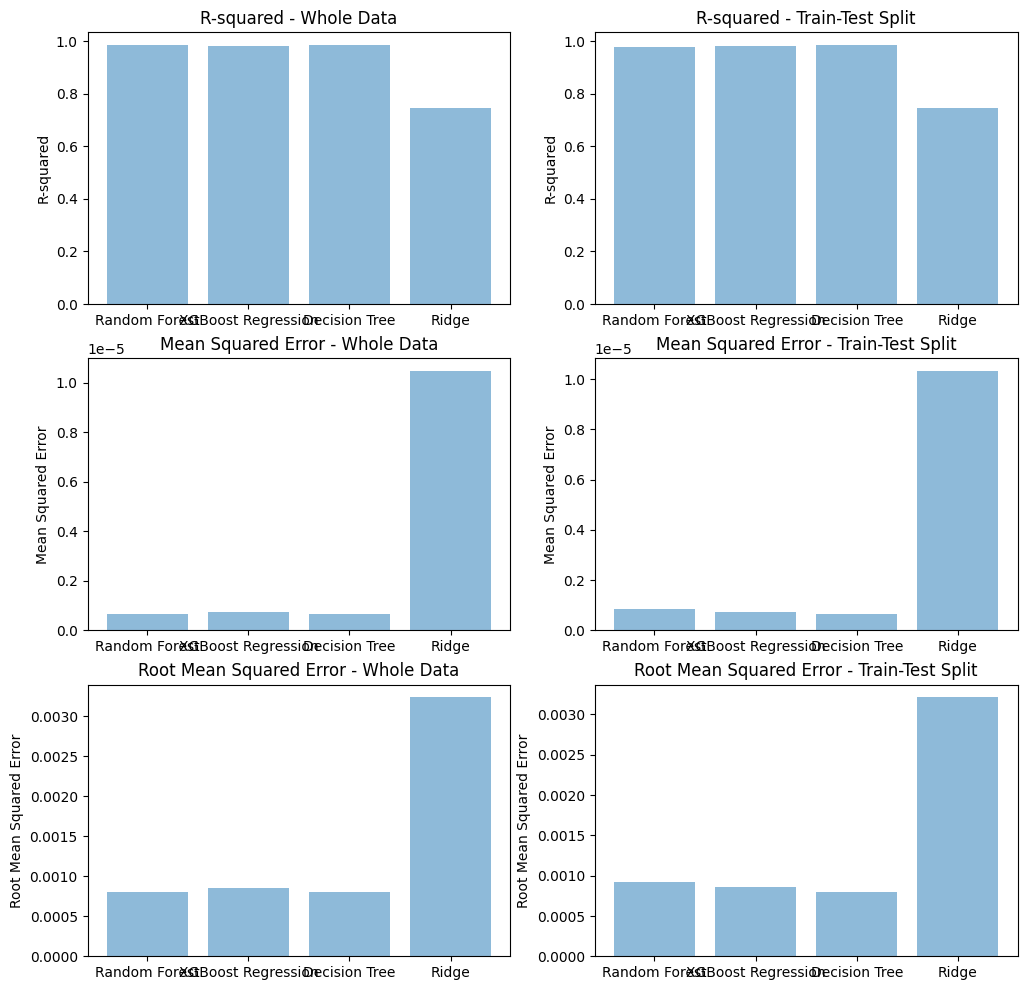

In [53]:
results_whole_data = {
    "Random Forest": {
        "R-squared": 0.9842659245761863,
        "Mean Squared Error": 6.474973757436279e-07,
        "Root Mean Squared Error": 0.0008046722163363339 
    },
    "XGBoost Regression": {
        "R-squared": 0.9822474521015834,
        "Mean Squared Error": 7.305626716133847e-07,
        "Root Mean Squared Error": 0.0008547295897612207
    },
    "Decision Tree": {
        "R-squared":  0.9843391665825283,
        "Mean Squared Error": 6.444832801820418e-07,
        "Root Mean Squared Error": 0.0008027971600485654
    },
    "Ridge": {
        "R-squared":  0.7456233311295216,
        "Mean Squared Error": 1.046824939549694e-05,
        "Root Mean Squared Error": 0.003235467415304463 
    }
}

results_train_test = {
    "Random Forest": {
        "R-squared": 0.9789304076167037,
        "Mean Squared Error": 8.574623738393744e-07,
        "Root Mean Squared Error": 0.0009259926424326353
    },
    "XGBoost Regression": {
        "R-squared": 0.9822474521015834,
        "Mean Squared Error": 7.305626716133847e-07,
        "Root Mean Squared Error": 0.0008547295897612207
    },
    "Decision Tree": {
        "R-squared": 0.9843391665825283,
        "Mean Squared Error": 6.444832801820418e-07,
        "Root Mean Squared Error": 0.0008027971600485654
    },
    "Ridge": {
        "R-squared": 0.7466447588266782,
        "Mean Squared Error": 1.0310716152883458e-05,
        "Root Mean Squared Error": 0.003211030388034884  
    }
}

metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error"]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 12))

for i, metric in enumerate(metrics):
    values_whole_data = [results_whole_data[model][metric] for model in results_whole_data]
    labels_whole_data = [model for model in results_whole_data]

    values_train_test = [results_train_test[model][metric] for model in results_train_test]
    labels_train_test = [model for model in results_train_test]

    axes[i, 0].bar(labels_whole_data[:4], values_whole_data[:4], alpha=0.5)
    axes[i, 0].set_ylabel(metric)
    axes[i, 0].set_title(f"{metric} - Whole Data")

    axes[i, 1].bar(labels_train_test[:4], values_train_test[:4], alpha=0.5)
    axes[i, 1].set_ylabel(metric)
    axes[i, 1].set_title(f"{metric} - Train-Test Split")

plt.tight_layout

        
        

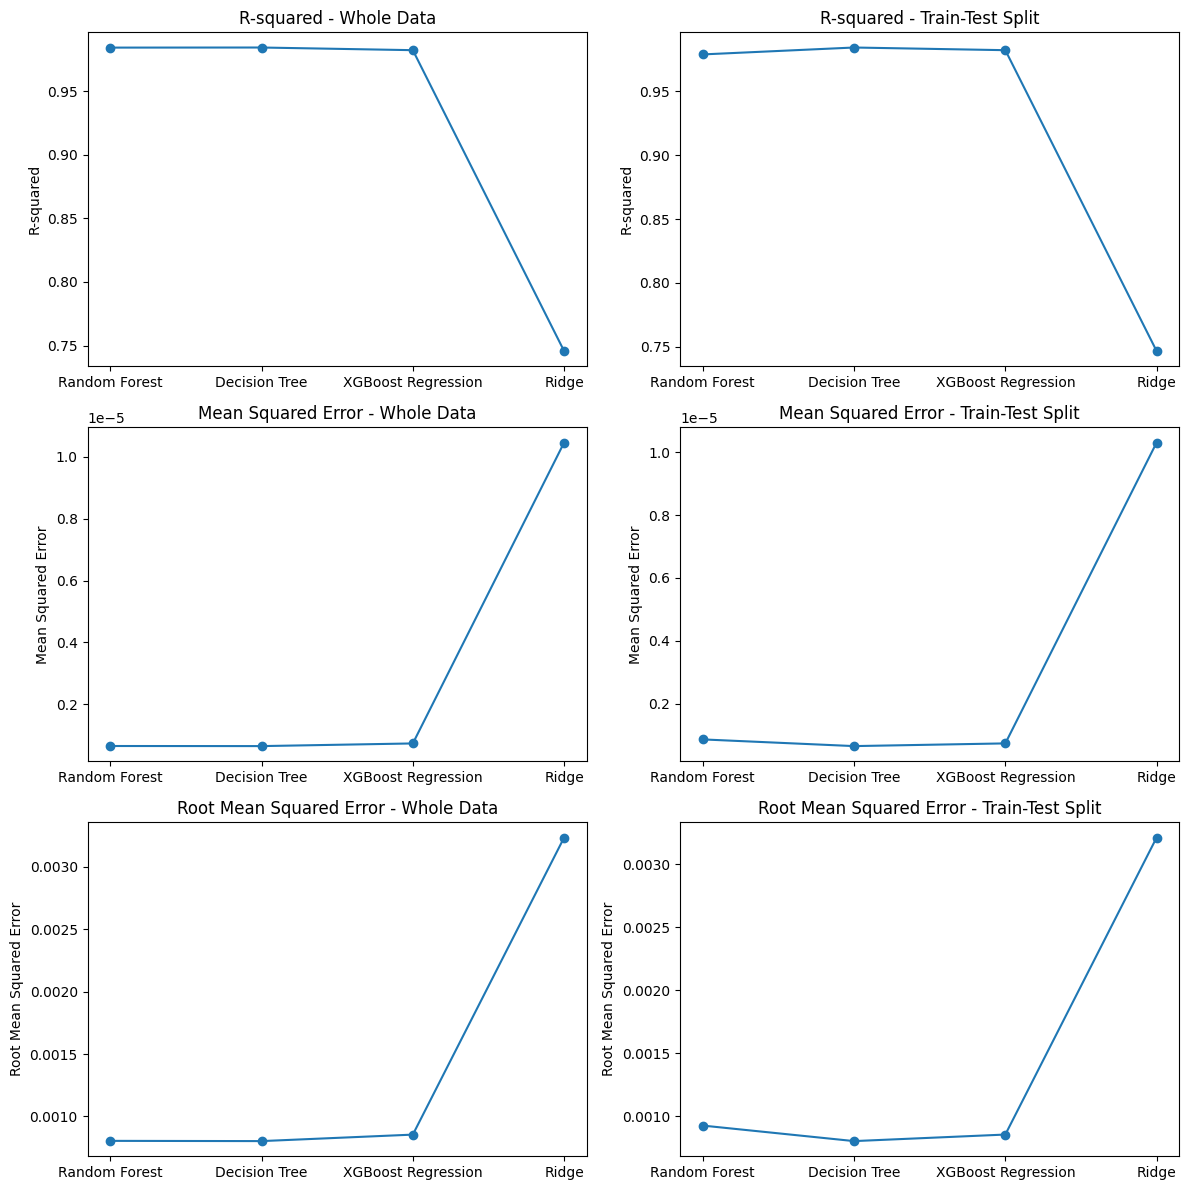

In [56]:
results_whole_data = {
    "Random Forest": {
        "R-squared": 0.9842659245761863,
        "Mean Squared Error": 6.474973757436279e-07,
        "Root Mean Squared Error": 0.0008046722163363339 
    },
    "XGBoost Regression": {
        "R-squared": 0.9822474521015834,
        "Mean Squared Error": 7.305626716133847e-07,
        "Root Mean Squared Error": 0.0008547295897612207
    },
    "Decision Tree": {
        "R-squared":  0.9843391665825283,
        "Mean Squared Error": 6.444832801820418e-07,
        "Root Mean Squared Error": 0.0008027971600485654
    },
    "Ridge": {
        "R-squared":  0.7456233311295216,
        "Mean Squared Error": 1.046824939549694e-05,
        "Root Mean Squared Error": 0.003235467415304463 
    }
}

results_train_test = {
    "Random Forest": {
        "R-squared": 0.9789304076167037,
        "Mean Squared Error": 8.574623738393744e-07,
        "Root Mean Squared Error": 0.0009259926424326353
    },
    "XGBoost Regression": {
        "R-squared": 0.9822474521015834,
        "Mean Squared Error": 7.305626716133847e-07,
        "Root Mean Squared Error": 0.0008547295897612207
    },
    "Decision Tree": {
        "R-squared": 0.9843391665825283,
        "Mean Squared Error": 6.444832801820418e-07,
        "Root Mean Squared Error": 0.0008027971600485654
    },
    "Ridge": {
        "R-squared": 0.7466447588266782,
        "Mean Squared Error": 1.0310716152883458e-05,
        "Root Mean Squared Error": 0.003211030388034884  
    }
}
metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error"]
labels = ["Random Forest", "Decision Tree", "XGBoost Regression","Ridge"]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 12))

for i, metric in enumerate(metrics):
    values_whole_data = [results_whole_data[model][metric] for model in labels]
    values_train_test = [results_train_test[model][metric] for model in labels]

    axes[i, 0].plot(labels, values_whole_data, marker='o')
    axes[i, 0].set_ylabel(metric)
    axes[i, 0].set_title(f"{metric} - Whole Data")

    axes[i, 1].plot(labels, values_train_test, marker='o')
    axes[i, 1].set_ylabel(metric)
    axes[i, 1].set_title(f"{metric} - Train-Test Split")

plt.tight_layout()
plt.show()

#### there is not a big difference between the train-test data and the whole data for the selected models, hence it might be a reliable model to predict. 

#### Hence we can use either decision tree, random forest and XGboost. 

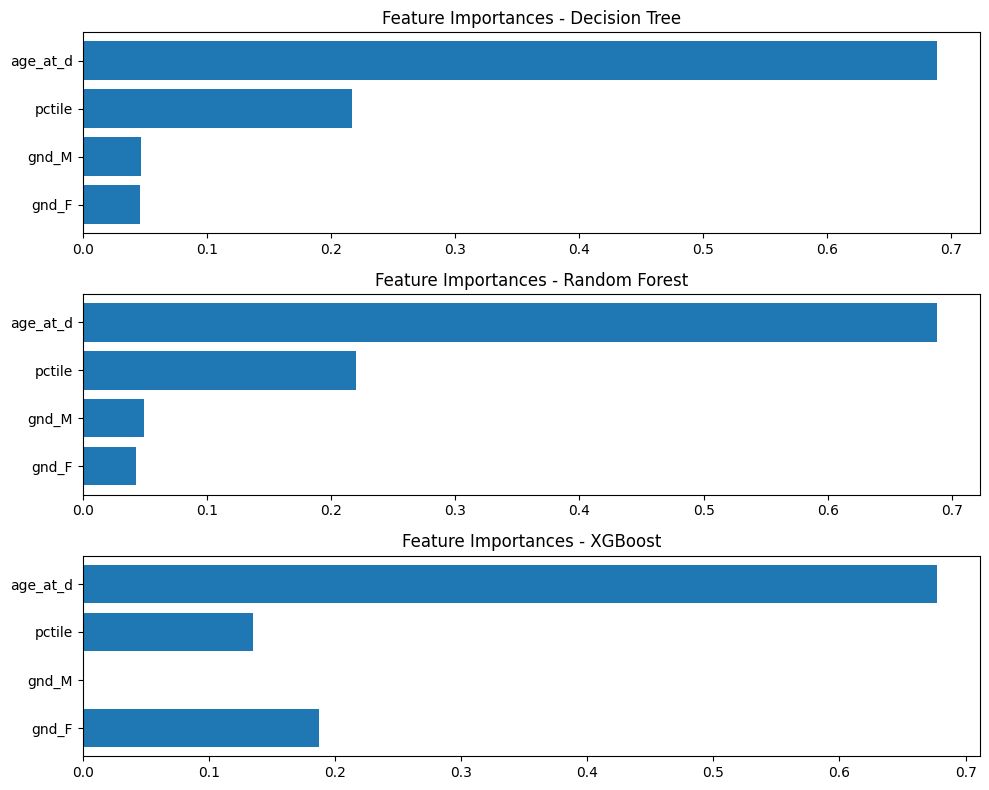

In [57]:
# Define the models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
}

# Fit the models and calculate feature importances
feature_importances = {}

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)
    
    if name == "Linear Regression" or name == "Ridge":
        # For Linear Regression and Ridge, get the coefficients
        coefficients = np.abs(model.coef_)
        feature_importances[name] = coefficients
    elif name == "Random Forest":
        # For Random Forest, get the feature importances
        importances = model.feature_importances_
        feature_importances[name] = importances
    elif name == "Decision Tree":
        importances = model.feature_importances_
        feature_importances[name] = importances
    elif name == "XGBoost":
        importances = model.feature_importances_
        feature_importances[name] = importances
# Plot the feature importances for each model
fig, axes = plt.subplots(len(models), figsize=(10, 8))

for i, (name, importances) in enumerate(feature_importances.items()):
    axes[i].barh(X.columns, importances)
    axes[i].set_title(f"Feature Importances - {name}")

plt.tight_layout()
plt.show()

#### The feature importance analysis conducted on all three models consistently shows similar results. This consistency in feature importance confirms that any of these three models can be used effectively.

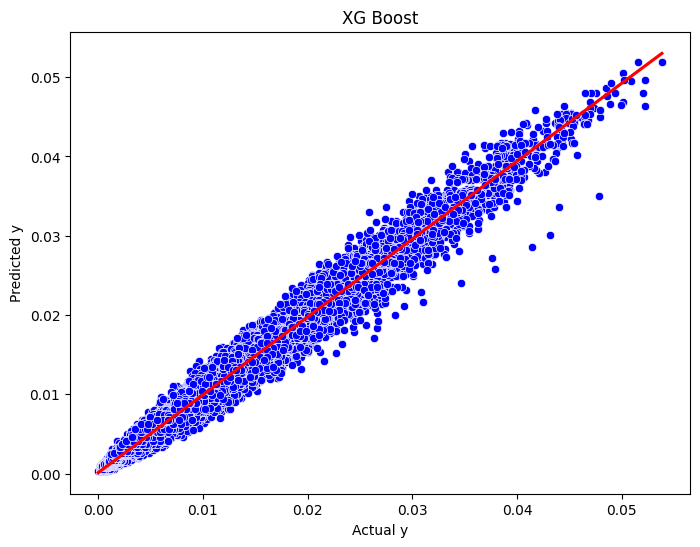

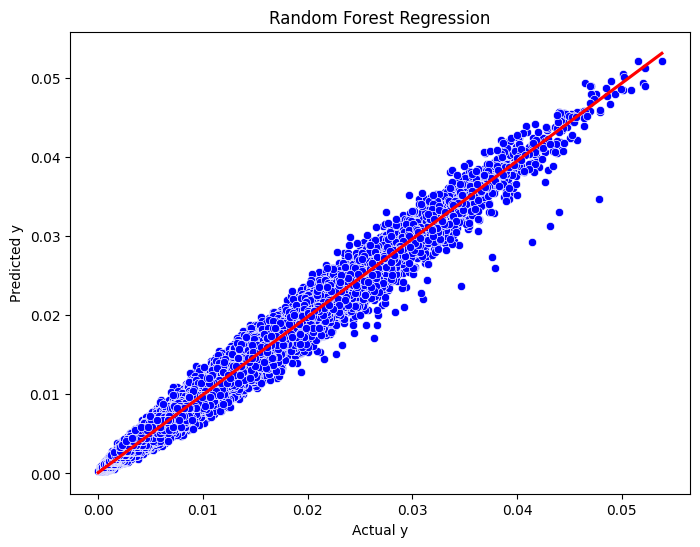

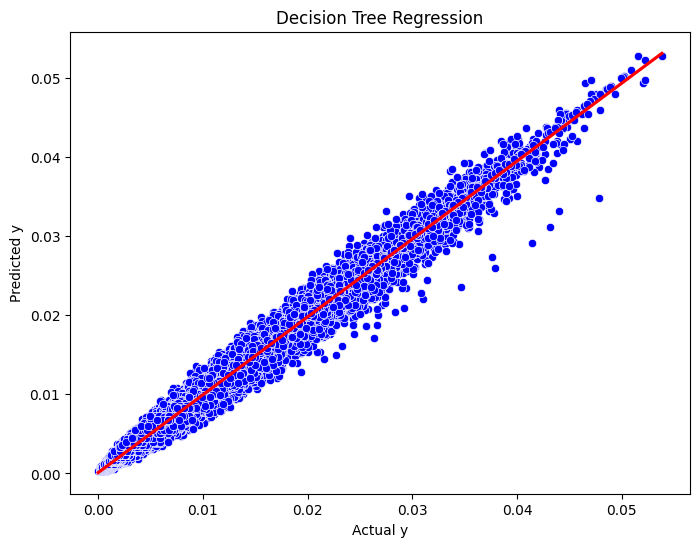

In [58]:
from xgboost import XGBRegressor

# Load the data
data = df_final_gnd_dropped

# Split the data into features and target variable
X = data.drop(['yod','mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']


# Instantiate the XGBoost model
XGBoost_model = XGBRegressor(random_state=42)

# Fit the SVR model to the entire data
XGBoost_model.fit(X, y)

# Make predictions on the entire data for SVM
y_pred_xgboost = XGBoost_model.predict(X)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model to the entire data
rf_model.fit(X, y)

# Make predictions on the entire data for Random Forest
y_pred_rf = rf_model.predict(X)

# Instantiate the Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the Random Forest model to the entire data
dt_model.fit(X, y)

# Make predictions on the entire data for Random Forest
y_pred_dt = dt_model.predict(X)


# Create a DataFrame to hold the actual y values, predicted values, and errors for SVM
results_df_xgboost = pd.DataFrame({'Actual': y, 'Predicted': y_pred_xgboost, 'Errors': y - y_pred_xgboost})

# Create a DataFrame to hold the actual y values, predicted values, and errors for Random Forest
results_df_rf = pd.DataFrame({'Actual': y, 'Predicted': y_pred_rf, 'Errors': y - y_pred_rf})

# Create a DataFrame to hold the actual y values, predicted values, and errors for decision tree
results_df_dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred_dt, 'Errors': y - y_pred_dt})



# Plot the actual y values against the predicted values for XGBoost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_xgboost, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_xgboost, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("XG Boost")

plt.show()

# Plot the actual y values against the predicted values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_rf, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_rf, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Random Forest Regression")

# Show the plot for Random Forest
plt.show()


# Plot the actual y values against the predicted values for Decision Tree
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_dt, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_dt, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Decision Tree Regression")

# Show the plot for Decision Tree
plt.show()



#### From the graph is doesnt seem like the data is over-fitted as there are some residuals from the red line in all 3 models. Hence it confirms that we can use either of the 3 models. 

In [60]:
## We are now training the model using time subcategories to allow the model to make future predictions.
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_final_gnd_dropped

# Split the data into features and target variable
X = data.drop(['mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']

# Split the data into training and testing sets based on 'yod' column
X_train = X[X['yod'] <= 2010]
y_train = y[X['yod'] <= 2010]
X_test = X[X['yod'] > 2010]
y_test = y[X['yod'] > 2010]

# Define the models
models = {
    "Ridge (Train-Test Split)": Ridge(),
    "Decision Tree (Train-Test Split)": DecisionTreeRegressor(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "XGBoost (Train-test Split)": xgb.XGBRegressor(random_state=42),
    "Linear Regression (Train-Test Split)": LinearRegression(),
    "Ridge (Whole Data)": Ridge(),
    "Decision Tree (Whole Data)": DecisionTreeRegressor(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42),
    "XGBoost(Whole Data)": xgb.XGBRegressor(random_state=42),
    "Linear Regression (Whole Split)": LinearRegression(),
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Ridge (Train-Test Split)       0.6954          0.0000               0.0045                   
Decision Tree (Train-Test Split) 0.9500          0.0000               0.0018                   
Random Forest (Train-Test Split) 0.9557          0.0000               0.0017                   
Linear Regression (Train-Test Split) 0.6954          0.0000               0.0045                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
XGBoost (Train-test Split)     0.9873          0.0000               0.0007                   
Ridge (Whole Data)             0.7467          0.0000               0.0032                   
Decision Tree (Whole Data)     1.0000          0.0000               0.0000                   
Random Forest (Whole Data)     0.9977          0.0000               0.0003               

#### The analysis continues to demonstrate that XGBoost, Random Forest, and Decision Tree models perform exceptionally well. Despite the alarmingly high R-squared values, it is likely attributed to the strong relationships observed between each variable and the mortality rate.

# Chosen Model: Decision Tree using only variables from feature importance

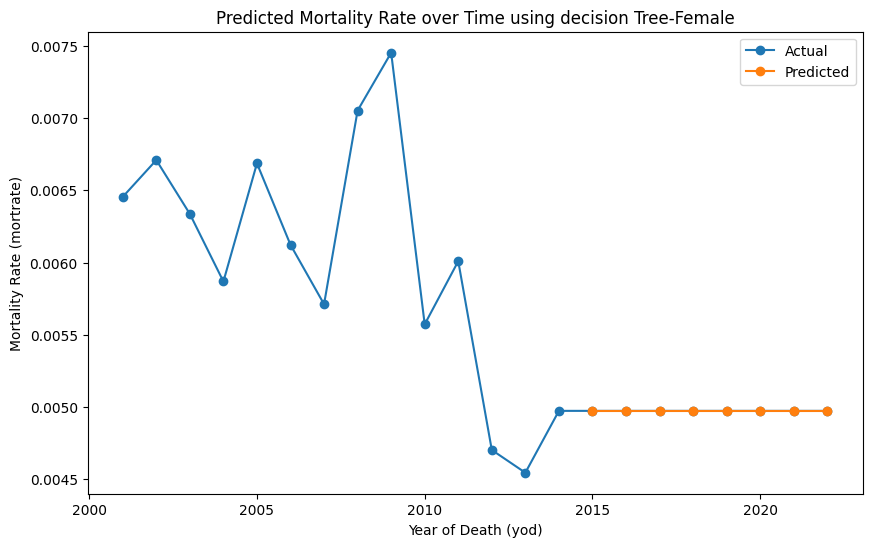

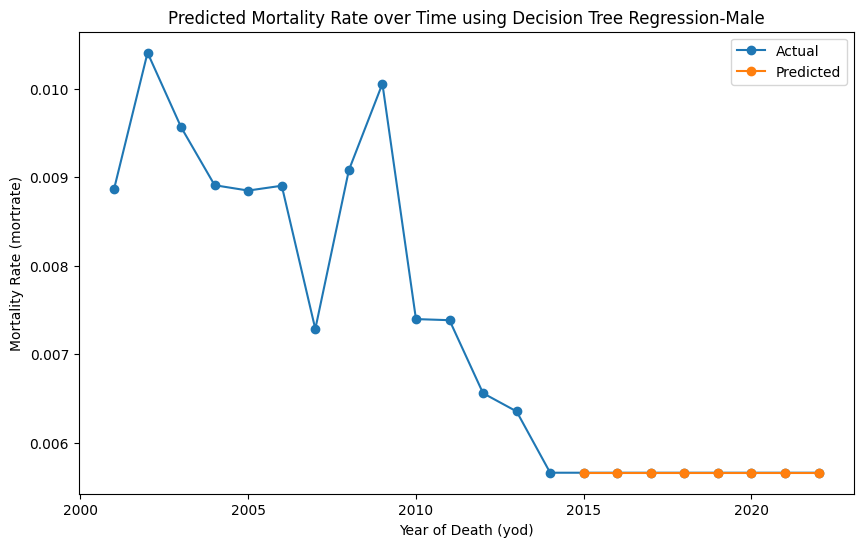

In [61]:

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 1) & (data['gnd_F'] == 1) & (data['gnd_M'] == 0)  & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [1]*len(future_years),
                         'gnd_M': [0]*len(future_years),
                         'pctile': [1]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [45]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using decision Tree-Female')
plt.legend()
plt.show()

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 1) & (data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the Ridge model
model = DecisionTreeRegressor()

# Train the Ridge model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [0]*len(future_years),
                         'gnd_M': [1]*len(future_years),
                         'pctile': [1]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [45]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using Decision Tree Regression-Male')
plt.legend()
plt.show()


Best Parameters - Female:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score - Female:  -2.451072388269462
Best Parameters - Male:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score - Male:  -33.31612994857828


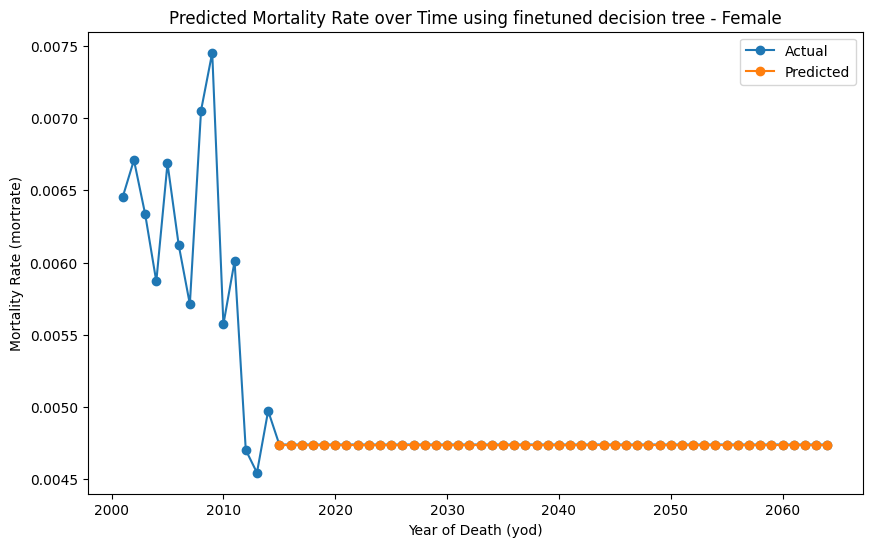

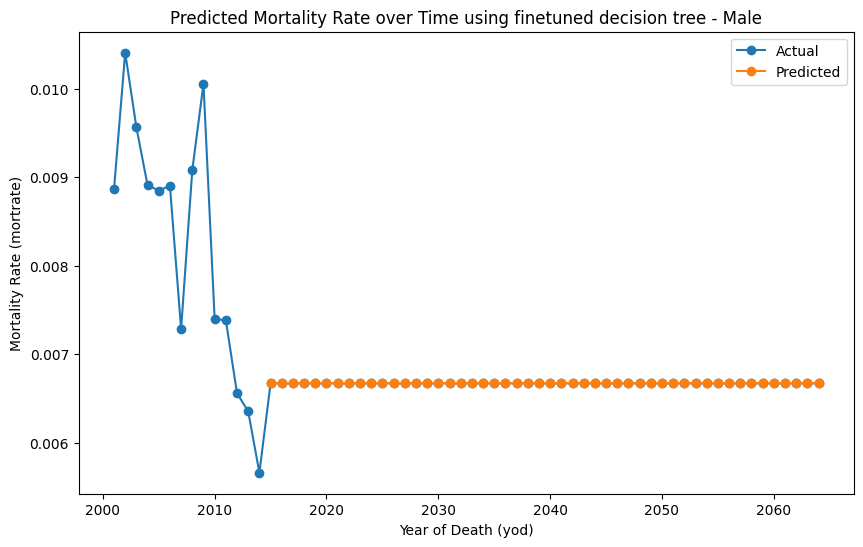

In [62]:
##tried to finetune the parameters for decision tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions so that we are able to check the prediction for each percentile.
filtered_data_F = data[(data['pctile'] == 1) & (data['gnd_F'] == 1) & (data['gnd_M'] == 0) & (data['age_at_d'] == 45)]
filtered_data_M = data[(data['pctile'] == 1) & (data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 45)]

# Split the data into features and target variable for female data
X_train_F = filtered_data_F[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train_F = filtered_data_F['mortrate']

# Split the data into features and target variable for male data
X_train_M = filtered_data_M[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train_M = filtered_data_M['mortrate']

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Decision Tree models
model_F = DecisionTreeRegressor()
model_M = DecisionTreeRegressor()

# Perform grid search for female data
grid_search_F = GridSearchCV(model_F, param_grid=param_grid, cv=5)
grid_search_F.fit(X_train_F, y_train_F)

# Perform grid search for male data
grid_search_M = GridSearchCV(model_M, param_grid=param_grid, cv=5)
grid_search_M.fit(X_train_M, y_train_M)

# Print the best parameters and best scores for both models
print("Best Parameters - Female: ", grid_search_F.best_params_)
print("Best Score - Female: ", grid_search_F.best_score_)
print("Best Parameters - Male: ", grid_search_M.best_params_)
print("Best Score - Male: ", grid_search_M.best_score_)

# Generate predictions for future years using the best models
future_years = range(2015, 2065)  # Adjust the range as needed

X_future_F = pd.DataFrame({'gnd_F': [1] * len(future_years),
                           'gnd_M': [0] * len(future_years),
                           'pctile': [1] * len(future_years),
                           'yod': future_years,
                           'age_at_d': [45] * len(future_years)})

X_future_M = pd.DataFrame({'gnd_F': [0] * len(future_years),
                           'gnd_M': [1] * len(future_years),
                           'pctile': [1] * len(future_years),
                           'yod': future_years,
                           'age_at_d': [45] * len(future_years)})

predicted_values_F = grid_search_F.best_estimator_.predict(X_future_F)
predicted_values_M = grid_search_M.best_estimator_.predict(X_future_M)

# Create DataFrames to hold the predicted values
predicted_df_F = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values_F})
predicted_df_M = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values_M})

# Concatenate the original and predicted data for female and male
merged_df_F = pd.concat([filtered_data_F[['yod', 'mortrate']], predicted_df_F])
merged_df_M = pd.concat([filtered_data_M[['yod', 'mortrate']], predicted_df_M])

# Plot the actual and predicted values for female
plt.figure(figsize=(10, 6))
plt.plot(merged_df_F['yod'], merged_df_F['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df_F['yod'], predicted_df_F['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using finetuned decision tree - Female')
plt.legend()
plt.show()

# Plot the actual and predicted values for male
plt.figure(figsize=(10, 6))
plt.plot(merged_df_M['yod'], merged_df_M['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df_M['yod'], predicted_df_M['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using finetuned decision tree - Male')
plt.legend()
plt.show()


#### It was concerning to see that there was no variation in the prediction model, hence we trained other models to check. 

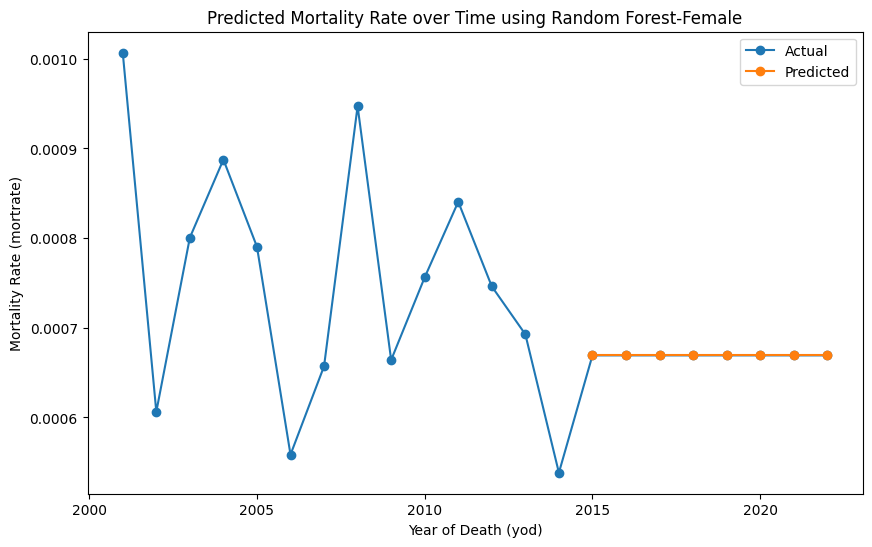

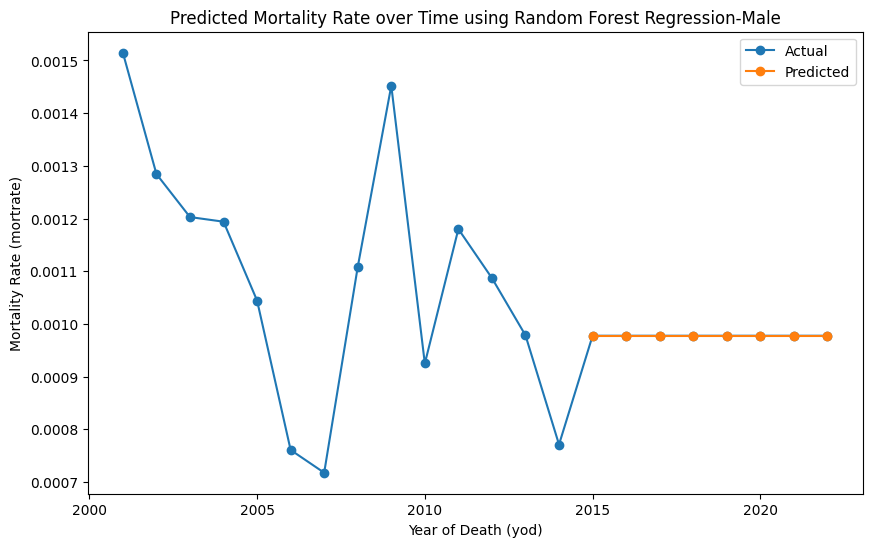

In [63]:
##checking for random forest prediction
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 1) & (data['gnd_M'] == 0)  & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the model
model = RandomForestRegressor(n_estimators=100, max_depth=1)

# Train the model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [1]*len(future_years),
                         'gnd_M': [0]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [45]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using Random Forest-Female')
plt.legend()
plt.show()

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the Ridge model
model = RandomForestRegressor(n_estimators=100, max_depth=1)

# Train the Ridge model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [0]*len(future_years),
                         'gnd_M': [1]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [60]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using Random Forest Regression-Male')
plt.legend()
plt.show()


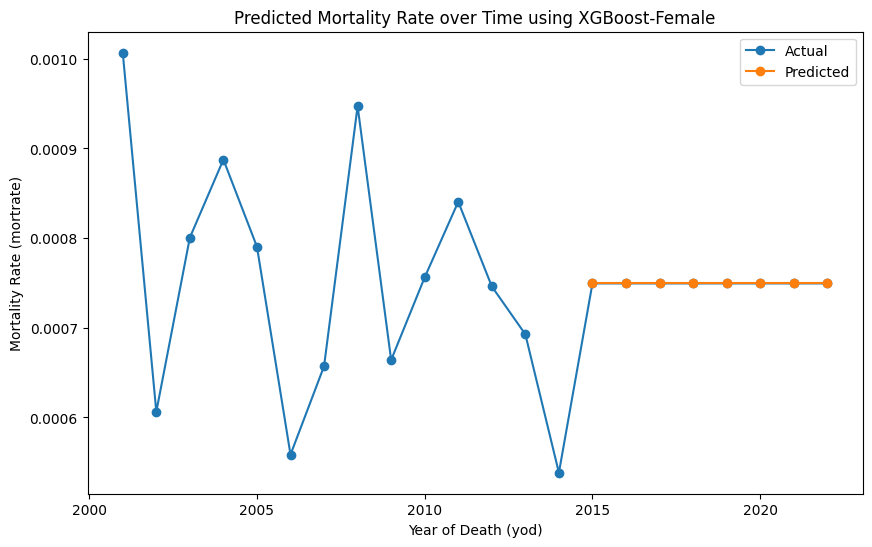

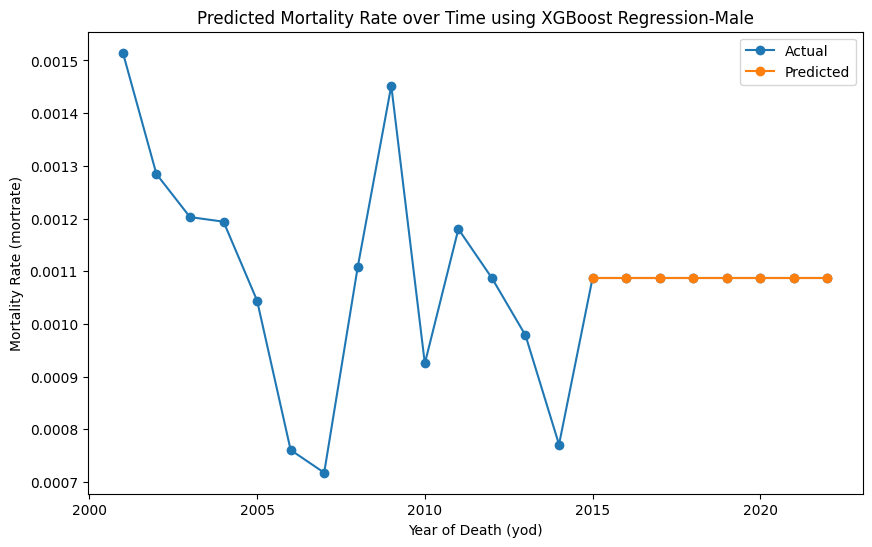

In [64]:
##checking for xgboost model
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 1) & (data['gnd_M'] == 0)  & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the model
model = xgb.XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [1]*len(future_years),
                         'gnd_M': [0]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [45]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using XGBoost-Female')
plt.legend()
plt.show()

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the Ridge model
model = xgb.XGBRegressor(random_state=42)

# Train the Ridge model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [0]*len(future_years),
                         'gnd_M': [1]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [60]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using XGBoost Regression-Male')
plt.legend()
plt.show()


#### The three models that we identified as the best all produced nearly flat predictions with minimal variation. We suspect that this lack of variation could be attributed to the narrow range of data years available, which might limit the model's ability to make accurate predictions. Additionally, it is possible that the current models are constrained and unable to capture the underlying variations effectively. Considering these factors, it appears that a more advanced machine learning model may be required to improve prediction capabilities.

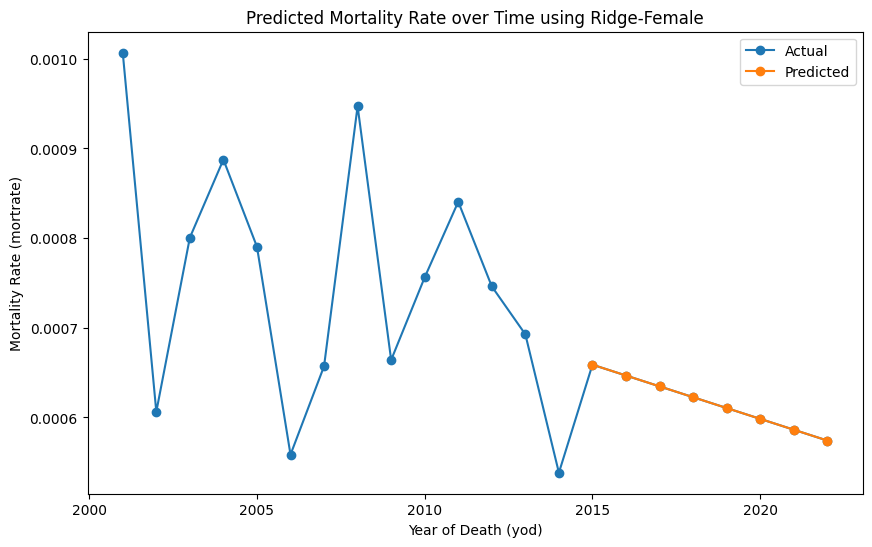

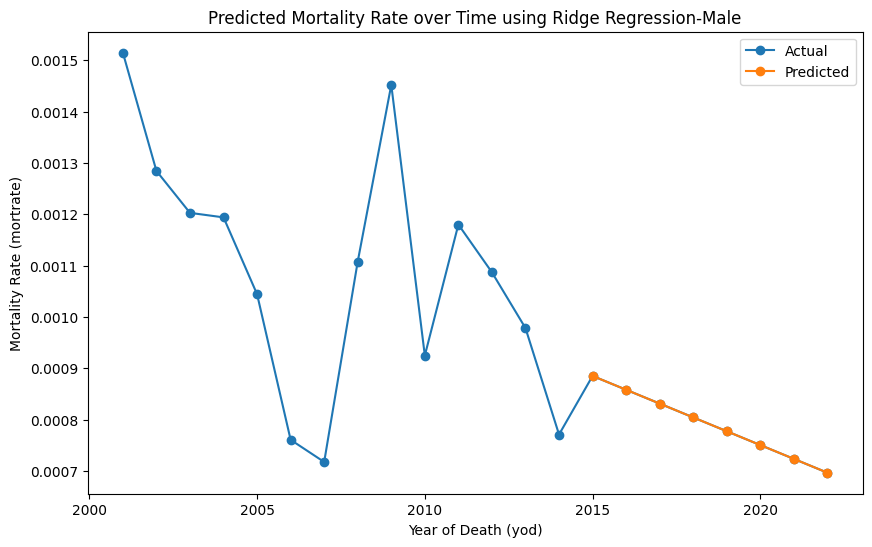

In [65]:
##checking for Ridge model which did not have the best r-squared value
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 1) & (data['gnd_M'] == 0)  & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [1]*len(future_years),
                         'gnd_M': [0]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [45]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using Ridge-Female')
plt.legend()
plt.show()

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the Ridge model
model = Ridge()

# Train the Ridge model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [0]*len(future_years),
                         'gnd_M': [1]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [60]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using Ridge Regression-Male')
plt.legend()
plt.show()


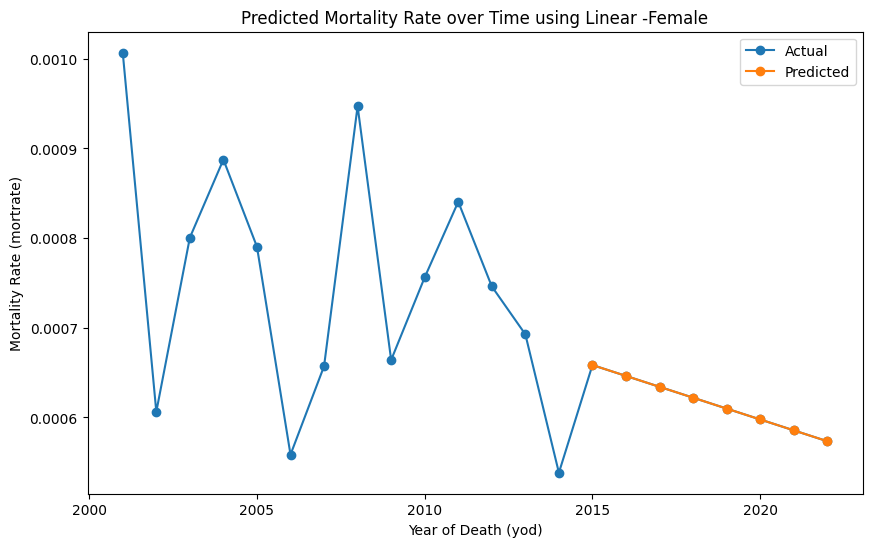

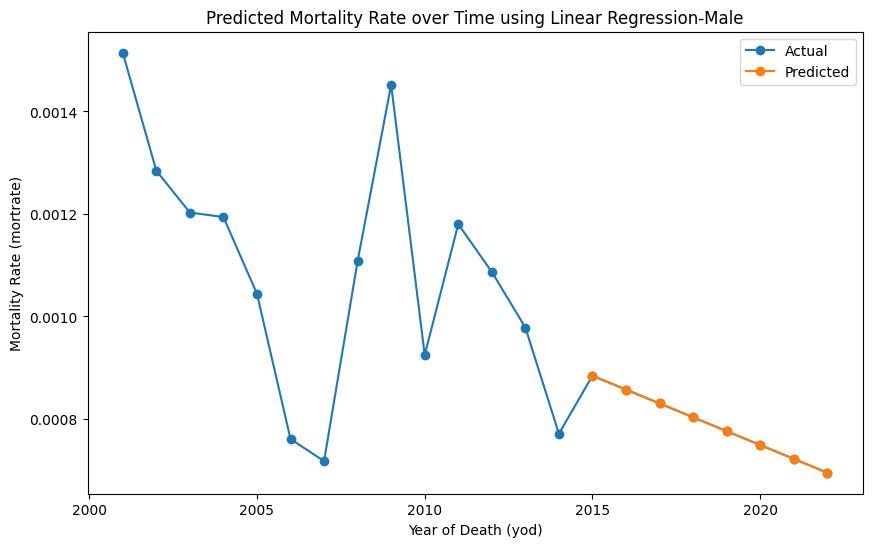

In [66]:
##checking for Linear Regression model which has similar r-squared value with ridge model
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 1) & (data['gnd_M'] == 0)  & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the model
model=LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [1]*len(future_years),
                         'gnd_M': [0]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [45]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using Linear -Female')
plt.legend()
plt.show()

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions
filtered_data = data[(data['pctile'] == 78) & (data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 45)]

# Split the data into features and target variable
X_train = filtered_data[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
y_train = filtered_data['mortrate']

# Instantiate the Ridge model
model= LinearRegression()

# Train the Ridge model
model.fit(X_train, y_train)

# Generate predictions for future years
future_years = range(2015, 2023)  # Adjust the range as needed
X_future = pd.DataFrame({'gnd_F': [0]*len(future_years),
                         'gnd_M': [1]*len(future_years),
                         'pctile': [78]*len(future_years),
                         'yod': future_years,
                         'age_at_d': [60]*len(future_years)})

predicted_values = model.predict(X_future)

# Create a DataFrame to hold the predicted values
predicted_df = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values})

# Concatenate the original and predicted data
merged_df = pd.concat([filtered_data[['yod', 'mortrate']], predicted_df])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['yod'], merged_df['mortrate'], marker='o', label='Actual')
plt.plot(predicted_df['yod'], predicted_df['mortrate'], marker='o', label='Predicted')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time using Linear Regression-Male')
plt.legend()
plt.show()


#### Although the models exhibit a decreasing trend and capture more variation, their reliability is questionable due to the significant difference in mortality rates over a span of just 10 years. It appears that these models might be overly simplistic and essentially drawing a straight line between the data points from 2000 to 2014 and extrapolating beyond that. This extrapolation approach may not accurately represent the complex dynamics and factors influencing mortality rates, suggesting the need for more sophisticated modeling techniques.

## Scaling the size of data to check if it will improve the results

In [54]:
#prediction model 4: In this model, we will use larger data set beacuse from the previous models, although the R-square value is high and the MSE is low, the prediction did not have much variation.
df_extended=pd.concat([df_original]*100, ignore_index=True)

print("Number of rows in the extended DataFrame:", len(df_extended))
df_extended

Number of rows in the extended DataFrame: 8540000


gnd  pctile  age_at_d   yod  lag  mortrate        hh_inc  deaths  \
0         F       1        40  2001    2  0.004409  3.648230e+02      95   
1         F       1        40  2002    2  0.005786  3.836687e+02     124   
2         F       1        40  2003    2  0.005046  3.747329e+02     107   
3         F       1        40  2004    2  0.004787  3.705288e+02     100   
4         F       1        40  2005    2  0.004725  3.561439e+02      93   
...      ..     ...       ...   ...  ...       ...           ...     ...   
8539995   M     100        74  2013   13  0.014334  2.700885e+06     123   
8539996   M     100        74  2014   13  0.014678  2.157079e+06     131   
8539997   M     100        75  2013   14  0.015552  2.458902e+06     130   
8539998   M     100        75  2014   14  0.016079  2.700885e+06     136   
8539999   M     100        76  2014   15  0.016527  2.458902e+06     136   

         count  
0        21545  
1        21431  
2        21203  
3        20890  
4        19684  
...        ...  
8539995   8581  
8539996   8925  
8539997   8359  
8539998   8458  
8539999   8229  

[8540000 rows x 9 columns]

In [55]:
df_extended.columns

Index(['gnd', 'pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'hh_inc',
       'deaths', 'count'],
      dtype='object')

In [56]:
df_extended.describe()

pctile      age_at_d           yod           lag      mortrate  \
count  8.540000e+06  8.540000e+06  8.540000e+06  8.540000e+06  8.540000e+06   
mean   5.050000e+01  5.501639e+01  2.008033e+03  3.065574e+00  6.074249e-03   
std    2.886607e+01  9.246164e+00  3.995765e+00  2.514671e+00  6.415026e-03   
min    1.000000e+00  4.000000e+01  2.001000e+03  2.000000e+00  0.000000e+00   
25%    2.575000e+01  4.700000e+01  2.005000e+03  2.000000e+00  1.754946e-03   
50%    5.050000e+01  5.500000e+01  2.008000e+03  2.000000e+00  3.769089e-03   
75%    7.525000e+01  6.200000e+01  2.012000e+03  2.000000e+00  7.978953e-03   
max    1.000000e+02  7.600000e+01  2.014000e+03  1.500000e+01  5.383966e-02   

             hh_inc        deaths         count  
count  8.540000e+06  8.540000e+06  8.540000e+06  
mean   9.799557e+04  8.023393e+01  1.649048e+04  
std    2.168431e+05  6.139186e+01  4.109861e+03  
min    1.650005e+01  0.000000e+00  5.606000e+03  
25%    3.049590e+04  3.400000e+01  1.260500e+04  
50%    5.982370e+04  6.300000e+01  1.770400e+04  
75%    1.030678e+05  1.100000e+02  1.988700e+04  
max    1.405658e+07  5.320000e+02  2.176200e+04

In [57]:
#checking for missing values
print(df_extended.info())
print(df_extended.isna().sum())
print("\nThere are no missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540000 entries, 0 to 8539999
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   gnd       object 
 1   pctile    int64  
 2   age_at_d  int64  
 3   yod       int64  
 4   lag       int64  
 5   mortrate  float64
 6   hh_inc    float64
 7   deaths    int64  
 8   count     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 586.4+ MB
None
gnd         0
pctile      0
age_at_d    0
yod         0
lag         0
mortrate    0
hh_inc      0
deaths      0
count       0
dtype: int64

There are no missing values.


In [58]:
# Checking subcategories for numerical variables to see if some integer valued variables are actually categorical
for column in df_extended:
    num_categories = df_extended[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in gnd: 2
Number of categories in pctile: 100
Number of categories in age_at_d: 37
Number of categories in yod: 14
Number of categories in lag: 14
Number of categories in mortrate: 79077
Number of categories in hh_inc: 67200
Number of categories in deaths: 384
Number of categories in count: 13598


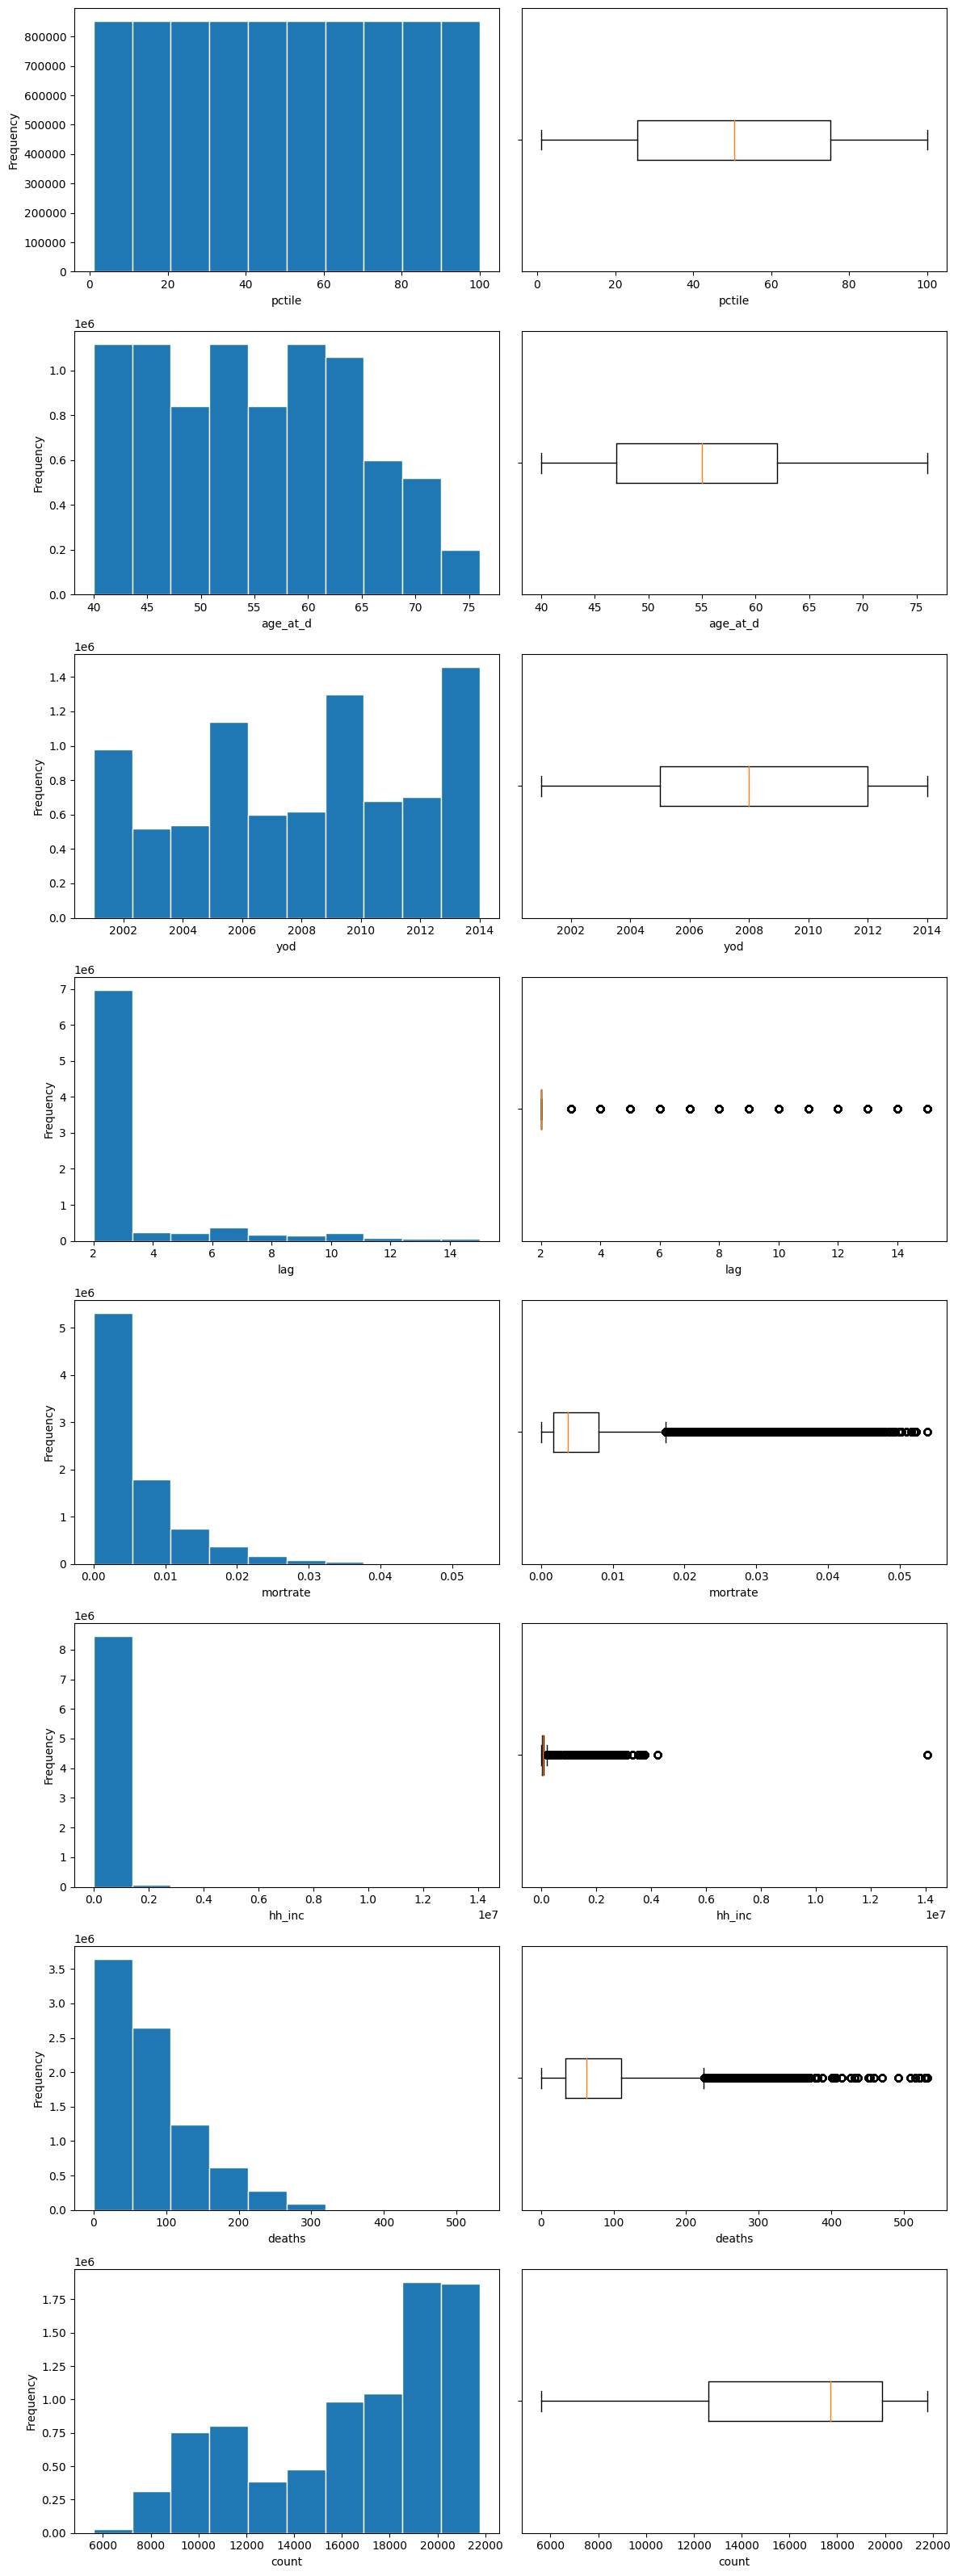

In [59]:
# Define the numerical variables
numerical_vars = ['pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'hh_inc', 'deaths', 'count']

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram
    axs[i, 0].hist(df_extended[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df_extended[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

         hh_inc    deaths     count
0           0.0  0.330827  0.997814
1           0.0  0.439850  0.989506
2           0.0  0.375940  0.972890
3           0.0  0.349624  0.950080
4           0.0  0.323308  0.862192
...         ...       ...       ...
8539995     1.0  0.436090  0.053053
8539996     1.0  0.466165  0.078123
8539997     1.0  0.462406  0.036875
8539998     1.0  0.484962  0.044090
8539999     1.0  0.484962  0.027401

[8540000 rows x 3 columns]


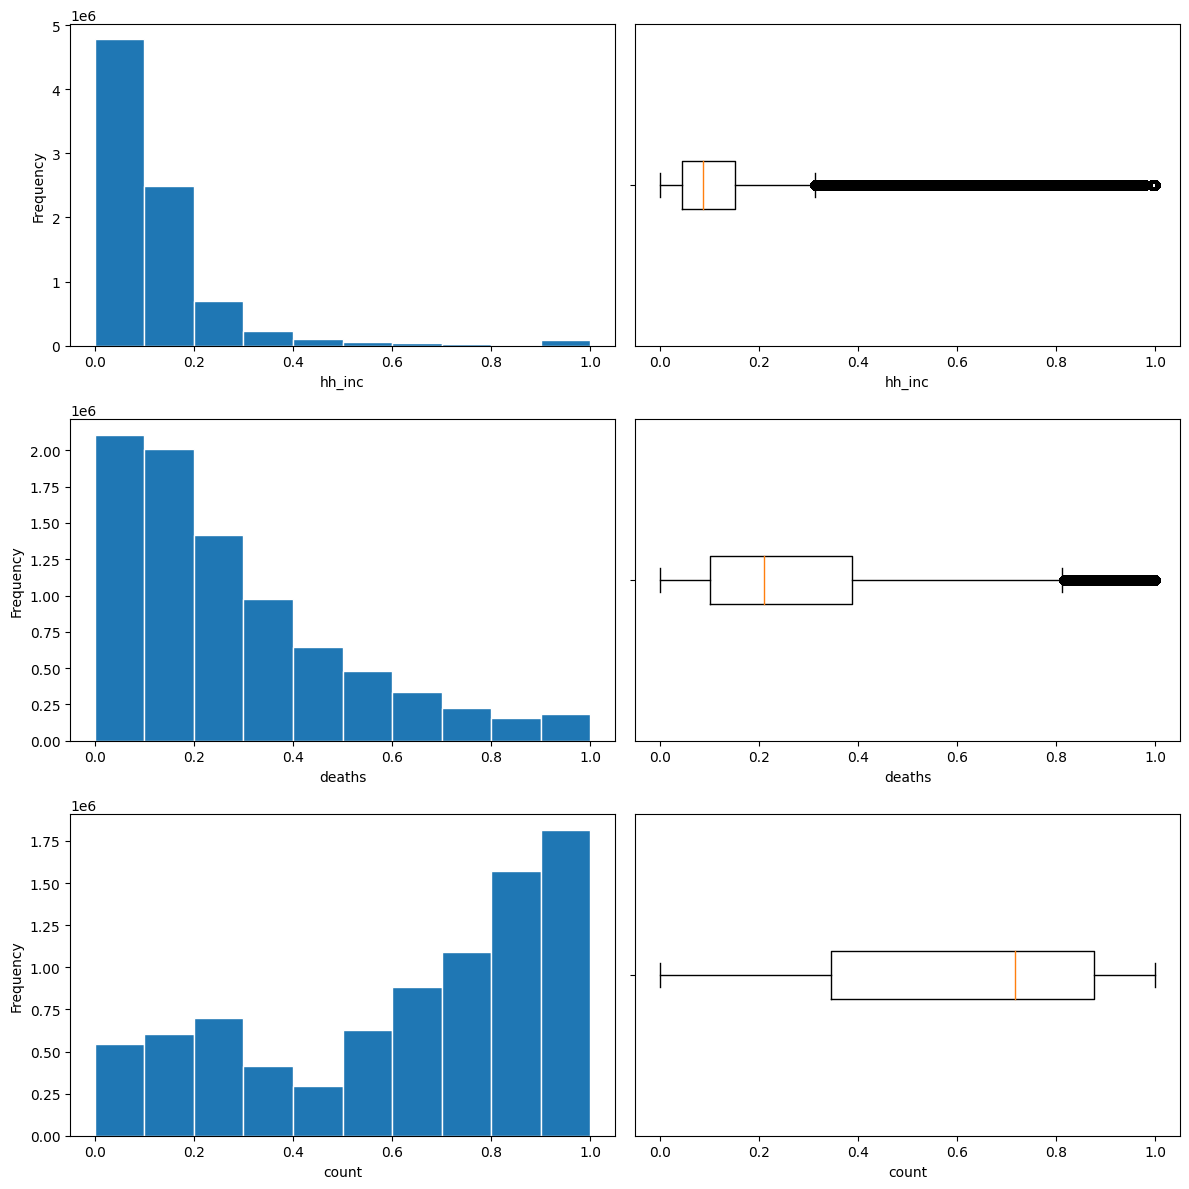

In [60]:
## Scaling ['hh_inc', 'deaths', 'count'] to get better distribution
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Define the numerical variables
numerical_vars_toscale = ['hh_inc', 'deaths', 'count']

# Apply Winsorization to reduce outliers
winsorized_df = df_extended.copy()
for var in numerical_vars_toscale:
    q_low = df_extended[var].quantile(0.01)
    q_high = df_extended[var].quantile(0.99)
    winsorized_df[var] = df_extended[var].clip(q_low, q_high)

# Apply scaling to the winsorized DataFrame
scaler = MinMaxScaler()  # or StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(winsorized_df[numerical_vars_toscale]), columns=numerical_vars_toscale)

# Display the scaled DataFrame
print(scaled_df)

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars_toscale), 2, figsize=(12, 4 * len(numerical_vars_toscale)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars_toscale):
    # Plot histogram
    axs[i, 0].hist(scaled_df[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(scaled_df[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [61]:
## combining the scaled variables to the dataframe
df_extended = df_extended.drop(columns=['hh_inc','deaths','count'])
df_combined_final = pd.concat([df_extended, scaled_df], axis=1)
df_combined_final

gnd  pctile  age_at_d   yod  lag  mortrate  hh_inc    deaths     count
0         F       1        40  2001    2  0.004409     0.0  0.330827  0.997814
1         F       1        40  2002    2  0.005786     0.0  0.439850  0.989506
2         F       1        40  2003    2  0.005046     0.0  0.375940  0.972890
3         F       1        40  2004    2  0.004787     0.0  0.349624  0.950080
4         F       1        40  2005    2  0.004725     0.0  0.323308  0.862192
...      ..     ...       ...   ...  ...       ...     ...       ...       ...
8539995   M     100        74  2013   13  0.014334     1.0  0.436090  0.053053
8539996   M     100        74  2014   13  0.014678     1.0  0.466165  0.078123
8539997   M     100        75  2013   14  0.015552     1.0  0.462406  0.036875
8539998   M     100        75  2014   14  0.016079     1.0  0.484962  0.044090
8539999   M     100        76  2014   15  0.016527     1.0  0.484962  0.027401

[8540000 rows x 9 columns]

In [62]:
# Create categorical variables df
categorical_columns = df_combined_final.select_dtypes(include=['object']).columns
df_cat_new = df_extended.loc[:, categorical_columns]
df_cat_new

gnd
0         F
1         F
2         F
3         F
4         F
...      ..
8539995   M
8539996   M
8539997   M
8539998   M
8539999   M

[8540000 rows x 1 columns]

In [63]:
# Encoding for categorical variables
# Perform one-hot encoding for nominal variables
df_encoded_new = pd.get_dummies(df_cat_new, columns=['gnd'])
df_encoded_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540000 entries, 0 to 8539999
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   gnd_F   bool 
 1   gnd_M   bool 
dtypes: bool(2)
memory usage: 16.3 MB


In [64]:
##combining everything into one df
df_final_extended = pd.concat([df_encoded_new, df_combined_final], axis=1)
df_final_extended

gnd_F  gnd_M gnd  pctile  age_at_d   yod  lag  mortrate  hh_inc  \
0         True  False   F       1        40  2001    2  0.004409     0.0   
1         True  False   F       1        40  2002    2  0.005786     0.0   
2         True  False   F       1        40  2003    2  0.005046     0.0   
3         True  False   F       1        40  2004    2  0.004787     0.0   
4         True  False   F       1        40  2005    2  0.004725     0.0   
...        ...    ...  ..     ...       ...   ...  ...       ...     ...   
8539995  False   True   M     100        74  2013   13  0.014334     1.0   
8539996  False   True   M     100        74  2014   13  0.014678     1.0   
8539997  False   True   M     100        75  2013   14  0.015552     1.0   
8539998  False   True   M     100        75  2014   14  0.016079     1.0   
8539999  False   True   M     100        76  2014   15  0.016527     1.0   

           deaths     count  
0        0.330827  0.997814  
1        0.439850  0.989506  
2        0.375940  0.972890  
3        0.349624  0.950080  
4        0.323308  0.862192  
...           ...       ...  
8539995  0.436090  0.053053  
8539996  0.466165  0.078123  
8539997  0.462406  0.036875  
8539998  0.484962  0.044090  
8539999  0.484962  0.027401  

[8540000 rows x 11 columns]

In [65]:
df_final_largesize = df_final_extended.copy()
df_final_largesize.drop('gnd', axis=1, inplace=True)
df_final_largesize = df_final_largesize.astype('float64')
df_final_largesize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540000 entries, 0 to 8539999
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   gnd_F     float64
 1   gnd_M     float64
 2   pctile    float64
 3   age_at_d  float64
 4   yod       float64
 5   lag       float64
 6   mortrate  float64
 7   hh_inc    float64
 8   deaths    float64
 9   count     float64
dtypes: float64(10)
memory usage: 651.6 MB


In [66]:
# Check if there is missing values in df_num
missing_values = df_final_largesize.isnull().sum()
print(missing_values)

gnd_F       0
gnd_M       0
pctile      0
age_at_d    0
yod         0
lag         0
mortrate    0
hh_inc      0
deaths      0
count       0
dtype: int64


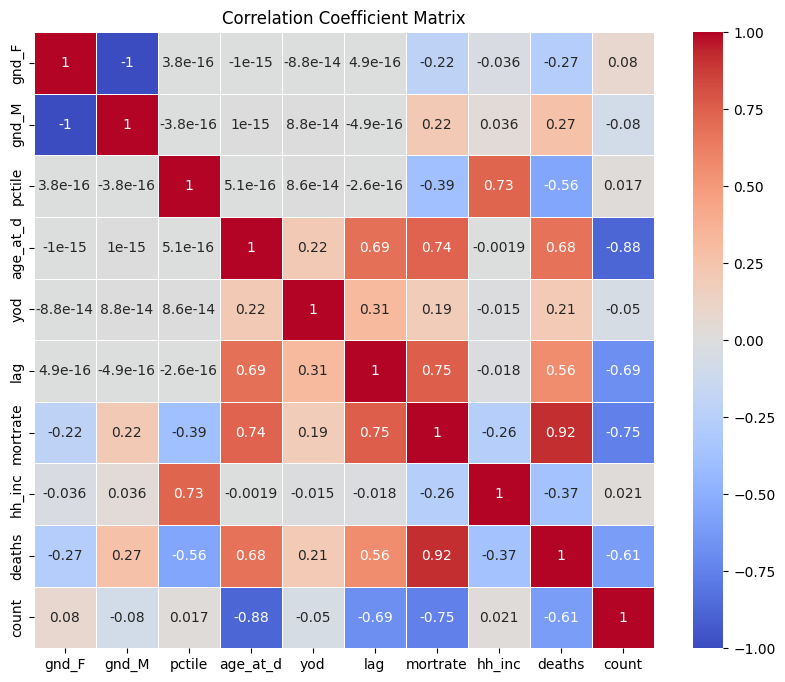

In [67]:
#Define the numerical variables
numerical_vars = ['gnd_F', 'gnd_M', 'pctile', 'age_at_d', 'yod', 'lag', 'mortrate',
       'hh_inc', 'deaths', 'count']
df_num2=df_final_largesize[numerical_vars]
correlation_matrix = df_num2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

In [68]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_final_largesize)
# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Principal Components:
[[ 1.52325882e-07 -1.52325882e-07  9.99983872e-01 -8.89738194e-06
  -1.14944767e-06 -1.99695309e-06 -8.56441771e-05  3.62991983e-03
  -4.36383705e-03  1.72722162e-04]
 [-9.30209287e-06  9.30209287e-06  8.54436960e-05  9.74391756e-01
   1.13838325e-01  1.91254593e-01  5.10644375e-04 -5.09824320e-05
   1.63346433e-02 -2.74978285e-02]
 [-7.94337742e-06  7.94337742e-06 -7.39225775e-06  1.35544249e-01
  -9.84961051e-01 -1.06184540e-01 -1.07602344e-05  5.83746041e-04
  -1.73760160e-03 -1.41762930e-02]
 [-2.55892146e-04  2.55892146e-04  6.37863480e-05 -1.77183793e-01
  -1.29225081e-01  9.75315276e-01  1.14190322e-03 -1.57034305e-03
   1.23426902e-02 -2.25974848e-02]
 [-7.03947291e-01  7.03947291e-01  3.61277256e-04 -1.98437979e-03
   3.57717239e-04 -2.57366700e-03  1.99725505e-03  7.52712343e-03
   8.76122415e-02 -3.41913882e-02]
 [ 1.13889504e-02 -1.13889504e-02 -3.81361898e-04 -2.15655809e-02
   1.38065320e-02 -2.24169280e-02  1.69783765e-03 -8.01454249e-02
  -1.927182

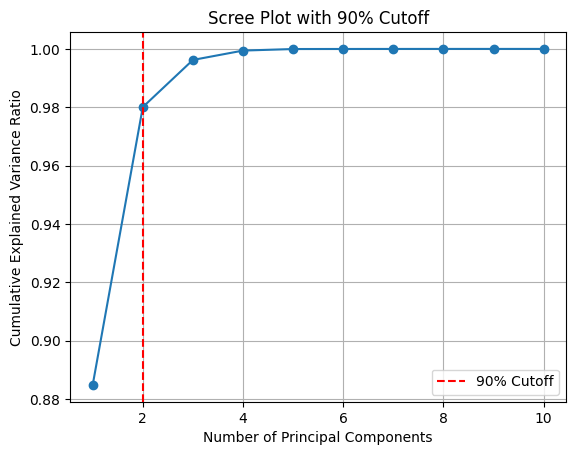

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_final_largesize)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 90% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='90% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 90% Cutoff')
plt.legend()
plt.grid(True)
plt.show()

Variable Contributions for PCs:
            gnd_F         gnd_M    pctile  age_at_d       yod       lag  \
PC1  1.523259e-07 -1.523259e-07  0.999984 -0.000009 -0.000001 -0.000002   
PC2 -9.302093e-06  9.302093e-06  0.000085  0.974392  0.113838  0.191255   
PC3 -7.943377e-06  7.943377e-06 -0.000007  0.135544 -0.984961 -0.106185   
PC4 -2.558921e-04  2.558921e-04  0.000064 -0.177184 -0.129225  0.975315   
PC5 -7.039473e-01  7.039473e-01  0.000361 -0.001984  0.000358 -0.002574   

     mortrate    hh_inc    deaths     count  
PC1 -0.000086  0.003630 -0.004364  0.000173  
PC2  0.000511 -0.000051  0.016335 -0.027498  
PC3 -0.000011  0.000584 -0.001738 -0.014176  
PC4  0.001142 -0.001570  0.012343 -0.022597  
PC5  0.001997  0.007527  0.087612 -0.034191  


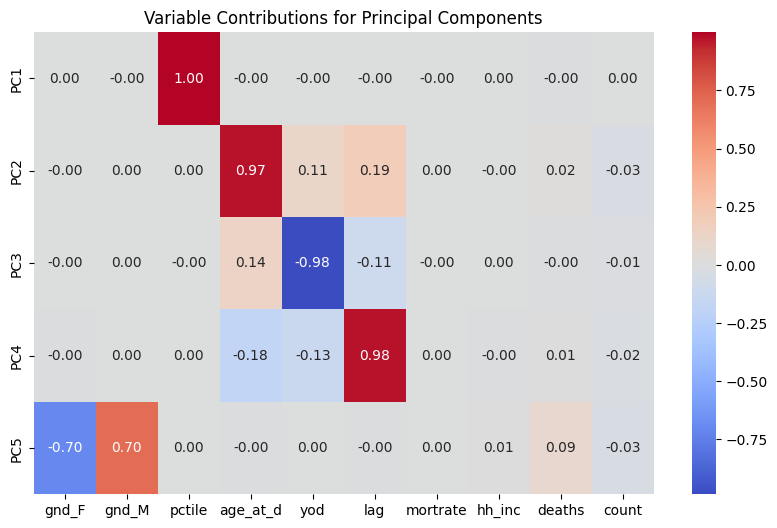

In [70]:
# Instantiate PCA with the number of components equal to the number of columns in the scaled numerical data
pca = PCA(n_components=5)

# Apply PCA to the scaled numerical data
pca.fit(df_final_largesize)

# Get the contribution of each original variable to the principal components
variable_contributions = pca.components_

# Create a DataFrame to hold the variable contributions
contributions_df = pd.DataFrame(variable_contributions, columns=df_final_largesize.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Print the variable contributions for PCs
print("Variable Contributions for PCs:")
print(contributions_df)

# Create a heatmap to visualize the variable contributions
plt.figure(figsize=(10, 6))
sns.heatmap(contributions_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Variable Contributions for Principal Components")
plt.show()


In [ ]:
#prediction model 1: In this model, we will use all the features to get the initial results.
# load the data
data = df_final_largesize

# split the data into features and target variable
X = data.drop(['mortrate','hh_inc', 'deaths', 'count'], axis=1)
y = data['mortrate']

# split the data into training and testing sets, (error of both sets should be almost similar to ensure valid predictions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1) ##hyperpyrameter to penalise the linear regression and make the result different from linear regression (we will chnage later to check if it is better)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


## Results after making the data size larger changes the r-squared value for some models to 1.0 which means its more overfitted and unreliable. The resulting DataFrame, df_extended, will have the same data as df_original, but repeated 100 times. Therefore, the number of rows in df_extended will be 100 times the number of rows in df_original. However, since the data is duplicated, this does not provide any additional information or variation to improve the prediction models. It does not provide any key variation to the data, but only give stronger signals for each value.

## hence we will use Decision Tree with the variables from feature importance (model 3) as our prediction model.

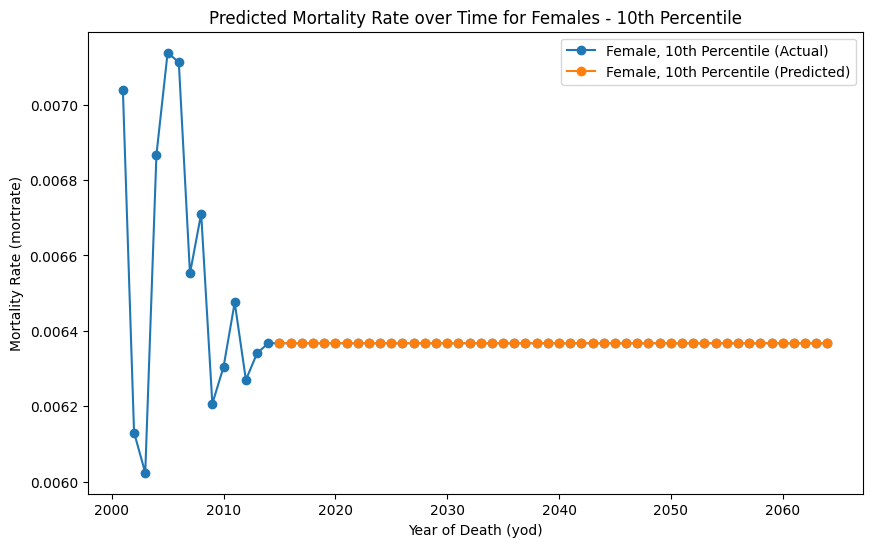

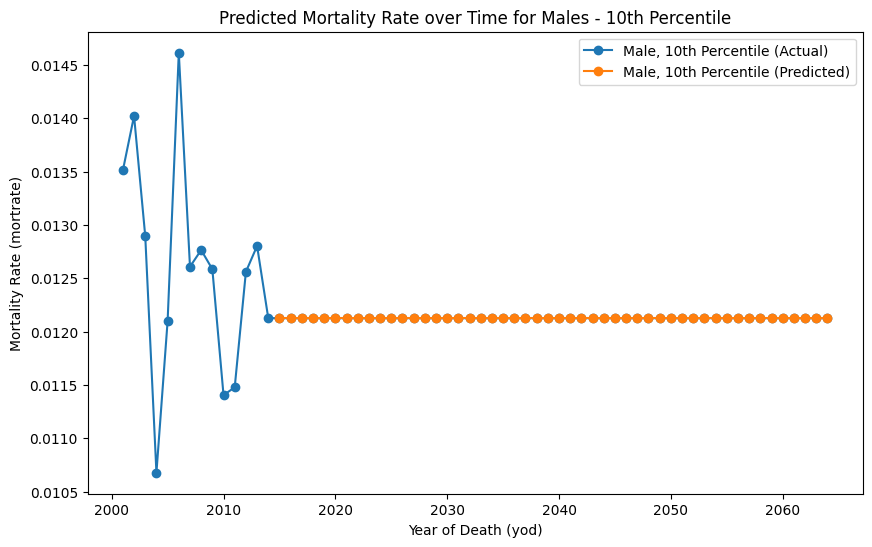

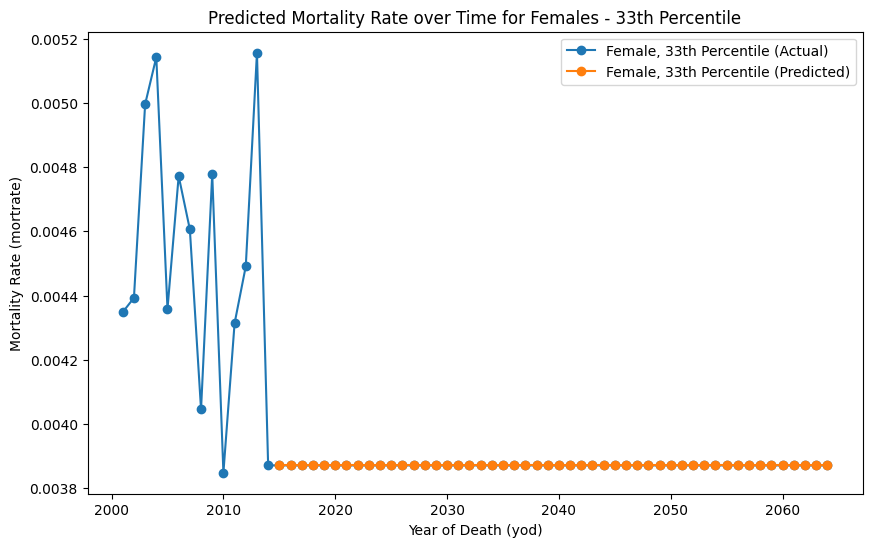

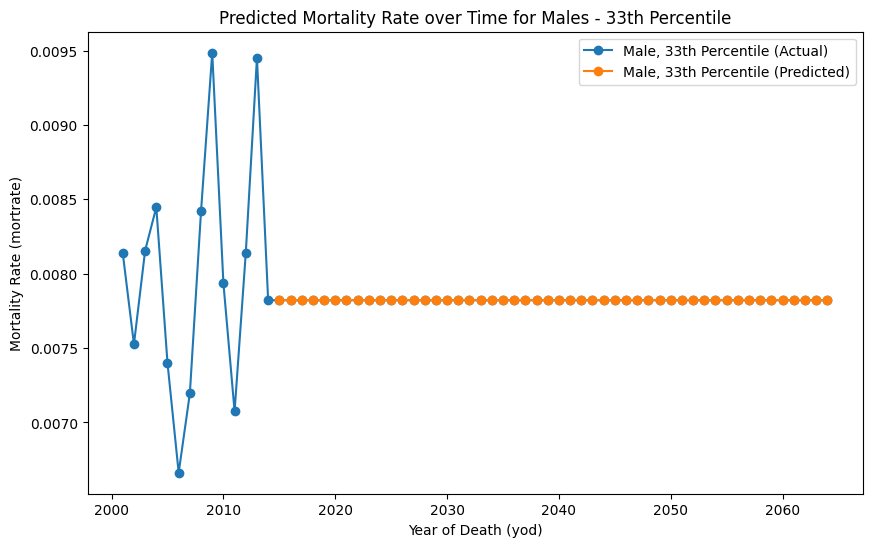

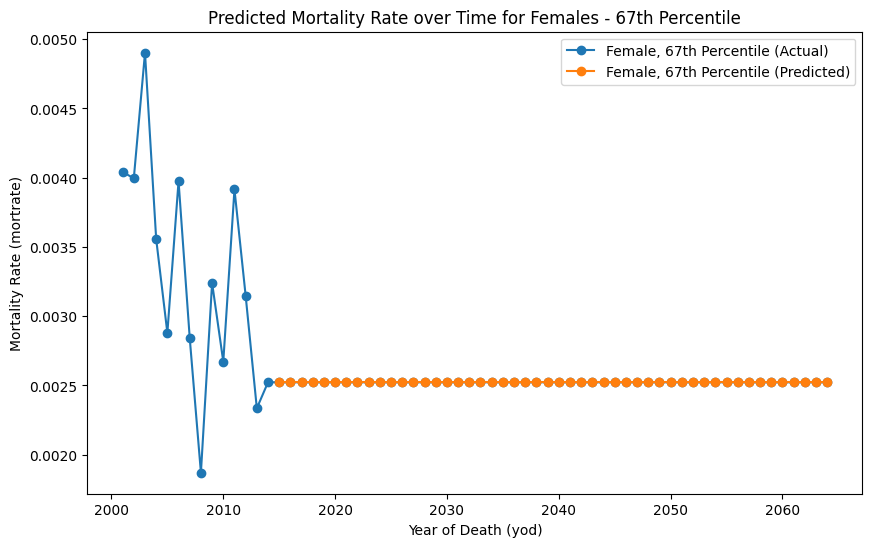

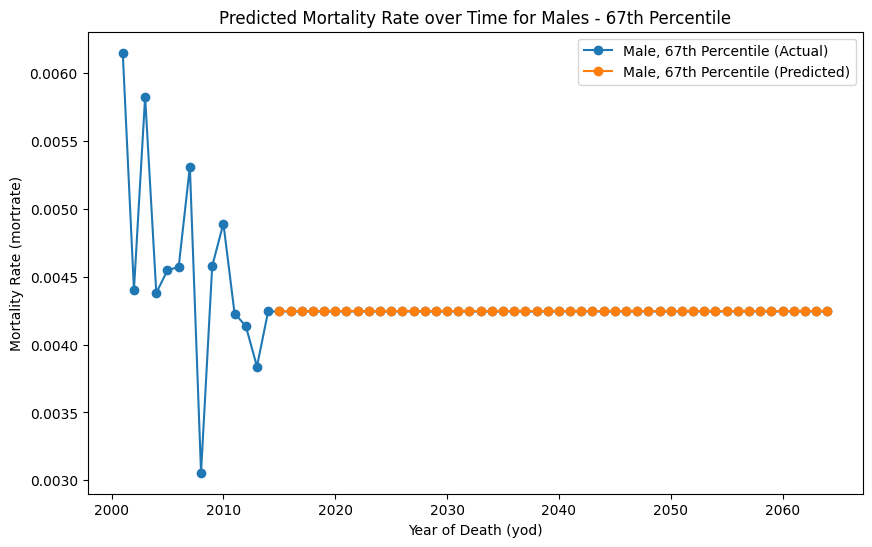

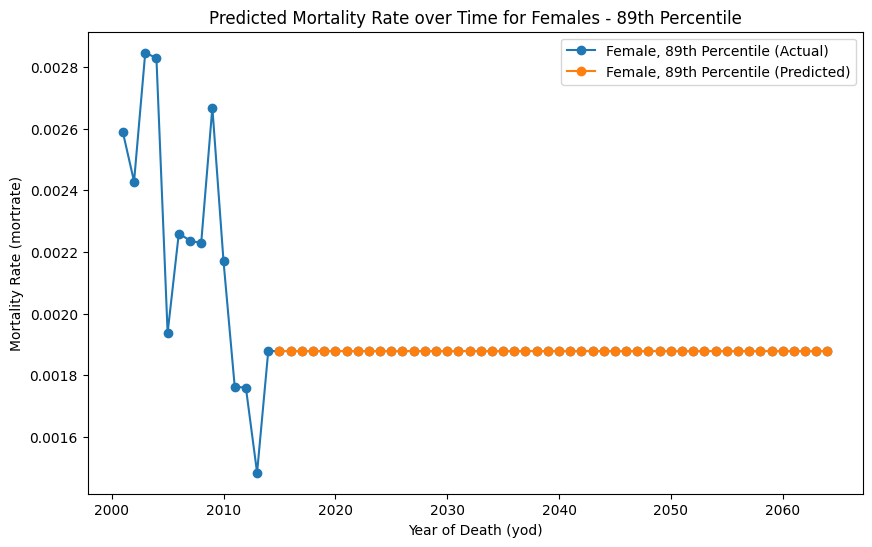

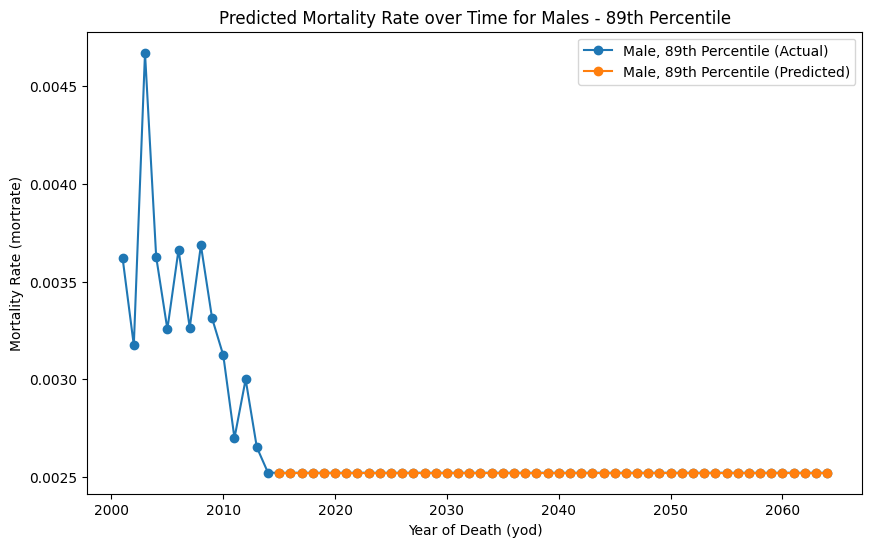

In [93]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Define the percentiles to plot
percentiles = [10, 33, 67, 89]

# Iterate over each percentile
for percentile in percentiles:
    # Filter the data based on the specified conditions for females
    filtered_data_F = data[(data['pctile'] == percentile) & (data['gnd_F'] == 1) & (data['gnd_M'] == 0) & (data['age_at_d'] == 58)]

    # Filter the data based on the specified conditions for males
    filtered_data_M = data[(data['pctile'] == percentile) & (data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 58)]

    # Split the data into features and target variable for female data
    X_train_F = filtered_data_F[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
    y_train_F = filtered_data_F['mortrate']

    # Split the data into features and target variable for male data
    X_train_M = filtered_data_M[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
    y_train_M = filtered_data_M['mortrate']

    # Instantiate the Decision Tree models
    model_F = DecisionTreeRegressor()
    model_M = DecisionTreeRegressor()

    # Perform grid search for female data
    model_F.fit(X_train_F, y_train_F)

    # Perform grid search for male data
    model_M.fit(X_train_M, y_train_M)

    # Generate predictions for future years using the models
    future_years = range(2015, 2065)  # Adjust the range as needed

    X_future_F = pd.DataFrame({'gnd_F': [1] * len(future_years),
                               'gnd_M': [0] * len(future_years),
                               'pctile': [percentile] * len(future_years),
                               'yod': future_years,
                               'age_at_d': [58] * len(future_years)})

    X_future_M = pd.DataFrame({'gnd_F': [0] * len(future_years),
                               'gnd_M': [1] * len(future_years),
                               'pctile': [percentile] * len(future_years),
                               'yod': future_years,
                               'age_at_d': [58] * len(future_years)})

    predicted_values_F = model_F.predict(X_future_F)
    predicted_values_M = model_M.predict(X_future_M)

    # Create DataFrames to hold the predicted values
    predicted_df_F = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values_F})
    predicted_df_M = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values_M})

    # Concatenate the original and predicted data for females
    merged_df_F = pd.concat([filtered_data_F[['yod', 'mortrate']], predicted_df_F])

    # Concatenate the original and predicted data for males
    merged_df_M = pd.concat([filtered_data_M[['yod', 'mortrate']], predicted_df_M])

    # Plot the actual and predicted values for females
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_F['yod'], merged_df_F['mortrate'], marker='o', label=f'Female, {percentile}th Percentile (Actual)')
    plt.plot(predicted_df_F['yod'], predicted_df_F['mortrate'], marker='o', label=f'Female, {percentile}th Percentile (Predicted)')
    plt.xlabel('Year of Death (yod)')
    plt.ylabel('Mortality Rate (mortrate)')
    plt.title(f'Predicted Mortality Rate over Time for Females - {percentile}th Percentile')
    plt.legend()
    plt.show()

    # Plot the actual and predicted values for males
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_M['yod'], merged_df_M['mortrate'], marker='o', label=f'Male, {percentile}th Percentile (Actual)')
    plt.plot(predicted_df_M['yod'], predicted_df_M['mortrate'], marker='o', label=f'Male, {percentile}th Percentile (Predicted)')
    plt.xlabel('Year of Death (yod)')
    plt.ylabel('Mortality Rate (mortrate)')
    plt.title(f'Predicted Mortality Rate over Time for Males - {percentile}th Percentile')
    plt.legend()
    plt.show()


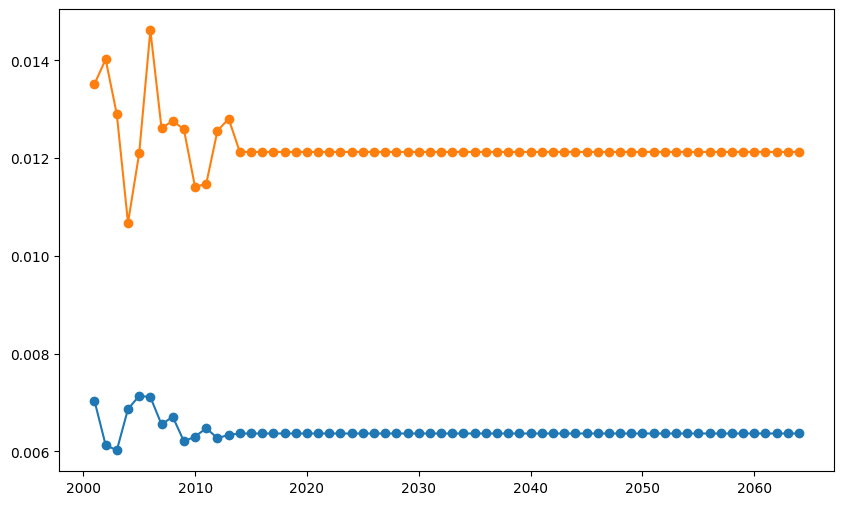

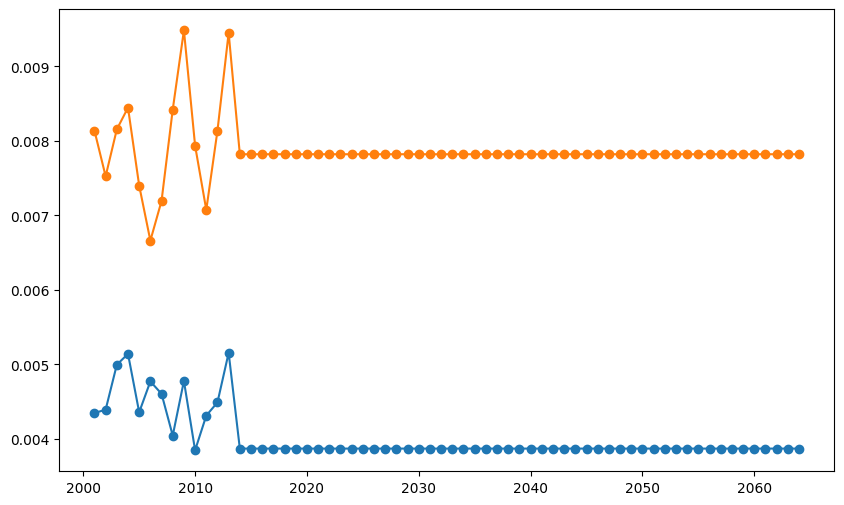

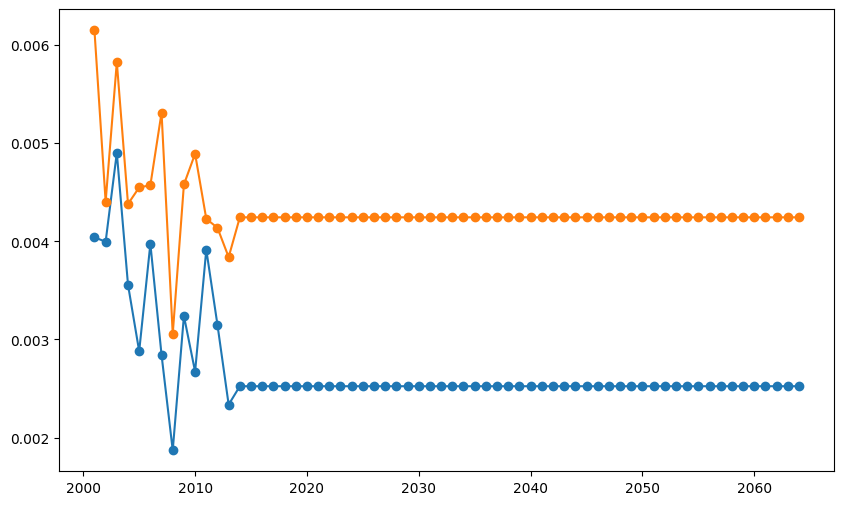

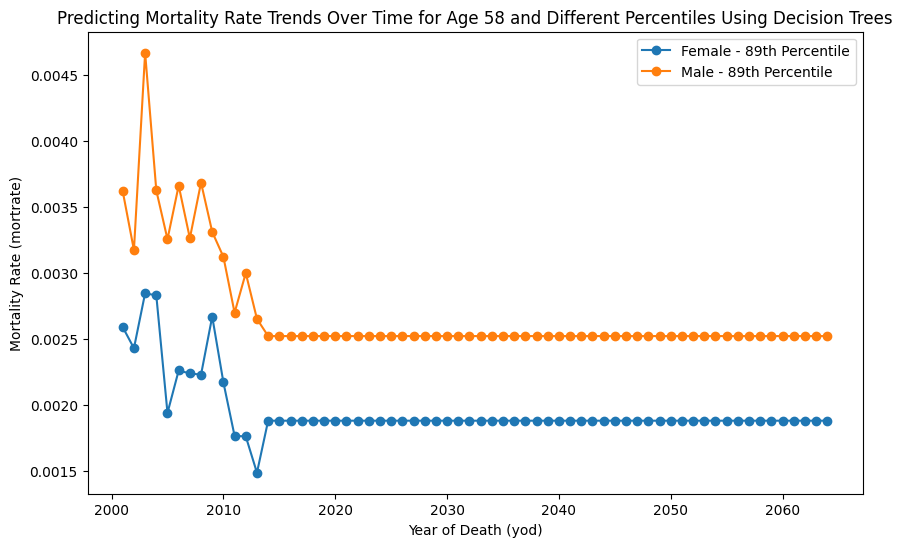

In [94]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Define the percentiles to plot
percentiles = [10, 33, 67, 89]

# Iterate over each percentile
for percentile in percentiles:
    # Filter the data based on the specified conditions for females
    filtered_data_F = data[(data['pctile'] == percentile) & (data['gnd_F'] == 1) & (data['age_at_d'] == 58)]

    # Filter the data based on the specified conditions for males
    filtered_data_M = data[(data['pctile'] == percentile) & (data['gnd_M'] == 1) & (data['age_at_d'] == 58)]

    # Split the data into features and target variable for female data
    X_train_F = filtered_data_F[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
    y_train_F = filtered_data_F['mortrate']

    # Split the data into features and target variable for male data
    X_train_M = filtered_data_M[['gnd_F', 'gnd_M', 'pctile', 'yod', 'age_at_d']]
    y_train_M = filtered_data_M['mortrate']

    # Instantiate the Decision Tree models
    model_F = DecisionTreeRegressor()
    model_M = DecisionTreeRegressor()

    # Perform grid search for female data
    model_F.fit(X_train_F, y_train_F)

    # Perform grid search for male data
    model_M.fit(X_train_M, y_train_M)

    # Generate predictions for future years using the models
    future_years = range(2015, 2065)  # Adjust the range as needed

    X_future_F = pd.DataFrame({'gnd_F': [1] * len(future_years),
                               'gnd_M': [0] * len(future_years),
                               'pctile': [percentile] * len(future_years),
                               'yod': future_years,
                               'age_at_d': [58] * len(future_years)})

    X_future_M = pd.DataFrame({'gnd_F': [0] * len(future_years),
                               'gnd_M': [1] * len(future_years),
                               'pctile': [percentile] * len(future_years),
                               'yod': future_years,
                               'age_at_d': [58] * len(future_years)})

    predicted_values_F = model_F.predict(X_future_F)
    predicted_values_M = model_M.predict(X_future_M)

    # Create DataFrames to hold the predicted values
    predicted_df_F = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values_F})
    predicted_df_M = pd.DataFrame({'yod': future_years, 'mortrate': predicted_values_M})

    # Concatenate the original and predicted data for females
    merged_df_F = pd.concat([filtered_data_F[['yod', 'mortrate']], predicted_df_F])

    # Concatenate the original and predicted data for males
    merged_df_M = pd.concat([filtered_data_M[['yod', 'mortrate']], predicted_df_M])

    # Plot the actual and predicted values for both females and males
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_F['yod'], merged_df_F['mortrate'], marker='o', label=f'Female - {percentile}th Percentile')
    plt.plot(merged_df_M['yod'], merged_df_M['mortrate'], marker='o', label=f'Male - {percentile}th Percentile')

# Customize the plot
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicting Mortality Rate Trends Over Time for Age 58 and Different Percentiles Using Decision Trees')
plt.legend()
plt.show()


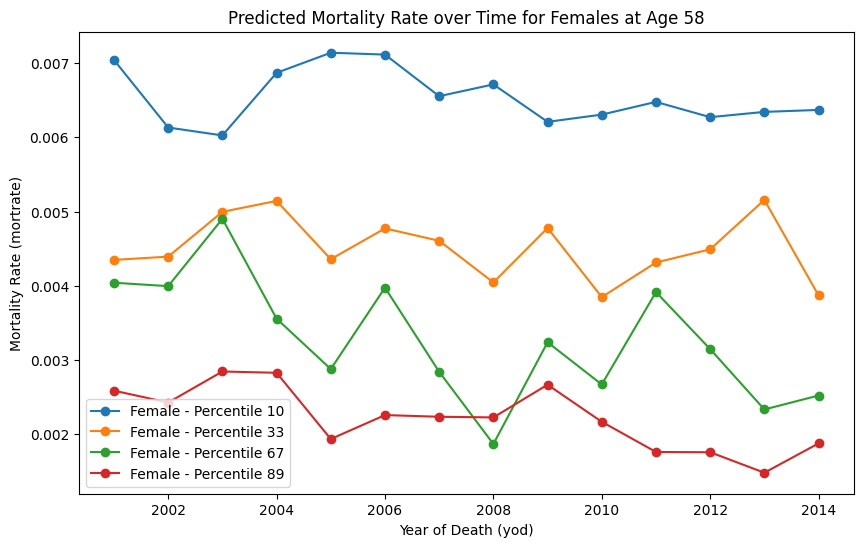

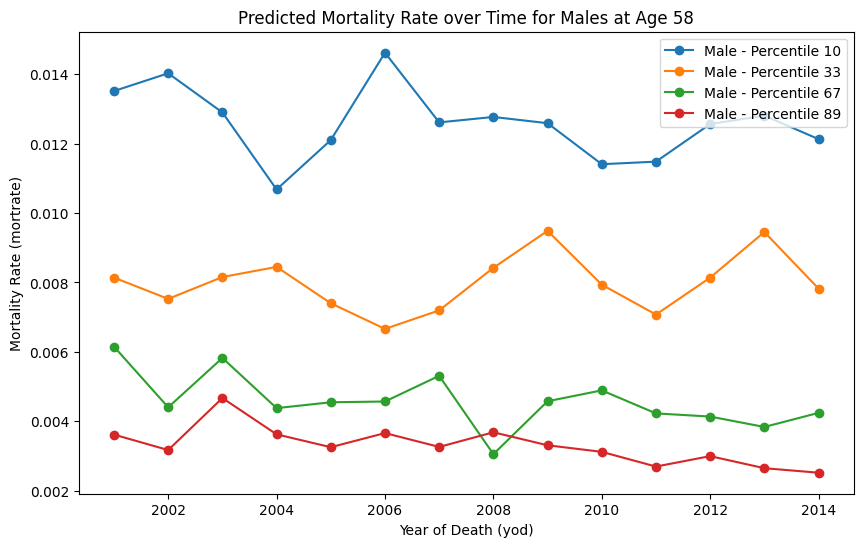

In [99]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Load the data
data = df_final_gnd_dropped

# Filter the data based on the specified conditions for female
filtered_data_F = data[(data['gnd_F'] == 1) & (data['gnd_M'] == 0) & (data['age_at_d'] == 58)]

# Filter the data based on the specified conditions for male
filtered_data_M = data[(data['gnd_F'] == 0) & (data['gnd_M'] == 1) & (data['age_at_d'] == 58)]

# Split the data into features and target variable for female data
X_train_F = filtered_data_F[['pctile', 'yod']]
y_train_F = filtered_data_F['mortrate']

# Split the data into features and target variable for male data
X_train_M = filtered_data_M[['pctile', 'yod']]
y_train_M = filtered_data_M['mortrate']

# Instantiate the Decision Tree models
model_F = DecisionTreeRegressor()
model_M = DecisionTreeRegressor()

# Perform grid search for female data
model_F.fit(X_train_F, y_train_F)

# Perform grid search for male data
model_M.fit(X_train_M, y_train_M)

# Generate predictions for future years using the models
future_years = range(2015, 2065)  # Adjust the range as needed

percentiles = [10, 33, 67, 89]

# Create DataFrames to hold the predicted values for female and male
predicted_df_F = pd.DataFrame({'yod': future_years})
predicted_df_M = pd.DataFrame({'yod': future_years})

# Plot the actual and predicted values for female with different percentiles
plt.figure(figsize=(10, 6))
for pctile in percentiles:
    X_future_F = pd.DataFrame({'pctile': [pctile] * len(future_years), 'yod': future_years})
    predicted_values_F = model_F.predict(X_future_F)
    predicted_df_F[f'Percentile {pctile}'] = predicted_values_F
    plt.plot(filtered_data_F[filtered_data_F['pctile'] == pctile]['yod'],
             filtered_data_F[filtered_data_F['pctile'] == pctile]['mortrate'],
             marker='o', label=f'Female - Percentile {pctile}')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time for Females at Age 58')
plt.legend()
plt.show()

# Plot the actual and predicted values for male with different percentiles
plt.figure(figsize=(10, 6))
for pctile in percentiles:
    X_future_M = pd.DataFrame({'pctile': [pctile] * len(future_years), 'yod': future_years})
    predicted_values_M = model_M.predict(X_future_M)
    predicted_df_M[f'Percentile {pctile}'] = predicted_values_M
    plt.plot(filtered_data_M[filtered_data_M['pctile'] == pctile]['yod'],
             filtered_data_M[filtered_data_M['pctile'] == pctile]['mortrate'],
             marker='o', label=f'Male - Percentile {pctile}')
plt.xlabel('Year of Death (yod)')
plt.ylabel('Mortality Rate (mortrate)')
plt.title('Predicted Mortality Rate over Time for Males at Age 58')
plt.legend()
plt.show()


## Interpretation and Conclusions (10 points)

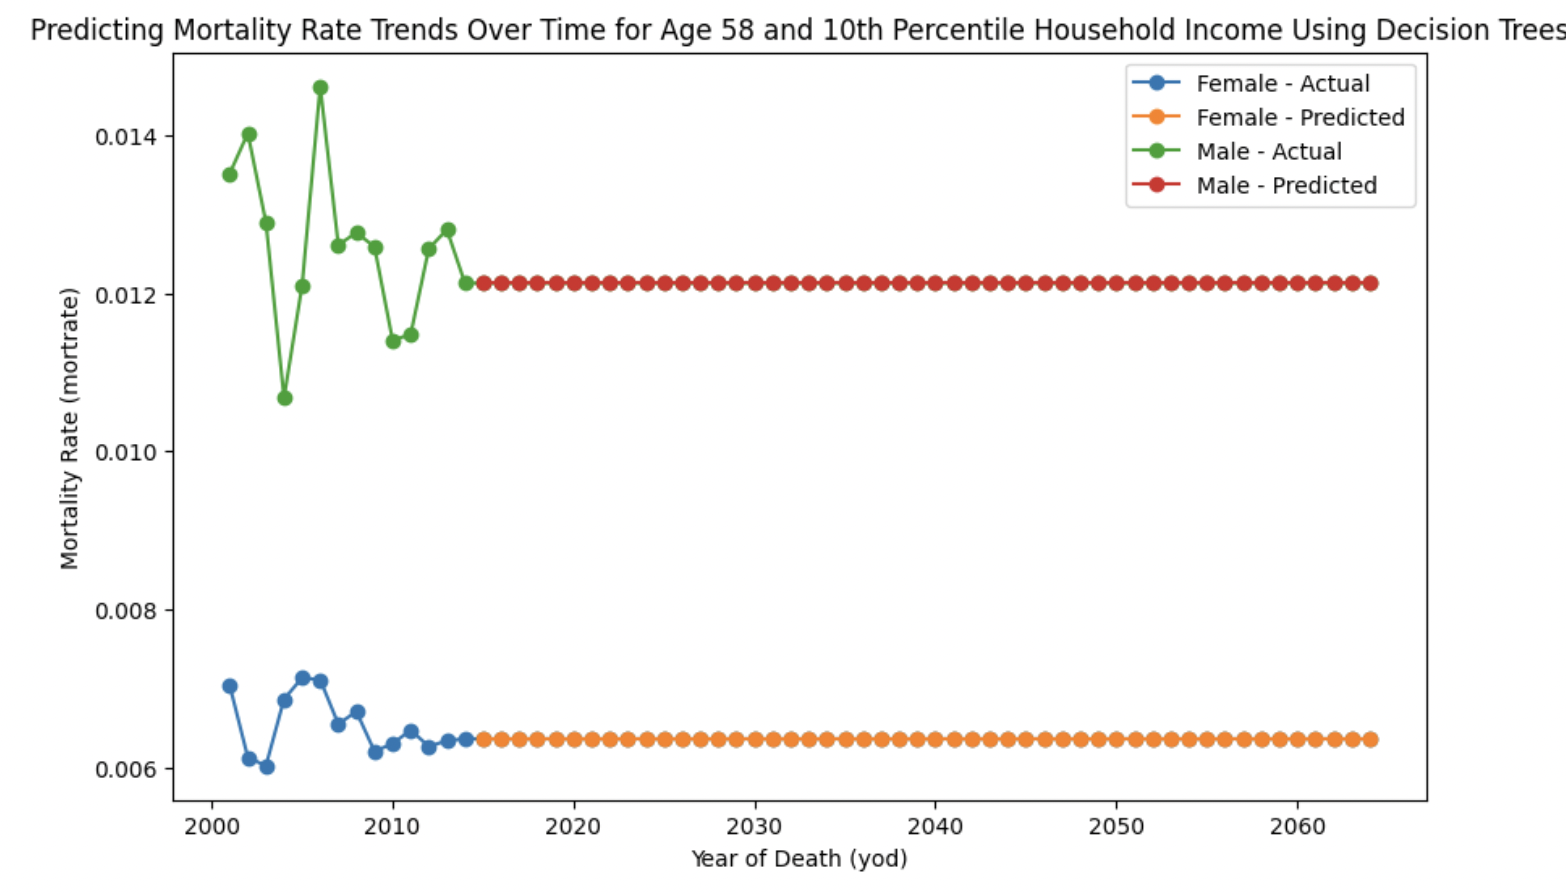

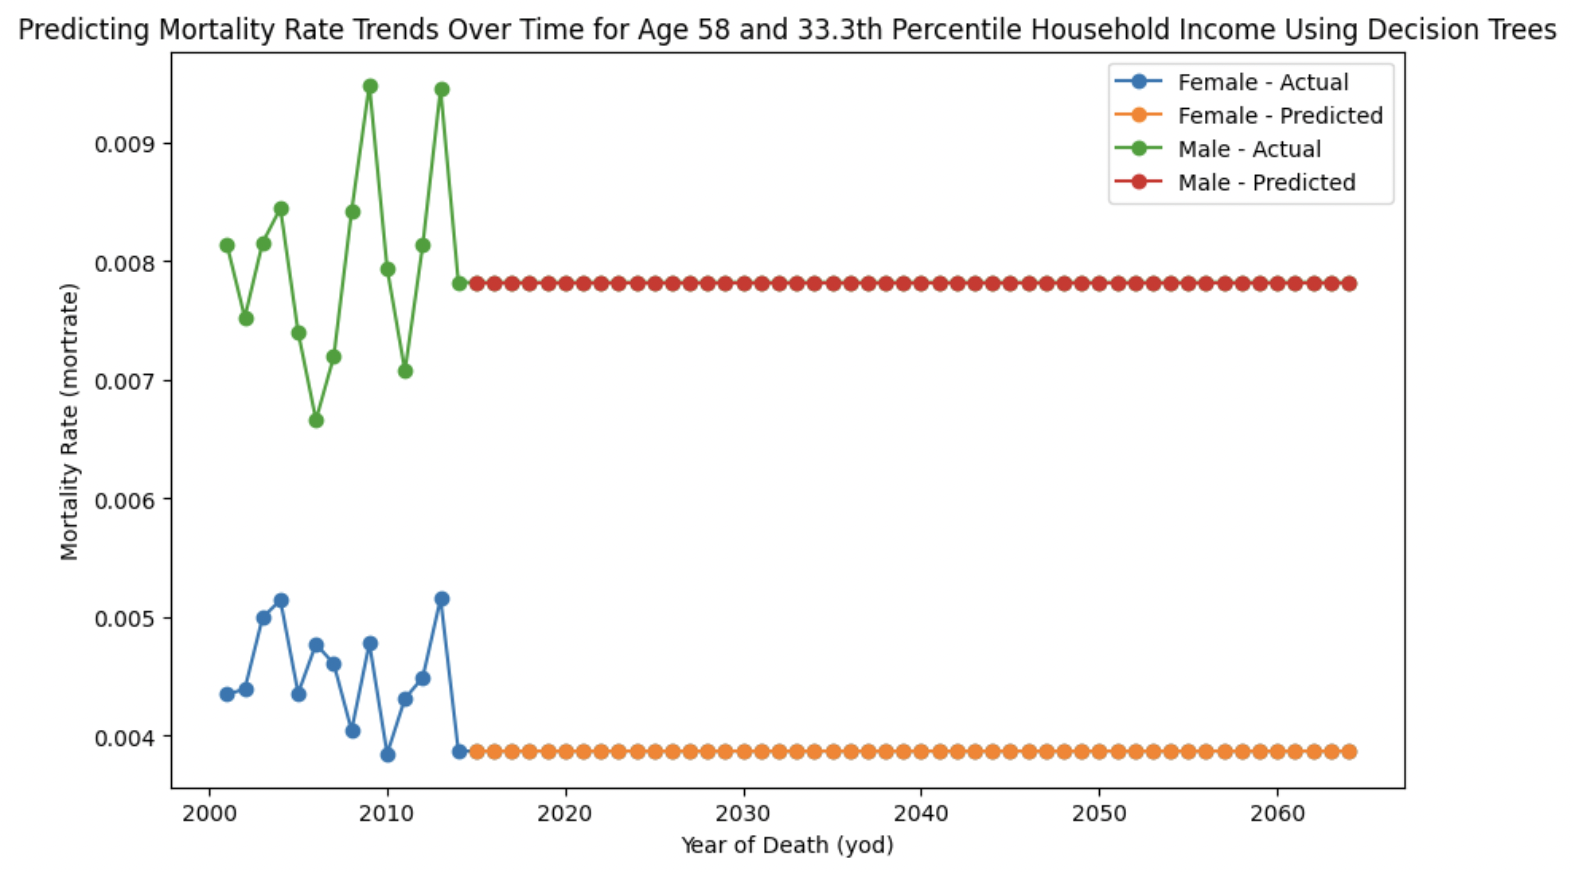

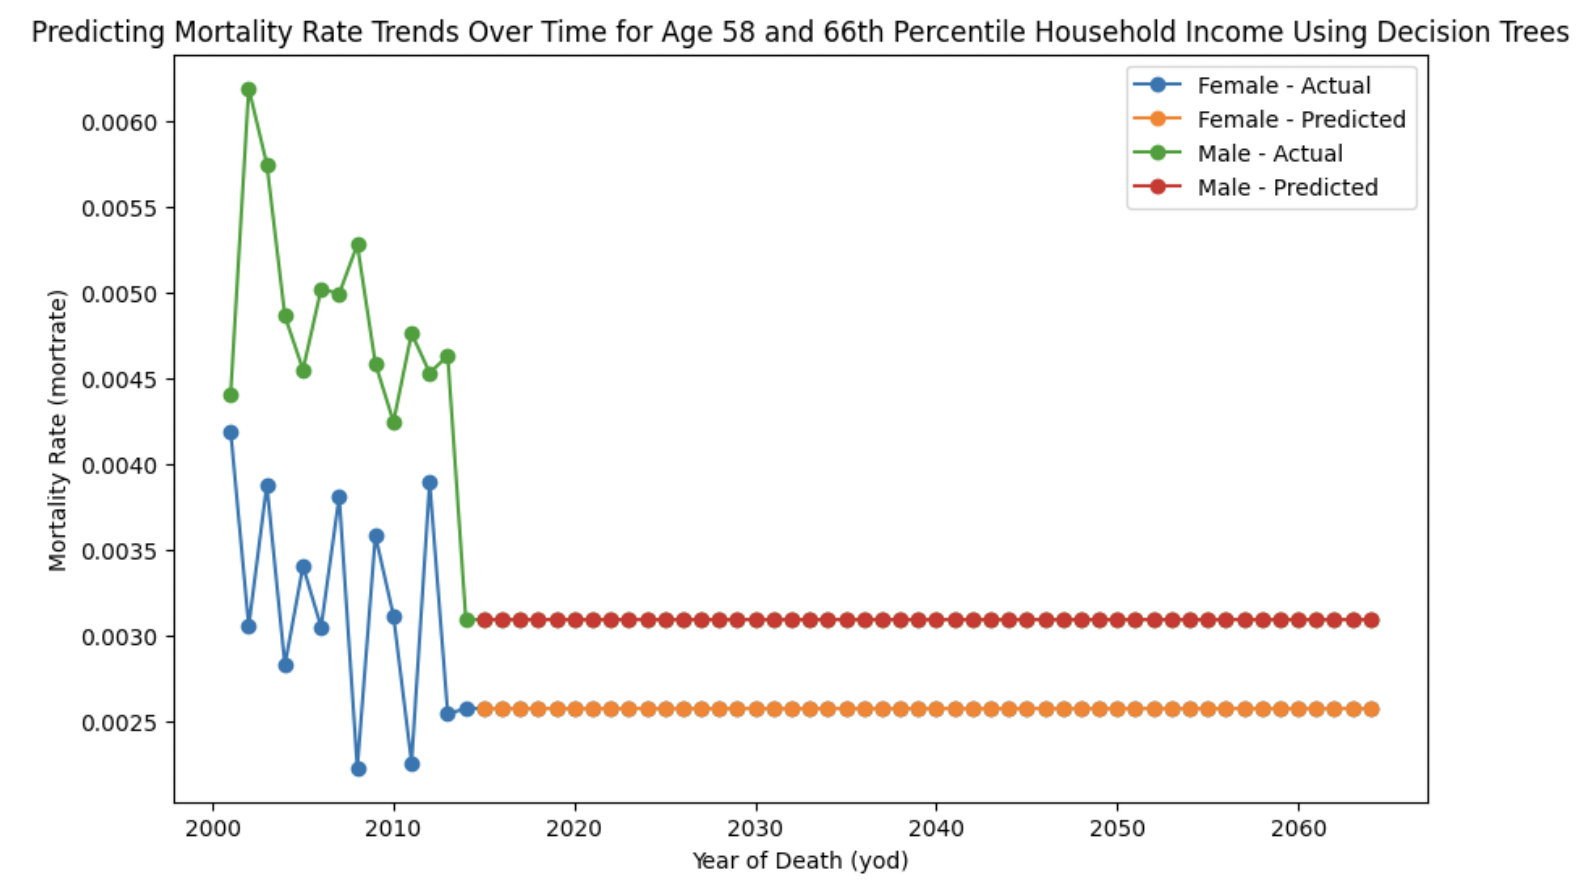

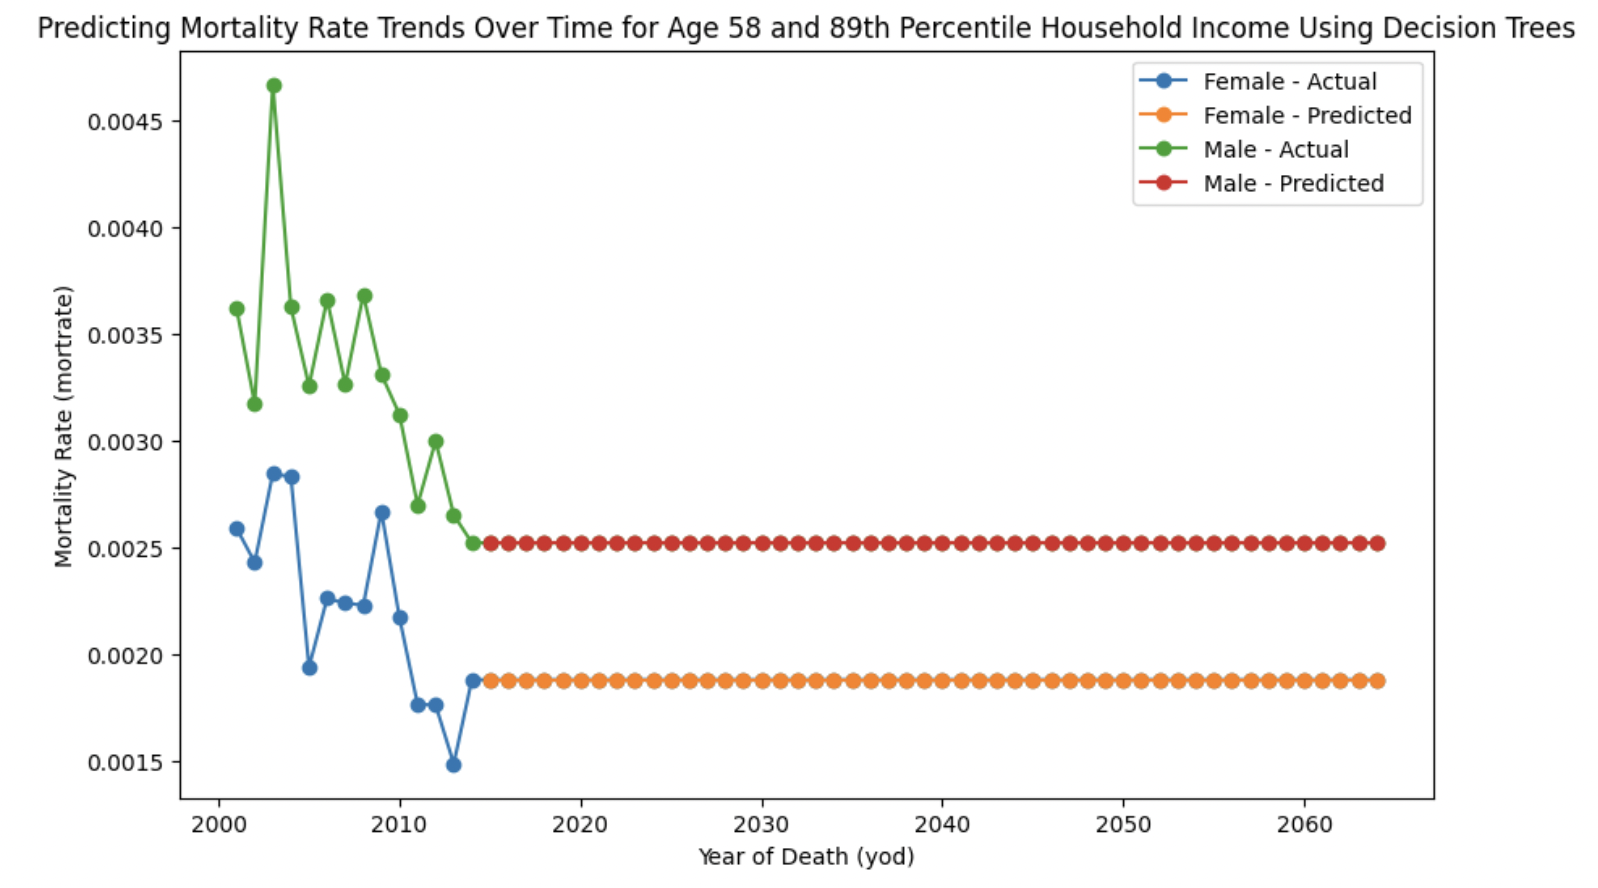

## Gender-Based Analysis of Changes in Mortality Rates Across Different Income Percentiles Over the Years: Is There a Time Trend of Decreasing or Increasing Disparities?

Our analysis shows that there is a negative relationship between household income percentile and mortality rate for both males and females. This means that people with lower incomes tend to have higher mortality rates than people with higher incomes. One possible explanation for this is that lower-income people may face more barriers to accessing quality health care, education, and social services, which could affect their health outcomes. Another possible explanation is that lower-income people may be more exposed to environmental hazards, occupational risks, and chronic stress, which could also impair their health. These factors may also interact with each other and create cumulative disadvantages for lower-income people over time.

Moreover, our analysis reveals that the gap between male and female mortality rates varies across different income percentiles. We find that the gap is larger for lower-income percentiles than for higher-income percentiles. This suggests that gender inequalities in health are more pronounced among the poor than among the rich. One possible explanation for this is that lower-income women may face more challenges than lower-income men in balancing work and family responsibilities, accessing reproductive health services, and coping with gender-based violence, which could affect their health and well-being. Another possible explanation is that lower-income men may engage in more risky behaviors than lower-income women, such as smoking, drinking, and drug use, which could increase their mortality risk.

These findings are important because they highlight the need for policies and interventions that address the social determinants of health and reduce the health disparities between different income and gender groups. By understanding how income and gender affect mortality rates over time, we can better design and evaluate programs that aim to improve the health and well-being of the population.

However, our prediction model is not able to capture the time trend of the gap in mortality rate across different income percentiles. Our model produces a flat line that does not reflect any meaningful variation over time. This indicates that our model is too simple and does not account for the complex interactions and dynamics that may influence the gap in mortality rate. Therefore, we need to develop a more sophisticated ML model that can capture the non-linear and temporal patterns of the data. 

Furthermore, we need to have better data that covers a longer time span (more years of death records) and includes more variables (such as education level, race/ethnicity, marital status, etc.) that may affect the gap in mortality rate. The main limitation of this dataset stems from the narrow range of ‘yod’ from 2001 to 2014. This has a notable impact on our data analysis due to the standardization of income lag, which has been explained in detail above. To be able to study mortality rates of individuals across different ages, the researchers can only include the deaths of older individuals occurring in later years. As there exists a larger representation of older individuals in later years, false relationships emerge between our target variable ‘‘mortality rate’ and other variables such as ‘yod’. This leads to potential confusion in our data analysis. Our team has to therefore examine and question the validity of various relationships in our regression models.

The variables that we have right now are too strongly correlated with mortality rate and do not allow us to isolate the effect of income percentile. If all or most of the features are constant or have little variance, the model won't be able to learn different patterns, resulting in a constant prediction. In our case, we are creating the future data with the same 'gnd_F', 'gnd_M', 'pctile', and 'age_at_d' values, with 'yod' being the only varying feature. If 'yod' doesn't have a significant influence on 'mortrate', it could lead to a horizontal line prediction.


It would be beneficial to collect as many relevant features as possible. Examples:

- Health-related information: This could include chronic disease history, BMI, smoking habits, alcohol consumption, diet, physical activity levels, etc. These variables can provide insights into a person's health condition and lifestyle, which directly affect mortality rate.
- Socioeconomic indicators: Socioeconomic status, level of education, occupation, and income levels are all significant predictors of health outcomes. People in lower socioeconomic groups often have higher mortality rates.
-Demographics: Race, ethnicity, and geographical location can also impact mortality rates due to differences in genetics, access to healthcare, environmental factors, and other social determinants of health.
-Family medical history: Family history of chronic diseases like heart disease, diabetes, or certain types of cancer can increase an individual's risk of death.
-Mental health: Mental health conditions, including depression, anxiety, and stress levels, can affect physical health and longevity.
-Healthcare access and utilization: Information about access to healthcare services, quality of healthcare received, frequency of health check-ups, and adherence to treatment plans can be useful.

## Reproducibility

google collab: https://colab.research.google.com/drive/1q4qU7AqokmYkgxpOoTSSzj9GmAHckD3o?usp=sharing